In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import random

## Download dataset

In [26]:
!curl -L "https://public.roboflow.com/ds/YxrUIqCESX?key=E13nBeOE97" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip; rm data.yaml; rm README.roboflow.txt; rm README.dataset.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    560      0  0:00:01  0:00:01 --:--:--   560
100 3130M  100 3130M    0     0  7875k      0  0:06:47  0:06:47 --:--:-- 7302k0  7194k      0  0:07:25  0:00:13  0:07:12 9625k00:32  0:05:47 9704k  0     0  8549k      0  0:06:14  0:00:38  0:05:36 8912k:10  9.9M    0  0:06:08  0:02:27  0:03:41 9179k     0  8739k      0  0:06:06  0:02:59  0:03:07 9955k:03:47  0:02:28 6172k0  0:06:21  0:04:00  0:02:21 6101k    0  0:06:27  0:04:35  0:01:52 7860k8256k      0  0:06:28  0:04:39  0:01:49 7683k  8116k      0  0:06:34  0:05:32  0:01:02 6054k0     0  8079k      0  0:06:36  0:05:53  0:00:43 8194k  0     0  8061k      0  0:06:37  0:06:01  0:00:36 6680k:13  0:00:26 6713k4k      0  0:06:44  0:06:29  0:00:15 7203k  0:06:43  0:00:03 6332k
Archive:  roboflow.zip
 extracting: export/images/1478896804396376590_jpg.rf.0036

 extracting: export/images/1478901202755163014_jpg.rf.016a3555795021bce717971ff19e435d.jpg  
 extracting: export/images/1478896937505793005_jpg.rf.015e95a726427f8819d891e1d9fa1d73.jpg  
 extracting: export/images/1478900696592471344_jpg.rf.01697686a99434c53e8e66d771e71a5b.jpg  
 extracting: export/images/1478898808479995420_jpg.rf.01c747422943f3cc5b0cbac80b803825.jpg  
 extracting: export/images/1478020859217604776_jpg.rf.01b75bf60187ad361938f950ffdd7197.jpg  
 extracting: export/images/1478021046717392300_jpg.rf.01a2a7f19cc2426232c540c18062a9a7.jpg  
 extracting: export/images/1478901454122881919_jpg.rf.01ce7bbce30f11a2264bd415f73559fc.jpg  
 extracting: export/images/1478020214191388441_jpg.rf.01b0ebcb4a70c5b147f4fd2b59d4a739.jpg  
 extracting: export/images/1478896774688220828_jpg.rf.01bcc55717bd7fac4f1a6143cc5bd1c8.jpg  
 extracting: export/images/1478899419760109029_jpg.rf.01d82842e0a583c8ec019591279f8f7c.jpg  
 extracting: export/images/1478020793209108009_jpg.rf.01c80fcfde5fd77a

 extracting: export/images/1478732101881976909_jpg.rf.033b1933d32e2fe0d5f92f9d03e2c5ff.jpg  
 extracting: export/images/1478900048749614115_jpg.rf.031fb1305af0fbc44c9cc82d8a39663b.jpg  
 extracting: export/images/1478900449223483042_jpg.rf.030b17514032e06f337ee9c42ecac0f6.jpg  
 extracting: export/images/1478900504639671864_jpg.rf.03120d4a1f1a450c0e625c9d8a8afbb8.jpg  
 extracting: export/images/1478895457866117612_jpg.rf.0317cc20e03459e7c70df588bebe85bc.jpg  
 extracting: export/images/1478899164393964065_jpg.rf.034487e9f951a602a5c37c1a203a5618.jpg  
 extracting: export/images/1478901217037288001_jpg.rf.034c67ff65cbacd948fac8ffb6768bd5.jpg  
 extracting: export/images/1478898170920365392_jpg.rf.03493defcd95442962b2c80ae70f61ea.jpg  
 extracting: export/images/1478732657588560968_jpg.rf.0357707ea96b62842bd3e0340d59f613.jpg  
 extracting: export/images/1478020633205868287_jpg.rf.034739d915467ed2b292b13f34d29ccd.jpg  
 extracting: export/images/1478900586905748308_jpg.rf.034bec5a2750212e

 extracting: export/images/1478895590404249039_jpg.rf.04c79709c9ee98aac0282eec483a3336.jpg  
 extracting: export/images/1478898356590043065_jpg.rf.04d346cc1cfeb27cde65cf519404949a.jpg  
 extracting: export/images/1478897993821219476_jpg.rf.04d7ee40e9b48bcb23709c88b88a7687.jpg  
 extracting: export/images/1478900473218224502_jpg.rf.04de11795783d478a644a74917e1e98b.jpg  
 extracting: export/images/1478020493698279067_jpg.rf.04bd8b31b1aefdf646ca70c690f702f7.jpg  
 extracting: export/images/1478020580201703361_jpg.rf.04d8afc260eccf73b710a20c7c44a239.jpg  
 extracting: export/images/1478899132973374535_jpg.rf.04eb7b21a93ac9ca3da9543494a3c2e3.jpg  
 extracting: export/images/1478897741310145295_jpg.rf.04f678c846f9bfe806d077544cdde300.jpg  
 extracting: export/images/1478897813293237320_jpg.rf.04e303ce3504fe1c7b7528090fecf5af.jpg  
 extracting: export/images/1478020482204952462_jpg.rf.050b1b467632b2af7f23e85f7e59d94c.jpg  
 extracting: export/images/1478021045223865385_jpg.rf.0501ddfc618bb635

 extracting: export/images/1478900336680766986_jpg.rf.0685f7a86845120e35d344e5f88ef182.jpg  
 extracting: export/images/1478900196142689829_jpg.rf.068af33ecea29592e59dbe2c2930b895.jpg  
 extracting: export/images/1478897909840510864_jpg.rf.0694bbbc491d59c71fba9f80036a15b2.jpg  
 extracting: export/images/1478897848714641994_jpg.rf.064f5e1aeb165b539289c069d2dfdaef.jpg  
 extracting: export/images/1478896962642424291_jpg.rf.0652d80a36d0433e5b3893701cc48f64.jpg  
 extracting: export/images/1478732448840019875_jpg.rf.068e075bac72eea262ed0babb31958c9.jpg  
 extracting: export/images/1478895884047790080_jpg.rf.068c2a3bae05412f0afe53fbee4086e9.jpg  
 extracting: export/images/1478901317584416889_jpg.rf.06a8a44b430871ece14b19de9f2ac4f3.jpg  
 extracting: export/images/1478732085825466179_jpg.rf.063c9b9dc3c26b782880f7ecf13ebd8f.jpg  
 extracting: export/images/1478901335865513929_jpg.rf.068f6c68814d9e65f352ac8cc13dee68.jpg  
 extracting: export/images/1478898527976497716_jpg.rf.0679144054f6dc1b

 extracting: export/images/1478020361696207978_jpg.rf.078c6852ace61f676b6483965204cdc4.jpg  
 extracting: export/images/1478896723272322315_jpg.rf.07d7da25be068075c11b6f9090a1a9fe.jpg  
 extracting: export/images/1478732689702934747_jpg.rf.07e3215d8504303de5f7f903a7ff3b0b.jpg  
 extracting: export/images/1478020818713128896_jpg.rf.07e490e71ba419e99e6e311252fa4729.jpg  
 extracting: export/images/1478896106281166790_jpg.rf.07e97909a23a547081bedf3a109cd06d.jpg  
 extracting: export/images/1478899931065112871_jpg.rf.07d31b5c4e087fc2f953933317bef7b0.jpg  
 extracting: export/images/1478732229769480357_jpg.rf.07e04b5de1ce1891650a60f6d431b644.jpg  
 extracting: export/images/1478899602002399293_jpg.rf.07e8ab72b8e5f4aef995bf65983c3187.jpg  
 extracting: export/images/1478900938819068591_jpg.rf.07dd74f02a4bdf94887c5d58e77eab07.jpg  
 extracting: export/images/1478900510924017306_jpg.rf.07eb08354dabb9c7d327e3c33b28458d.jpg  
 extracting: export/images/1478896811822684894_jpg.rf.07ebc4a451cf272f

 extracting: export/images/1478899264369774890_jpg.rf.0ad96f67eff4934f24e2c77f9f3d2f0f.jpg  
 extracting: export/images/1478896959786195667_jpg.rf.0aa7e1f13889e38178b7482ce8b42031.jpg  
 extracting: export/images/1478899306644193115_jpg.rf.0b07ca2002ddb40ebc0941361e2eacc1.jpg  
 extracting: export/images/1478898402293277739_jpg.rf.0b1703bd7f0dca06f7e6da407443fb8f.jpg  
 extracting: export/images/1478896507896844461_jpg.rf.0b1a82e96618599f741d5bc3b045a2b5.jpg  
 extracting: export/images/1478732397800168946_jpg.rf.0b1e03c9a3c10c27f8116e7d1bf7bd47.jpg  
 extracting: export/images/1478900971382678848_jpg.rf.0ad8d9ee1134714735979ef8668c4541.jpg  
 extracting: export/images/1478020823716517453_jpg.rf.0b124a3877f726b9ce58ca3750336cb6.jpg  
 extracting: export/images/1478021660584529675_jpg.rf.0ac9376de3102c7083c7c90e263ebfa8.jpg  
 extracting: export/images/1478899751108332487_jpg.rf.0b3674bd1410b9f5b7aa99f62e6d8aac.jpg  
 extracting: export/images/1478898736497864218_jpg.rf.0b0971599dfaf124

 extracting: export/images/1478897356833070335_jpg.rf.0c86ec9c67ede72acc986f30053c99db.jpg  
 extracting: export/images/1478020393703157255_jpg.rf.0cb4e7fa0725d8280cacaaace27d607b.jpg  
 extracting: export/images/1478896864380429627_jpg.rf.0c93d68ccf4c3048e9dabec08f5fac99.jpg  
 extracting: export/images/1478731897723279230_jpg.rf.0cb80b824572f4d2a98b76a6f7c8c670.jpg  
 extracting: export/images/1478898574252601122_jpg.rf.0cb5f2a30ff23be9e9ac4a6f9cc93120.jpg  
 extracting: export/images/1478898735925817401_jpg.rf.0cb5520af662e3f71c3f04792ba5e534.jpg  
 extracting: export/images/1478900422946142994_jpg.rf.0ce0b8ba99282f2b1a70452abf0daf19.jpg  
 extracting: export/images/1478021153725139883_jpg.rf.0cb7329bea404c191452bcff93e2b339.jpg  
 extracting: export/images/1478895249345162688_jpg.rf.0cc2f9f1a8756a101991ed530f0d2428.jpg  
 extracting: export/images/1478898603386885246_jpg.rf.0cdbeaffefcd55b06ebbe6d33ebf07de.jpg  
 extracting: export/images/1478900109878689818_jpg.rf.0cd5e31705052e7b

 extracting: export/images/1478732999383740673_jpg.rf.100911206f0b6efd7d391b2d7eeb16df.jpg  
 extracting: export/images/1478896378784099202_jpg.rf.0ffd1193d3ce9eb64e1084c290b91ffe.jpg  
 extracting: export/images/1478897359117734059_jpg.rf.0ff8c34c783ca1a39d94e396d0b3eed6.jpg  
 extracting: export/images/1478895419589797097_jpg.rf.0fd64443cb746e6178d54581dfa43c8c.jpg  
 extracting: export/images/1478898112077639004_jpg.rf.0fd8ce7fa7189a7da2a3c89aea268abc.jpg  
 extracting: export/images/1478021868580409436_jpg.rf.102564242411696e43d6a572c4d09813.jpg  
 extracting: export/images/1478900231563589177_jpg.rf.1003e8a6fab0c4032f28ab29241d73eb.jpg  
 extracting: export/images/1478732862895190655_jpg.rf.102dd7ff912dd2c4554869f0894541a1.jpg  
 extracting: export/images/1478900313257252960_jpg.rf.1004400f2aa6a19ead69430f201bed2e.jpg  
 extracting: export/images/1478020525700343545_jpg.rf.10102b6ecc2db896fef39169babf9050.jpg  
 extracting: export/images/1478895911469911245_jpg.rf.1044416ad6e9942e

 extracting: export/images/1478732983900835709_jpg.rf.1191c4991adea919bb2c9ebb4405cee4.jpg  
 extracting: export/images/1478896946647231009_jpg.rf.11a5a1e0ab758b072fa58d6b6d55f20a.jpg  
 extracting: export/images/1478898340022781049_jpg.rf.11ad0bb4324c7af61987b22a2a404e23.jpg  
 extracting: export/images/1478020994220171240_jpg.rf.11a71339fc5cd36acb1b0fab0f4ecf1d.jpg  
 extracting: export/images/1478732802105463688_jpg.rf.11a5c353bef381b3314b17e40a1e706e.jpg  
 extracting: export/images/1478899601429844938_jpg.rf.1182704b71ac36a3ef46ec8e26f1413d.jpg  
 extracting: export/images/1478901226177900002_jpg.rf.11b8b556339ec0595a4b251bd4c6a990.jpg  
 extracting: export/images/1478899486029400881_jpg.rf.11a193e923143d14059a81a67237a3d4.jpg  
 extracting: export/images/1478901225035290950_jpg.rf.1157c39605b7adf721777e59e483dbbf.jpg  
 extracting: export/images/1478900478931119906_jpg.rf.1155b0630c5d9b0a18a6b840b58d980a.jpg  
 extracting: export/images/1478899327781917258_jpg.rf.114bcace19fc1e2e

 extracting: export/images/1478898819906011444_jpg.rf.1417967919540634b372cd44dee87c33.jpg  
 extracting: export/images/1478732717805285711_jpg.rf.141f3f60868565125053880ed50681ac.jpg  
 extracting: export/images/1478020372196222320_jpg.rf.140216ce8bcb6cc1224593a6c549f666.jpg  
 extracting: export/images/1478901436413704988_jpg.rf.13f5bb7f2988a4e012f5ccf2cc4346af.jpg  
 extracting: export/images/1478900442940525769_jpg.rf.141fe90e075208068824319bd83de66a.jpg  
 extracting: export/images/1478898038381676394_jpg.rf.13fcb5c0eb437714921982295e1e2b72.jpg  
 extracting: export/images/1478899983622432910_jpg.rf.13df31c5eb38b15c2de38045c195e1e7.jpg  
 extracting: export/images/1478020886718609532_jpg.rf.1445e617ec7e56c33aa15600ffc9ac22.jpg  
 extracting: export/images/1478898515979731191_jpg.rf.143588ae8c3047180cc8da08a4b1e65c.jpg  
 extracting: export/images/1478899809950990635_jpg.rf.1442dd000ba130f49da53d206a790b05.jpg  
 extracting: export/images/1478020909211807106_jpg.rf.144e61a8cdd3a9ad

 extracting: export/images/1478900577764329725_jpg.rf.168579f441515215a7ad3f307e6c80d9.jpg  
 extracting: export/images/1478897777302827174_jpg.rf.16e7a7acd7310a98ea90ab90a3bd7532.jpg  
 extracting: export/images/1478899399193189723_jpg.rf.170221efb62004edf098c496ae2dffb1.jpg  
 extracting: export/images/1478020795709831576_jpg.rf.173560a76b540fea8bb5b2f31b305170.jpg  
 extracting: export/images/1478895641821181146_jpg.rf.16f44b38dfda34a66cc0a1f4eff37ebb.jpg  
 extracting: export/images/1478897695607107715_jpg.rf.16cbc7f79bbd1636b359f2aba041cc5e.jpg  
 extracting: export/images/1478900237276059536_jpg.rf.1739c90fa3459d0cc65330d727ac1b5c.jpg  
 extracting: export/images/1478899409476738153_jpg.rf.173c437bc156737564a9881f6c840cf7.jpg  
 extracting: export/images/1478899032425500382_jpg.rf.17222dc261009b455fe40a9318cc3152.jpg  
 extracting: export/images/1478899520878165811_jpg.rf.172726a89caf7789b47ea563ec3a5f90.jpg  
 extracting: export/images/1478898489129357377_jpg.rf.1756c1dc76f931ff

 extracting: export/images/1478901443839492967_jpg.rf.1a003c10ea763bcaeaaa2b81f26a38d7.jpg  
 extracting: export/images/1478900418946197065_jpg.rf.19eaf981995b37fb4ffd9da86788e302.jpg  
 extracting: export/images/1478732092707614201_jpg.rf.19fb674c4ff261bbf407aeed23905d07.jpg  
 extracting: export/images/1478900726299515325_jpg.rf.19f41d6561713d9211cc489feeb67bef.jpg  
 extracting: export/images/1478896876949239206_jpg.rf.1a29a3b7e022dfafcede8da972fd9fd1.jpg  
 extracting: export/images/1478021894582003153_jpg.rf.1a1665654b7fd31e4da0bd50a0c298fe.jpg  
 extracting: export/images/1478896506753926864_jpg.rf.1a2e92822f70165c13e307ed74e3bbb2.jpg  
 extracting: export/images/1478900569766510799_jpg.rf.1a1a39b269d047eddb53dc1a7ce66240.jpg  
 extracting: export/images/1478900632036364845_jpg.rf.1a4bc2d5470706f65acbd6f447070a71.jpg  
 extracting: export/images/1478897395680287274_jpg.rf.1a4190b4dcd2042414c0c58f786fce13.jpg  
 extracting: export/images/1478021641076080557_jpg.rf.1a1818a28ee7129d

 extracting: export/images/1478896385640010675_jpg.rf.1b939dee07756204a1791e848b842ade.jpg  
 extracting: export/images/1478899155252866196_jpg.rf.1bb00d9f05135006b908d49cf6eee948.jpg  
 extracting: export/images/1478020435701641959_jpg.rf.1ba6e2f09e5194b0ba914c6982fee636.jpg  
 extracting: export/images/1478732730420209239_jpg.rf.1b9faa762b30f8be3dc8534422cee1f7.jpg  
 extracting: export/images/1478896732413706132_jpg.rf.1baa1dc426b98a098b766d22afcf8443.jpg  
 extracting: export/images/1478901133058117951_jpg.rf.1bc2b71e48ab983eaff9b9f7a67a727f.jpg  
 extracting: export/images/1478898672512589619_jpg.rf.1bbd595a21cebdc5f307e608edeeb3f8.jpg  
 extracting: export/images/1478020839710781554_jpg.rf.1b7bc226490e20037c72a9dd39fdf220.jpg  
 extracting: export/images/1478898424573000737_jpg.rf.1bc677a370060788eb9908ff93104804.jpg  
 extracting: export/images/1478900761720489534_jpg.rf.1bd9cdcc0059edb3b41d253719a75691.jpg  
 extracting: export/images/1478896440483596724_jpg.rf.1bf72d30dd7d7fb4

 extracting: export/images/1478896808966411998_jpg.rf.1edd4590d0819c6b1ed1a36131d54bc6.jpg  
 extracting: export/images/1478019954186238236_jpg.rf.1f205d6c6029c5b83626da7a5d6b9426.jpg  
 extracting: export/images/1478900819419815298_jpg.rf.1efc156c1a88c4fb78f9e67affd5e678.jpg  
 extracting: export/images/1478732741316067783_jpg.rf.1f041b7f2028610e644bb3c3e44f9c5a.jpg  
 extracting: export/images/1478899462606481570_jpg.rf.1f028334c38cf3ddc53be5ebac87c3d8.jpg  
 extracting: export/images/1478900019614162705_jpg.rf.1f48729570a254048cb2818d98c996d9.jpg  
 extracting: export/images/1478020394202260504_jpg.rf.1f00d408f964ab377903917e2ec0a51e.jpg  
 extracting: export/images/1478020551199347255_jpg.rf.1f38172ce4a9935013908279bbaeb332.jpg  
 extracting: export/images/1478732463178652805_jpg.rf.1f563ea454f17aa091741ad846ab2f45.jpg  
 extracting: export/images/1478899848227003047_jpg.rf.1f44b6b7f58d9b2ed07a1aefcd7fc90b.jpg  
 extracting: export/images/1478898163494073380_jpg.rf.1f76d957cb0e5c68

 extracting: export/images/1478897963542765675_jpg.rf.2092cc4a5eb7ffe2464e0d90dc55fad3.jpg  
 extracting: export/images/1478900762862623144_jpg.rf.2083a30ecac222c357c41093ad41047d.jpg  
 extracting: export/images/1478895333324857903_jpg.rf.2081e4d4958757de65025175aa42030f.jpg  
 extracting: export/images/1478732785474910469_jpg.rf.20a5e030e4e21890a033da01d7b5d995.jpg  
 extracting: export/images/1478899920210053928_jpg.rf.2088c9749d00b41eddce43ce751f05e3.jpg  
 extracting: export/images/1478898879320646276_jpg.rf.2093afde8c5e69f59dd5dc1cc283e908.jpg  
 extracting: export/images/1478732803252616256_jpg.rf.208dc83295d3049960d1836329de9719.jpg  
 extracting: export/images/1478896980923858971_jpg.rf.20b5a2a55b658d46bde3b9194e4e5922.jpg  
 extracting: export/images/1478732588769726115_jpg.rf.208e976342c2a031500f307101778387.jpg  
 extracting: export/images/1478895511566609713_jpg.rf.20907b6b6f8190bc8db9ef4c736a29e7.jpg  
 extracting: export/images/1478898875892807066_jpg.rf.20b25074422230ba

 extracting: export/images/1478899984194517696_jpg.rf.21fd54b1137b8812c576142afbb3c500.jpg  
 extracting: export/images/1478897449382202627_jpg.rf.21ecb658f7324e151ea84daf20fe2143.jpg  
 extracting: export/images/1478732664469393468_jpg.rf.220e746a096e2eddcc5517f5545a52d6.jpg  
 extracting: export/images/1478898237761498142_jpg.rf.221ece56f15c9ef3685edd464f6e12dd.jpg  
 extracting: export/images/1478899011287926553_jpg.rf.220cdad7cfa9b0a4f341e0e898e96d1c.jpg  
 extracting: export/images/1478020216698323099_jpg.rf.22251c589ee082f543fe9b863fb29adf.jpg  
 extracting: export/images/1478898975867837103_jpg.rf.22015ad5d81104c5b8b4b5815ccdc1f2.jpg  
 extracting: export/images/1478895456151793425_jpg.rf.2213e7fb39bd60a1046e60212b4b5b9a.jpg  
 extracting: export/images/1478732205683340802_jpg.rf.2223286bd1e61bf2c6b7217b4ddba696.jpg  
 extracting: export/images/1478895750365858387_jpg.rf.222de41ec0732bd6b941c7112a71a72e.jpg  
 extracting: export/images/1478899118118565583_jpg.rf.2238f63df37ac503

 extracting: export/images/1478895558983408473_jpg.rf.25397e68b3d298c1a044caa0620d9425.jpg  
 extracting: export/images/1478898220624565544_jpg.rf.253b48c5f63afa2ed38557cd57cc2662.jpg  
 extracting: export/images/1478898477702934565_jpg.rf.251495037ecfd77d31f79aca6daa700b.jpg  
 extracting: export/images/1478021026223484992_jpg.rf.25a396d88c2dffff5d94271625ebbd07.jpg  
 extracting: export/images/1478900321255595072_jpg.rf.25687728dd643494bdd9bac6847b2cf4.jpg  
 extracting: export/images/1478899018714434544_jpg.rf.25736f054a38a837236234f3f6b7d2c7.jpg  
 extracting: export/images/1478897263712119521_jpg.rf.2595a202e23d2b56fee21db5be514639.jpg  
 extracting: export/images/1478901025657233948_jpg.rf.2538013398ef47fc0eb3075e7d2855d6.jpg  
 extracting: export/images/1478899610571163653_jpg.rf.255260b4939454b4d179a49959593750.jpg  
 extracting: export/images/1478731984892040358_jpg.rf.25531e6d6b224e766ac97b1575ccc51a.jpg  
 extracting: export/images/1478895913183306437_jpg.rf.25a431715bcca3eb

 extracting: export/images/1478899851083737755_jpg.rf.285503bfeffd55b66fe2277027f3ff61.jpg  
 extracting: export/images/1478731962525318310_jpg.rf.2884cad78633ca9b77e3530031dc10ef.jpg  
 extracting: export/images/1478896919224726534_jpg.rf.2845549d8be996fb552e34d2650f9d3f.jpg  
 extracting: export/images/1478896644433830212_jpg.rf.2890501aace03539a5068c285e96738c.jpg  
 extracting: export/images/1478896406779385732_jpg.rf.28983a593f34cf4827772feba9ddd67d.jpg  
 extracting: export/images/1478900896544620349_jpg.rf.289d975748bafd3f474c78351e8b11d6.jpg  
 extracting: export/images/1478732987340896685_jpg.rf.28b14bfe386d7820f77012e0e6bf4ad6.jpg  
 extracting: export/images/1478898253186460893_jpg.rf.2895ee0d38a5317bb46742bcb8d05ed3.jpg  
 extracting: export/images/1478897709318899034_jpg.rf.288308d745221375bc3643bc9c1e91d2.jpg  
 extracting: export/images/1478900106449597934_jpg.rf.2897ad78dd5ee53478d263387ad83dbc.jpg  
 extracting: export/images/1478900474361209859_jpg.rf.28c39b350862446f

 extracting: export/images/1478899778529718267_jpg.rf.2a3aadb25f4e6c170fafa683d56b60c3.jpg  
 extracting: export/images/1478900926250592968_jpg.rf.2a2be1bcf3658fba9068b837a2b96e42.jpg  
 extracting: export/images/1478901051934684527_jpg.rf.2a1d339ab9ea95b6eeb4922716378873.jpg  
 extracting: export/images/1478732072062464583_jpg.rf.2a4c447f454e402c298fc85bd385ad2c.jpg  
 extracting: export/images/1478899084983962084_jpg.rf.2a4c66ed5d5c6cc7483f535ea2c9e733.jpg  
 extracting: export/images/1478897361403462899_jpg.rf.2a2f256e16d1f582de11ba9ddfdd5c33.jpg  
 extracting: export/images/1478897583634917274_jpg.rf.2a3fa548c1d27977f8430721061ec7af.jpg  
 extracting: export/images/1478900575479311518_jpg.rf.2a33a2f4a9e21579b40e73699c297f04.jpg  
 extracting: export/images/1478020827717351584_jpg.rf.2a49b95408cf277ed2fa423aa3cbb32c.jpg  
 extracting: export/images/1478896427915933062_jpg.rf.2a3f64479218a3da7eda1f0498e30aad.jpg  
 extracting: export/images/1478898871893001040_jpg.rf.2a3b361db8c87926

 extracting: export/images/1478900398379251305_jpg.rf.2a7f7d99e47b4bb49a45a2e7fa9d956c.jpg  
 extracting: export/images/1478901389566844748_jpg.rf.2bc74a9748cab31e559555cb5c117926.jpg  
 extracting: export/images/1478895986879786404_jpg.rf.2b9e499f564cc8985fe47f4a57506d64.jpg  
 extracting: export/images/1478897286564741794_jpg.rf.2bcc5de5473ceaa9128442d4b80d85c8.jpg  
 extracting: export/images/1478900085312289889_jpg.rf.2ba61dcbf4c5751ca1e814d12ce24700.jpg  
 extracting: export/images/1478901527820110674_jpg.rf.2bb9040c956de3de748ce7b302886195.jpg  
 extracting: export/images/1478021902589159804_jpg.rf.2bc3223399159cd0623c795d0d4d6478.jpg  
 extracting: export/images/1478897225436224084_jpg.rf.2bc312ec5149d89bcf763bef0d9c9440.jpg  
 extracting: export/images/1478897829288893855_jpg.rf.2b9af3c0081476c4bdb040b941b2ab86.jpg  
 extracting: export/images/1478899123261218006_jpg.rf.2b9bc3ffeb384c22673c3b06483adbd6.jpg  
 extracting: export/images/1478897542501807366_jpg.rf.2bd5c6d649e8697b

 extracting: export/images/1478020942219555329_jpg.rf.2d1b2300e0838cf96e165174dba422da.jpg  
 extracting: export/images/1478898866751760327_jpg.rf.2d40f4a22a61e8e9f2d4e84e032626d1.jpg  
 extracting: export/images/1478900922823099862_jpg.rf.2d257af0ab74afec8098e22a654ab459.jpg  
 extracting: export/images/1478900925679405380_jpg.rf.2d3cef5f2456f7d2dff64cce83409bc0.jpg  
 extracting: export/images/1478896313658322529_jpg.rf.2d22bf5ecc8b56ceb17c61075dd58dd0.jpg  
 extracting: export/images/1478899587719384000_jpg.rf.2d2d503646844e7984bc1e9315880db1.jpg  
 extracting: export/images/1478732995942826298_jpg.rf.2d38e46e49ded9e2452104d8a58dce94.jpg  
 extracting: export/images/1478896674712968348_jpg.rf.2d4e04e9fd82e4107c9c51416181b767.jpg  
 extracting: export/images/1478897736169028261_jpg.rf.2d4e4bdfb1ef9172a036de9d31df160c.jpg  
 extracting: export/images/1478900024184224334_jpg.rf.2d488367f2f10357ccbbea7031133ee1.jpg  
 extracting: export/images/1478900484643852649_jpg.rf.2d47513b8aae5516

 extracting: export/images/1478901391281391832_jpg.rf.302cfc146736f8d2aef435a8c5628689.jpg  
 extracting: export/images/1478732188478386086_jpg.rf.303b0509891f5bc58f0a9f11db1f0f23.jpg  
 extracting: export/images/1478732742463028018_jpg.rf.3048430eecdb39bd5cf37ad9c5197b0f.jpg  
 extracting: export/images/1478899969340170859_jpg.rf.30028978a8aeb1345a5974eae8af9303.jpg  
 extracting: export/images/1478900582905785322_jpg.rf.305a8b3b6bc2bd0755111839926a5187.jpg  
 extracting: export/images/1478897196301531587_jpg.rf.30647179a43aa306ce39f549d1df53dd.jpg  
 extracting: export/images/1478899455179384331_jpg.rf.3057fc2d9c5596ffa1b0c94f415226cb.jpg  
 extracting: export/images/1478895830918075979_jpg.rf.306c7ef1303ac4750fbd02b7513d0cac.jpg  
 extracting: export/images/1478895380170466548_jpg.rf.3041d68893be91c005f7ab8ed826de3b.jpg  
 extracting: export/images/1478900685166710377_jpg.rf.304c3b093abe9aecf0da3524902d1bb7.jpg  
 extracting: export/images/1478732299734500322_jpg.rf.3051fe96a608f99d

 extracting: export/images/1478021850579294365_jpg.rf.3166dd9f9e4d2b4f636c3fb6c0791388.jpg  
 extracting: export/images/1478896057148880952_jpg.rf.318e337a771c91394b7841c42676ef9b.jpg  
 extracting: export/images/1478897864709031648_jpg.rf.31c63074933652bfc3ec18fed18eb89c.jpg  
 extracting: export/images/1478732501600245625_jpg.rf.318a14377ded71db08fde99730d76aa4.jpg  
 extracting: export/images/1478898742783614878_jpg.rf.3199379424491e473057cfafa0f5b5d6.jpg  
 extracting: export/images/1478896066860926859_jpg.rf.315ed59423bc7182400b4a17c233c38d.jpg  
 extracting: export/images/1478021630076588491_jpg.rf.31ae4d1de5b6cc82219eed31168e57b8.jpg  
 extracting: export/images/1478732784901082560_jpg.rf.3144f67a85122988d5c0ee7fecdb5c30.jpg  
 extracting: export/images/1478897428815445528_jpg.rf.31a190b59d3ace768e65e4bc1af3b7a6.jpg  
 extracting: export/images/1478896776402008954_jpg.rf.319ac23fedb80080dd32811ba5088ab0.jpg  
 extracting: export/images/1478899430043894698_jpg.rf.31b63142429545ea

 extracting: export/images/1478895820062973793_jpg.rf.33377e66fc92df4943be369a3ad4c9d2.jpg  
 extracting: export/images/1478901384997242661_jpg.rf.33316b3d32baa38d64a3a1aeaa103da4.jpg  
 extracting: export/images/1478732330702211552_jpg.rf.333ee5f06d238f998d306ac7113bde8c.jpg  
 extracting: export/images/1478896004019209755_jpg.rf.333c76b4632939dc19c93d986cb76540.jpg  
 extracting: export/images/1478021645076295702_jpg.rf.336ad902d0c7e8790731f4c358a10fcc.jpg  
 extracting: export/images/1478901030797341212_jpg.rf.335ae5a6587c2df5863bbf751829f69b.jpg  
 extracting: export/images/1478732501028983348_jpg.rf.3367fb9e8da8146a305be7d6f66ea1f4.jpg  
 extracting: export/images/1478899981908925785_jpg.rf.3377ac4241c8035491102ca741b7f986.jpg  
 extracting: export/images/1478896084570494229_jpg.rf.32d2aea21614d8b98d4395e7cefa1240.jpg  
 extracting: export/images/1478899329495755043_jpg.rf.3367f43c338d8a6780596fbb188b6b1e.jpg  
 extracting: export/images/1478898596531885408_jpg.rf.3379bb4e488e118f

 extracting: export/images/1478899889932267201_jpg.rf.34a3f0e6f72ac933632b4dc39945e60a.jpg  
 extracting: export/images/1478897813866452342_jpg.rf.3499ea072b9c6a6371a39ee7cd2eb907.jpg  
 extracting: export/images/1478898230334350916_jpg.rf.34ae1b3ddca0d095753c0c969a660191.jpg  
 extracting: export/images/1478732528554639031_jpg.rf.34960da064e3f652044d8b315806275d.jpg  
 extracting: export/images/1478732960388689345_jpg.rf.34b217530c52dc2dc2a21287eb6f9f1a.jpg  
 extracting: export/images/1478898985008776992_jpg.rf.34b6249de64841a09c7a39d061188d43.jpg  
 extracting: export/images/1478897185447237972_jpg.rf.34b55b6dde30613863a0540841d776d2.jpg  
 extracting: export/images/1478899868222086855_jpg.rf.34b70db1d0c243bf5591815ca7ee833d.jpg  
 extracting: export/images/1478899665414968312_jpg.rf.348b0452260f5cbbd3bd3e2de2dbc922.jpg  
 extracting: export/images/1478896173691516622_jpg.rf.34b7d0d25eec704a8eed30a511676dc1.jpg  
 extracting: export/images/1478899443753992698_jpg.rf.34d2f445ac75be8b

 extracting: export/images/1478900300118716256_jpg.rf.362a7433594bfaf39ad08ee33180689c.jpg  
 extracting: export/images/1478899287792168166_jpg.rf.362deac4a28836060cf055aad4603083.jpg  
 extracting: export/images/1478732503321948268_jpg.rf.363ff7f101e4fb5817de5e32706f93c4.jpg  
 extracting: export/images/1478896347934713906_jpg.rf.3631fc7a55e33a271d10844b899cc271.jpg  
 extracting: export/images/1478896298804234147_jpg.rf.363ea1fd34e75752b123480056dee34d.jpg  
 extracting: export/images/1478899715689427508_jpg.rf.3637c1e5f777cbfaa31fe1e58e33cf4d.jpg  
 extracting: export/images/1478895958886861242_jpg.rf.3673efe250e2c5679ae2b8b52197f293.jpg  
 extracting: export/images/1478901462120820712_jpg.rf.367c1d4cff6c3d45f7c7e2b9848240cd.jpg  
 extracting: export/images/1478021142727789873_jpg.rf.3648919a8b53cdfa3857604774a33857.jpg  
 extracting: export/images/1478020290697453052_jpg.rf.364b1bdd84549114c22a7558704d813e.jpg  
 extracting: export/images/1478732584182600619_jpg.rf.364c168451c564d4

 extracting: export/images/1478900181860196720_jpg.rf.38f5e0071b60638ecfdacedcdedefc92.jpg  
 extracting: export/images/1478899144969668369_jpg.rf.3916a1c9d75a70f6c2982393f696209a.jpg  
 extracting: export/images/1478898623382043553_jpg.rf.38f201fcaa5ffa78b03098df03944d16.jpg  
 extracting: export/images/1478899155823799867_jpg.rf.3910c8b0830a45543f7be723a6d57e52.jpg  
 extracting: export/images/1478732280809419544_jpg.rf.3919136483bd0a3c77ba1ba30edc1b65.jpg  
 extracting: export/images/1478021632077737172_jpg.rf.391d7752b1ec7fdfe332b8fa969692fe.jpg  
 extracting: export/images/1478901422701778252_jpg.rf.391a85f4e94659cec7b818dd86f7d838.jpg  
 extracting: export/images/1478899919638651715_jpg.rf.391b6c551d72319534bb0da80c365e31.jpg  
 extracting: export/images/1478732901891837012_jpg.rf.3916dac5a7b5a6d0af81a1c7a5fd38e3.jpg  
 extracting: export/images/1478898312600549629_jpg.rf.391f393a0ac97eb14fcb32c4dbc10c67.jpg  
 extracting: export/images/1478020208698424055_jpg.rf.38d128057d4a51e8

 extracting: export/images/1478020488704719294_jpg.rf.3c147b35af7a9a8f1e8ec02c11230091.jpg  
 extracting: export/images/1478899219237927610_jpg.rf.3bdce5182a3ae8704d84da2d7051a91d.jpg  
 extracting: export/images/1478896387353296747_jpg.rf.3c159651cfb28586205579437f7d434d.jpg  
 extracting: export/images/1478897627624177340_jpg.rf.3b90a4fd9c2ade5a44529afcabd5bca0.jpg  
 extracting: export/images/1478896312515301327_jpg.rf.3c23be998857301db9561274f1463894.jpg  
 extracting: export/images/1478897129459237973_jpg.rf.3c299b192bc0dc12f9df2efa6792c14e.jpg  
 extracting: export/images/1478900637748928134_jpg.rf.3c14802f623d341b3507a7f2b4e76da0.jpg  
 extracting: export/images/1478901179332090175_jpg.rf.3bab46e99c8d03827cea64d9910fa895.jpg  
 extracting: export/images/1478897380255322647_jpg.rf.3c2d3225f7d1cc349cb32eeddc68d6bd.jpg  
 extracting: export/images/1478896744981361941_jpg.rf.3bf00b3cfc6f043648c23b81eee18a1e.jpg  
 extracting: export/images/1478896435342480693_jpg.rf.3c2cd453cde18242

 extracting: export/images/1478900959386138849_jpg.rf.3f2dfa3806c1c4b6522ad3298d1cc4c7.jpg  
 extracting: export/images/1478896539888898888_jpg.rf.3f3ebf0a66cccefb394f9df65116889f.jpg  
 extracting: export/images/1478897964685220948_jpg.rf.3f61c4a6de86e42d1320692bccd47610.jpg  
 extracting: export/images/1478897644190971965_jpg.rf.3f779c707b583f318f1cc481dc5810fa.jpg  
 extracting: export/images/1478899899643423219_jpg.rf.3f6e335e3d1f223486e3b364163fe9f6.jpg  
 extracting: export/images/1478020430203414616_jpg.rf.3f60b05225772482f0244fd13098f215.jpg  
 extracting: export/images/1478732539450942003_jpg.rf.3f60f268b73eb8239d7267109fd519ba.jpg  
 extracting: export/images/1478899075843447715_jpg.rf.3f6eaaf7e5836c35931f65eac6763681.jpg  
 extracting: export/images/1478900654317088871_jpg.rf.3f6aabb79304aa36ece9623c85e5b823.jpg  
 extracting: export/images/1478895501855228727_jpg.rf.3f80f5d5e309a63315b5e6ea128279b7.jpg  
 extracting: export/images/1478897842429008508_jpg.rf.3f81b7ddb073dce7

 extracting: export/images/1478896357075802708_jpg.rf.40e8b47bf83e75311c777cb305839758.jpg  
 extracting: export/images/1478899634564672538_jpg.rf.40c81dc05aa564087b63e38c98229c2f.jpg  
 extracting: export/images/1478898282322256176_jpg.rf.40fea860cef73b6648a1eddee69a4787.jpg  
 extracting: export/images/1478899178104711579_jpg.rf.40febf6325abc76c9c72c001b5193758.jpg  
 extracting: export/images/1478898134929485750_jpg.rf.41147a87b42fdf038b0d0f1a4809563a.jpg  
 extracting: export/images/1478900419517281512_jpg.rf.40fefde08a28147cf761e3047cb6f322.jpg  
 extracting: export/images/1478895809780402601_jpg.rf.412064337e869d55bf4084f5c93421b7.jpg  
 extracting: export/images/1478895799497513138_jpg.rf.40fd6ecf9b4ee0941ab8fb4795cb6738.jpg  
 extracting: export/images/1478899234090944694_jpg.rf.40ffabd0a176dbc8e3df4ffd23c08f21.jpg  
 extracting: export/images/1478900036182520537_jpg.rf.40f9b7344dd91975eefe91bbb27e571e.jpg  
 extracting: export/images/1478899016429643875_jpg.rf.41143fb52212a0cf

 extracting: export/images/1478900794855688245_jpg.rf.428d9f356573cfba629a56a695372897.jpg  
 extracting: export/images/1478020650205029744_jpg.rf.42486307857d8bc1121ad51da31f12f2.jpg  
 extracting: export/images/1478900869122022157_jpg.rf.425bba69c6ac0e7d15a10134462dbef0.jpg  
 extracting: export/images/1478899370629588003_jpg.rf.425cb4937432b46507a297f1b7e274e8.jpg  
 extracting: export/images/1478896439912911862_jpg.rf.4278df6083ea700e1a3b913b2f00f2cb.jpg  
 extracting: export/images/1478897259141949650_jpg.rf.42b2d0b7068fc976acd58f1402221a54.jpg  
 extracting: export/images/1478897833860049886_jpg.rf.42547635374343ccd2a7b41e1e9f0efe.jpg  
 extracting: export/images/1478895340751860251_jpg.rf.4292fdbcbaf401173a5ac7111b69a729.jpg  
 extracting: export/images/1478895616112533262_jpg.rf.4261575e31a302707fc1935fe5d11b91.jpg  
 extracting: export/images/1478900876549257015_jpg.rf.4281b7a6c8ca24d2b25357aa572edee7.jpg  
 extracting: export/images/1478900353249255368_jpg.rf.42a2da70398c13e3

 extracting: export/images/1478898389155127174_jpg.rf.43931d0c83cf4d37ce4fa117bee61e66.jpg  
 extracting: export/images/1478732648412024118_jpg.rf.439ba80366a54398a4ebd2f9d16f8e1d.jpg  
 extracting: export/images/1478896954645900399_jpg.rf.44051571a3b930a5f3c5ee2bdb5131a2.jpg  
 extracting: export/images/1478732406977456380_jpg.rf.43a675e6228d41b9c9a5ccf73bb29711.jpg  
 extracting: export/images/1478897828718696096_jpg.rf.43e7e78259afcf33bb9e5c57b0e5f6ae.jpg  
 extracting: export/images/1478896503326166600_jpg.rf.43dcef64201eff305020bf2f1967ccc0.jpg  
 extracting: export/images/1478897730455764367_jpg.rf.43ebdac282217ec01d70f832561e8cee.jpg  
 extracting: export/images/1478899811093738800_jpg.rf.44080aa98623ce50b1bba00a1a42a2b7.jpg  
 extracting: export/images/1478900600617438222_jpg.rf.442c8c5d523075591c3d2dc5fe080095.jpg  
 extracting: export/images/1478898168635381820_jpg.rf.440f544290999bb78d813947748a0877.jpg  
 extracting: export/images/1478901194757481097_jpg.rf.4430032096db2f2f

 extracting: export/images/1478900661743670076_jpg.rf.458bcf0dc87110893bdafd2cd08786f7.jpg  
 extracting: export/images/1478898780487179634_jpg.rf.458bbe2efc23fc8a37829bf62bc689fa.jpg  
 extracting: export/images/1478896774117660426_jpg.rf.45cc025e5534b35fb468639e52a354ee.jpg  
 extracting: export/images/1478901008516468026_jpg.rf.459810004daab6579af3a2207b067f4b.jpg  
 extracting: export/images/1478898063517824611_jpg.rf.45a7f9e3fd735b6030c4236571a0a23d.jpg  
 extracting: export/images/1478900324111905947_jpg.rf.459ba021a0ce17272bd0507d07ff2d30.jpg  
 extracting: export/images/1478899470034244629_jpg.rf.4558ae60f9d2b56f611d4eac69022f83.jpg  
 extracting: export/images/1478020589208843100_jpg.rf.45ad80f0c00be11bbd53dcc7529860ee.jpg  
 extracting: export/images/1478895796068900512_jpg.rf.4567336198049db755407dc67336c6eb.jpg  
 extracting: export/images/1478901234747979535_jpg.rf.45bc70456b697c6f688850e1d4e929ac.jpg  
 extracting: export/images/1478896331367704483_jpg.rf.458af38578a9bb87

 extracting: export/images/1478896686138261730_jpg.rf.489b8ba0d1dc803236c03fd8aa574ea1.jpg  
 extracting: export/images/1478898121218017287_jpg.rf.48c23a2f41391deec18f2ea292caea2e.jpg  
 extracting: export/images/1478896718701363547_jpg.rf.48b681961b93ad29585cbb18c2473220.jpg  
 extracting: export/images/1478899072986962606_jpg.rf.484f0d3974124e3ddb75ff8652bbbebb.jpg  
 extracting: export/images/1478901127345582239_jpg.rf.489f394e39cd76dd2b9e1dc7cccf197a.jpg  
 extracting: export/images/1478898334309957386_jpg.rf.48c66592b7242477b5cedf27545342fb.jpg  
 extracting: export/images/1478897915554676172_jpg.rf.48a571004800355caef1ca20571f7fc7.jpg  
 extracting: export/images/1478896263384342408_jpg.rf.48c835389cc1dd0d745d988fc17f0274.jpg  
 extracting: export/images/1478895744081719324_jpg.rf.48cb9ff3195d17ce0a68770094c84f64.jpg  
 extracting: export/images/1478895240775736988_jpg.rf.48be0db1cbe6663b0ebab689c12b7270.jpg  
 extracting: export/images/1478898885605417963_jpg.rf.48f565be94a3c2cc

 extracting: export/images/1478898918740290794_jpg.rf.4a8158e0d0d12a2af6735b8c52329f4d.jpg  
 extracting: export/images/1478895624682380838_jpg.rf.4a89abfa9202900d7e27072aba5aa241.jpg  
 extracting: export/images/1478900101879688623_jpg.rf.4a9173f023eeb6de25b0477861d19886.jpg  
 extracting: export/images/1478895862338603308_jpg.rf.4a6bc0f7fdc88f170a356204401db4af.jpg  
 extracting: export/images/1478897484801268501_jpg.rf.4a593a1ef88160a1736389298d185a4c.jpg  
 extracting: export/images/1478897857282331271_jpg.rf.4a8da78f26d564e55d517b82e4a322b6.jpg  
 extracting: export/images/1478895341323133638_jpg.rf.4a87ee412f0995ea493f966afe7c6abe.jpg  
 extracting: export/images/1478897163165601759_jpg.rf.4a2f45748f73c1b483c36c5a257cfa6d.jpg  
 extracting: export/images/1478899773959706606_jpg.rf.4a39d5e62e6cf9edbe580d4a094687b0.jpg  
 extracting: export/images/1478900159009950321_jpg.rf.4a8206ae8cf66433817a70bb97119590.jpg  
 extracting: export/images/1478020431196343477_jpg.rf.4a9bda5103a9d3f6

 extracting: export/images/1478900316686065547_jpg.rf.4c140914bec2c676f90e0a5bc1023901.jpg  
 extracting: export/images/1478900087026729507_jpg.rf.4c25c1c26a1981acd18d9ad8345db7f1.jpg  
 extracting: export/images/1478901468977879104_jpg.rf.4c1a143038d5656c99e76b591c80f05c.jpg  
 extracting: export/images/1478896407348653684_jpg.rf.4c1af3fe7ca5739aff0eb24b58989ddb.jpg  
 extracting: export/images/1478898752493078833_jpg.rf.4c06dc7335c0eb6dab364efe6f476e4b.jpg  
 extracting: export/images/1478020575203781212_jpg.rf.4bf4470dcc7ef11388492f817795c3c5.jpg  
 extracting: export/images/1478896430772440694_jpg.rf.4c18cd5ee9bc035eaaebca2e92c33795.jpg  
 extracting: export/images/1478897780730245901_jpg.rf.4c307111bc519d6ae03abc32df8aa73a.jpg  
 extracting: export/images/1478732329555758961_jpg.rf.4c115b1dab8353bd20ae2c1827c7b5e3.jpg  
 extracting: export/images/1478898463421276667_jpg.rf.4bf1dad4223beceeff39a3c1c826d85e.jpg  
 extracting: export/images/1478019970188563338_jpg.rf.4c4c3b95f5340ef6

 extracting: export/images/1478901141057357591_jpg.rf.4ecc65ec171f658c3122bd3cb2540d5b.jpg  
 extracting: export/images/1478021878081153092_jpg.rf.4eb149169375cc22095eee8defaede95.jpg  
 extracting: export/images/1478895729800109344_jpg.rf.4ef8ec16170e35a1d5fdb6970001a58c.jpg  
 extracting: export/images/1478898511981774839_jpg.rf.4eb740360d12b4faa702f628217ba57c.jpg  
 extracting: export/images/1478895288764126303_jpg.rf.4efb63ff9a90dc980d29799e7c74620b.jpg  
 extracting: export/images/1478901145055060788_jpg.rf.4eef5c0f666888ecf426cf6fb1f3432b.jpg  
 extracting: export/images/1478897593918575725_jpg.rf.4efe5f1d67ff2ef924211b935a581b27.jpg  
 extracting: export/images/1478731902310672496_jpg.rf.4ec9f55413841bf547a92e7deba1659c.jpg  
 extracting: export/images/1478897804152382893_jpg.rf.4ed3e995289c8fec8a09e451c47bc71c.jpg  
 extracting: export/images/1478896934650434535_jpg.rf.4ed55a36bb5127de1709977e3a4f7ea5.jpg  
 extracting: export/images/1478898378869757943_jpg.rf.4ec8ca20de95cb29

 extracting: export/images/1478732193639881708_jpg.rf.51b69bbd23010364ba97cea31b6d11dc.jpg  
 extracting: export/images/1478732829060372917_jpg.rf.5167f892decc8707849b4b5a3461132e.jpg  
 extracting: export/images/1478898028098698010_jpg.rf.51d8d18aed70207720e72820172c16e5.jpg  
 extracting: export/images/1478899118690707304_jpg.rf.519b7c9f81461ad93260500a69bca795.jpg  
 extracting: export/images/1478900143584641584_jpg.rf.516f5db95d30c3c6942337bb83d16023.jpg  
 extracting: export/images/1478896839244926472_jpg.rf.51c229892fd9bd10fc85fc867307a5a8.jpg  
 extracting: export/images/1478895433300552698_jpg.rf.51cf2b8fb8dd164a49b8b0e0ba253fdf.jpg  
 extracting: export/images/1478897416817798164_jpg.rf.51d49f5943414068ab0f5cfbdff38a22.jpg  
 extracting: export/images/1478900545200332640_jpg.rf.51ceb90c78809a1892beadfff1216524.jpg  
 extracting: export/images/1478901001090228344_jpg.rf.5192f5138a693904d649febbc4b20095.jpg  
 extracting: export/images/1478900607471208836_jpg.rf.51d26de3964c745a

 extracting: export/images/1478897457379359214_jpg.rf.533978e9a1973e65c3e61e880c5bde21.jpg  
 extracting: export/images/1478896862096139725_jpg.rf.5320bd8a16943b2cae7cd213613dec8c.jpg  
 extracting: export/images/1478896883234086036_jpg.rf.534749c5037f10988e61eb95f1cc17e5.jpg  
 extracting: export/images/1478732596225345864_jpg.rf.53268955e44538db8dd99cc980376b63.jpg  
 extracting: export/images/1478898579964489249_jpg.rf.53428074bbe701e6de6b2fb7ab66f2f8.jpg  
 extracting: export/images/1478897791583975711_jpg.rf.53975f56c646f12650c25554d8919268.jpg  
 extracting: export/images/1478900358388863835_jpg.rf.5381561789c8a882b5342a89859caeb5.jpg  
 extracting: export/images/1478899356919160119_jpg.rf.52fd7417fb13412dc58fec8a20b31f86.jpg  
 extracting: export/images/1478020498199270827_jpg.rf.534dc421eaeae251971ab19fa5a3643a.jpg  
 extracting: export/images/1478898894745716228_jpg.rf.5386b90744a86b7d6ba17248f0c6f54e.jpg  
 extracting: export/images/1478900183003438072_jpg.rf.538068536456c0d2

 extracting: export/images/1478895306474066765_jpg.rf.554833226a09181f2faf5a48fa7e0d94.jpg  
 extracting: export/images/1478020462197811441_jpg.rf.54f6086e04b4994681a3baa181331136.jpg  
 extracting: export/images/1478897760736482599_jpg.rf.54fafed0e0a6c1dc7e84c10f8e18f128.jpg  
 extracting: export/images/1478899693407510177_jpg.rf.5501e112072235538b7748e4b16bb078.jpg  
 extracting: export/images/1478732062311919775_jpg.rf.556776b73aad3e7ebed2285403f5f6d2.jpg  
 extracting: export/images/1478901263884547461_jpg.rf.554ed4a31826fb2d670c56b22cd5541e.jpg  
 extracting: export/images/1478897452808974393_jpg.rf.550be29d0c2d161f8fd0741d3428fd1b.jpg  
 extracting: export/images/1478732357656362879_jpg.rf.550516125b3c56b5e447f535b15ea34d.jpg  
 extracting: export/images/1478898227478139058_jpg.rf.54e39d593e73e47a51f5371cf8f52bd5.jpg  
 extracting: export/images/1478897657902159420_jpg.rf.54e6cd6607d5c1375954ab8d897d15cc.jpg  
 extracting: export/images/1478900414946553861_jpg.rf.5574115b66367378

 extracting: export/images/1478900541773001629_jpg.rf.56b87d4e33f4708668c06aebec106b51.jpg  
 extracting: export/images/1478895882905741033_jpg.rf.569a1e75218ede7932fc174b65077d08.jpg  
 extracting: export/images/1478897250001107559_jpg.rf.5698562c9cdc4c3545f9a80aaf2cd31b.jpg  
 extracting: export/images/1478899640277556228_jpg.rf.56b7d4f3282ff065ad63523a9acf84aa.jpg  
 extracting: export/images/1478732889849806158_jpg.rf.56b38e081ea33e727734d5c1ed1d3406.jpg  
 extracting: export/images/1478020984721402505_jpg.rf.56b9775ff2a6086c5b2678761a310abc.jpg  
 extracting: export/images/1478899637421046700_jpg.rf.56aa6c70104352960e2fd4693a9d470f.jpg  
 extracting: export/images/1478897077472573743_jpg.rf.56bd08312cda66e9257bb968f9978e76.jpg  
 extracting: export/images/1478896552457355340_jpg.rf.56b196c7564adf76a84ae728b74c670b.jpg  
 extracting: export/images/1478020514200124399_jpg.rf.56db747562b507aa1bf5f2816161da61.jpg  
 extracting: export/images/1478900976524981377_jpg.rf.56caa39ffdb39d83

 extracting: export/images/1478897242003257740_jpg.rf.57f401541258c44da7ee9410e9c3c43d.jpg  
 extracting: export/images/1478900202999804862_jpg.rf.5849b9314f07f4afbd8434eee30da8f3.jpg  
 extracting: export/images/1478732680526905459_jpg.rf.58205069a6b346556727958113eca34f.jpg  
 extracting: export/images/1478895805210211446_jpg.rf.57f56271604cc8cece7bd9915f5e0416.jpg  
 extracting: export/images/1478897123176343517_jpg.rf.5817ed8994885679c4727522ec8b41ca.jpg  
 extracting: export/images/1478021657077811351_jpg.rf.584b2aa8c81c90ea2a4157ba229eb559.jpg  
 extracting: export/images/1478895743512266454_jpg.rf.57f0e7c481599335e725dbf140de8f2a.jpg  
 extracting: export/images/1478896424487305522_jpg.rf.583dc2db26b455bf97e445a51bbc6896.jpg  
 extracting: export/images/1478898568538156934_jpg.rf.584226180343cdfabc7a80d8d9fb74e4.jpg  
 extracting: export/images/1478732026182037172_jpg.rf.583784174c773babf6089a7a48b4d215.jpg  
 extracting: export/images/1478895625253394898_jpg.rf.5848bec749db635c

 extracting: export/images/1478896450195247055_jpg.rf.598e03c89aed3eb202145960e4e8873b.jpg  
 extracting: export/images/1478899621425948164_jpg.rf.59602b1b67abc676bfe629f04bd61d12.jpg  
 extracting: export/images/1478898357161535981_jpg.rf.597870b87ce6aec75fbae1f5f6ca56ac.jpg  
 extracting: export/images/1478901526676401372_jpg.rf.596fa0df89ea707ab5b7dd6e8d357e07.jpg  
 extracting: export/images/1478897673898639582_jpg.rf.59a0887ab1e00aac32f5041691ac0c8c.jpg  
 extracting: export/images/1478896641577713648_jpg.rf.599271edec44ea5ad73d15bb5901c9f3.jpg  
 extracting: export/images/1478897715032153687_jpg.rf.58efd4bdd95a1aed8ab402a196c237cc.jpg  
 extracting: export/images/1478898642805835669_jpg.rf.597f30f46a488c8a4bbe40ebe8b90547.jpg  
 extracting: export/images/1478898022384972210_jpg.rf.59a8717d992ccb90dd1005c4b20d062f.jpg  
 extracting: export/images/1478020919219116239_jpg.rf.59b416693c859ec6d9e52972db7349a2.jpg  
 extracting: export/images/1478896886089801683_jpg.rf.59c3865c7b8df35c

 extracting: export/images/1478899308358238826_jpg.rf.5ad36c34c518ea3ae101638b4b5c488a.jpg  
 extracting: export/images/1478897280852023961_jpg.rf.5ae6b96f2e7544cd95b266512f222cf6.jpg  
 extracting: export/images/1478900228135086611_jpg.rf.5b4780a763a3243aa2b38fb771f2dab2.jpg  
 extracting: export/images/1478900909683720567_jpg.rf.5b48286261d7e629774b81ceef04351b.jpg  
 extracting: export/images/1478896840960349293_jpg.rf.5b3377d05e5f5f8fc2942af22e46d0af.jpg  
 extracting: export/images/1478020632211302748_jpg.rf.5afd3084186673afbf16853874834218.jpg  
 extracting: export/images/1478899524306728722_jpg.rf.5b528566b75c331d39e28a3248da8b1f.jpg  
 extracting: export/images/1478896681570121251_jpg.rf.5aef649eea323483ef184573438c2400.jpg  
 extracting: export/images/1478020880211427521_jpg.rf.5b3c594ff90c48ba77ec77a01154962b.jpg  
 extracting: export/images/1478732665044073214_jpg.rf.5af0d33104912d57a248d7e32bbe2662.jpg  
 extracting: export/images/1478900609757908196_jpg.rf.5ae92532c416e524

 extracting: export/images/1478020428195892844_jpg.rf.5c86a0dd3e0655f90f611f9b3844a35a.jpg  
 extracting: export/images/1478897405393124124_jpg.rf.5c92fc4f56d8e84a40053a296ea3c1a0.jpg  
 extracting: export/images/1478899544301098631_jpg.rf.5c86d419ef62f70732ee79a857a8add9.jpg  
 extracting: export/images/1478900116733471283_jpg.rf.5c89c7d45bae2e1e427cb59feb15dad4.jpg  
 extracting: export/images/1478897179161691749_jpg.rf.5cb7ab3bc021012dd004113004b38cb5.jpg  
 extracting: export/images/1478898786772466011_jpg.rf.5cc2657185de3a4890eeead074ea1236.jpg  
 extracting: export/images/1478731980304824647_jpg.rf.5c8f6ab6f3fd985e6ec9584019701039.jpg  
 extracting: export/images/1478899480887471739_jpg.rf.5ca59abb4156a9dfb931044e93086020.jpg  
 extracting: export/images/1478895590976044725_jpg.rf.5c8147bf8ef31849ebd0b088b30772f1.jpg  
 extracting: export/images/1478900309829106798_jpg.rf.5c995d62a00b4c12f2402a9d75a47d5a.jpg  
 extracting: export/images/1478021628576083074_jpg.rf.5cbd1fbe90327d80

 extracting: export/images/1478896253671772251_jpg.rf.5dee1ff8302f35c0b3015db2da8d9cc7.jpg  
 extracting: export/images/1478901051365089142_jpg.rf.5dd464749b918cd26b2fd7e0cf48f4ec.jpg  
 extracting: export/images/1478020306191651906_jpg.rf.5de10294a7a1cd80be2ee27d80db2972.jpg  
 extracting: export/images/1478898349734006872_jpg.rf.5d631d25ebc1ecc5304bc69ca1ebef03.jpg  
 extracting: export/images/1478900323539788180_jpg.rf.5e0a9636b5aa583a0e1666068525282c.jpg  
 extracting: export/images/1478899338637075553_jpg.rf.5e2563d3a635614f68f47e0493d52363.jpg  
 extracting: export/images/1478732100161820605_jpg.rf.5e3a965e2521d7e06d967b3801edb781.jpg  
 extracting: export/images/1478899849370754676_jpg.rf.5e33b8805fde42ad0f94f0f70e44673f.jpg  
 extracting: export/images/1478899246088273383_jpg.rf.5e1a548642f27ca344cc525f048027ce.jpg  
 extracting: export/images/1478898883891452007_jpg.rf.5e433647334d951a4f75a856087d5c9f.jpg  
 extracting: export/images/1478900371530022451_jpg.rf.5e3a3d1e93525e77

 extracting: export/images/1478020559698995551_jpg.rf.5fa35a41680948e8e1acd96716f27818.jpg  
 extracting: export/images/1478896712989448888_jpg.rf.5fa7c0bb48dcb3c21c8d4ec4dcce2085.jpg  
 extracting: export/images/1478899575722242862_jpg.rf.5fc0f6945c6e5d3ae1bd62bf3ef54947.jpg  
 extracting: export/images/1478732527407417878_jpg.rf.5fc9b86f51624e03482ee18086ad001a.jpg  
 extracting: export/images/1478897596774856944_jpg.rf.5fac98905ad9f5e2d36af6c31f502ebf.jpg  
 extracting: export/images/1478898983865731901_jpg.rf.5fd6df98e12fe802f4b340caa287cdb2.jpg  
 extracting: export/images/1478732796370863655_jpg.rf.5f85573a1359be6adb36c2b35ec37d36.jpg  
 extracting: export/images/1478020386703471170_jpg.rf.5fd150fe65cc9b2c6d3e0f1f69065214.jpg  
 extracting: export/images/1478020901220540088_jpg.rf.5fa6608359d11c5f1f93ac116a0655fe.jpg  
 extracting: export/images/1478895908614378771_jpg.rf.5faec7ca8dae1c6c96cedae2175756ed.jpg  
 extracting: export/images/1478021901082031357_jpg.rf.5f6aa31a55ab3952

 extracting: export/images/1478020802711591341_jpg.rf.60fe3c8b3ae1ee8415d3a78e8e7d14e4.jpg  
 extracting: export/images/1478021611575461571_jpg.rf.613dfce2ab8a37db49f8669471b088f3.jpg  
 extracting: export/images/1478899551156835104_jpg.rf.613342f1919ba6c8ae6b083abd005c62.jpg  
 extracting: export/images/1478020572701618409_jpg.rf.612032a53e51ff5b65cd9d3b42f0e27c.jpg  
 extracting: export/images/1478895689809883403_jpg.rf.614a060ce4da5aa44f6f46883d113564.jpg  
 extracting: export/images/1478896393638468892_jpg.rf.6135105c88b38978bcbfe253ac332fba.jpg  
 extracting: export/images/1478901122776470427_jpg.rf.60f9c7aa952740fc8825cf8bd3f8bcf3.jpg  
 extracting: export/images/1478732033064320725_jpg.rf.60dd4050bd461e36d3bc96ecd0e1f339.jpg  
 extracting: export/images/1478900365815888896_jpg.rf.615559ec9f220b353a9406a954486405.jpg  
 extracting: export/images/1478899723685701331_jpg.rf.6157aa57f98420ddbd728a22724f8a2d.jpg  
 extracting: export/images/1478898892459245684_jpg.rf.619697f2d571abf4

 extracting: export/images/1478898674798294865_jpg.rf.62b168ec4949ee6823b9cd2e45fb7b61.jpg  
 extracting: export/images/1478900858267356143_jpg.rf.629d104a0395c808851b1c62c1637519.jpg  
 extracting: export/images/1478896399922060523_jpg.rf.62a5855a04ffd1ef294e81d348c45bd5.jpg  
 extracting: export/images/1478898910740664216_jpg.rf.628d57336da4d4c3b12a7f661656a34e.jpg  
 extracting: export/images/1478897640764118993_jpg.rf.62af2ccf3c6a8dbdac48ae7d9236e4b4.jpg  
 extracting: export/images/1478732524540496507_jpg.rf.62921bc7d7edc85d3246f12f08cc2a91.jpg  
 extracting: export/images/1478896469619457273_jpg.rf.62579d7079f577c8bccd49b9dde5c2e2.jpg  
 extracting: export/images/1478021659576435894_jpg.rf.62a42a94ab58b31eed0de9721f88d3b4.jpg  
 extracting: export/images/1478900270981806446_jpg.rf.62c6d1fc7dfd4f12f7057d1fcb020afc.jpg  
 extracting: export/images/1478732541744725127_jpg.rf.62addf47b0c14e6ba85a7434a15641e4.jpg  
 extracting: export/images/1478899067274970722_jpg.rf.62c7072b270d20b5

 extracting: export/images/1478898811336078736_jpg.rf.63bdce34dd1f1635b02041f45b781e58.jpg  
 extracting: export/images/1478899767104846803_jpg.rf.63ddebaea95211d270a800e83505b14d.jpg  
 extracting: export/images/1478900146440810155_jpg.rf.63c9d01e0742f0bbaf27a34fe3307658.jpg  
 extracting: export/images/1478899797953636920_jpg.rf.63ded2e3fe85b368d3b2aac2dcb5df55.jpg  
 extracting: export/images/1478731953349764856_jpg.rf.63c152dc80258b129577525c17a194d0.jpg  
 extracting: export/images/1478897669898814363_jpg.rf.63b6d087e080d5bdb5b9008a5107473e.jpg  
 extracting: export/images/1478898025812984059_jpg.rf.63e90df4b6cd4b1923774c9b42e8805b.jpg  
 extracting: export/images/1478896716988012190_jpg.rf.63e746821fa562827e3a42681d3a988c.jpg  
 extracting: export/images/1478900428086575343_jpg.rf.63e25c09c77c248a9c314b928c40c3b8.jpg  
 extracting: export/images/1478895841201313716_jpg.rf.638587b7571505a4decb577d690246de.jpg  
 extracting: export/images/1478020464204014932_jpg.rf.63fa2d5e74c7546b

 extracting: export/images/1478898872464328748_jpg.rf.6682a435d118d3564a9a6f2fba6b2f97.jpg  
 extracting: export/images/1478020437197885667_jpg.rf.6654e91a7b4b41f3e23563e613af0a67.jpg  
 extracting: export/images/1478732164393514551_jpg.rf.663af5ec0584e2a10fbe7aa6f8ee6703.jpg  
 extracting: export/images/1478895934321911637_jpg.rf.665bd601b9f98d052a1c38a142c0137a.jpg  
 extracting: export/images/1478897012915791874_jpg.rf.666aeb0353eaa95907db8985f4b2751d.jpg  
 extracting: export/images/1478899060418408158_jpg.rf.667a40e7364a279bad45bac4237fe1a8.jpg  
 extracting: export/images/1478732131703812565_jpg.rf.66646a6ced581176674c638324b7001f.jpg  
 extracting: export/images/1478899706548187844_jpg.rf.667ee37df8314c20d71cb2c91aae5693.jpg  
 extracting: export/images/1478897074044671721_jpg.rf.667fac3505fe737974b37ec8e52a5145.jpg  
 extracting: export/images/1478900953672798529_jpg.rf.667f8384bb121d62c3de7138bde2918b.jpg  
 extracting: export/images/1478895537274767895_jpg.rf.6664085823cb717c

 extracting: export/images/1478900361817702480_jpg.rf.67dedbceda7691f267e3b63637c0f9ca.jpg  
 extracting: export/images/1478732579594132465_jpg.rf.67f5e407f52ccee1a76c1257f4a37991.jpg  
 extracting: export/images/1478895349892294603_jpg.rf.67e73ab1578c3be93031f4016a60f2e9.jpg  
 extracting: export/images/1478900748008458824_jpg.rf.67e6730ab6a31a38b45107126ef4657d.jpg  
 extracting: export/images/1478020439696309554_jpg.rf.67f2f3e59defea07334824820304f9e7.jpg  
 extracting: export/images/1478897592205422237_jpg.rf.67d506528179d174d662f2a06279beb9.jpg  
 extracting: export/images/1478895834916854336_jpg.rf.67ed29bcf174f01bdfdf57bd8fcdaa80.jpg  
 extracting: export/images/1478899428329508033_jpg.rf.67f87f6bade3d8db91baae19af312fff.jpg  
 extracting: export/images/1478731925822778182_jpg.rf.67fe743de2550e72a8d3af3fe8758f48.jpg  
 extracting: export/images/1478020597703424604_jpg.rf.6835a5b462c44ff0ce06bd015fc6e40f.jpg  
 extracting: export/images/1478899127831164046_jpg.rf.680b541771595adf

 extracting: export/images/1478900699449718444_jpg.rf.694548c019e253b2b2c10199a9674605.jpg  
 extracting: export/images/1478020824718469538_jpg.rf.696b686686c8c3a2504ed978dfc0d9a0.jpg  
 extracting: export/images/1478897070616390671_jpg.rf.6970ace270be8fef32a3c4dac575ad0a.jpg  
 extracting: export/images/1478895828061770409_jpg.rf.69749fda0b621a13b725852aff0eefb7.jpg  
 extracting: export/images/1478900512066251915_jpg.rf.699387e80f5ae7be169a5103af004668.jpg  
 extracting: export/images/1478897988678805041_jpg.rf.697b26f44c9dc30fc31e6d8e4c7db735.jpg  
 extracting: export/images/1478898655945555513_jpg.rf.697f7103a582d16535a67bbb09f35d8d.jpg  
 extracting: export/images/1478895369887973324_jpg.rf.69998a2996cafcef9ffdc29e8d5e33e4.jpg  
 extracting: export/images/1478731965393138938_jpg.rf.6994762e274d41278939e1ac58538a2f.jpg  
 extracting: export/images/1478898364016072428_jpg.rf.698640a4e55c7220c2c3a9c2cc596dc8.jpg  
 extracting: export/images/1478898724501667747_jpg.rf.699efdb25036ec4c

 extracting: export/images/1478020298698253922_jpg.rf.6aef6da5c3b2645ec00c6e63e1b9597c.jpg  
 extracting: export/images/1478896863238914956_jpg.rf.6ae5d061ac6a26a3b08eab01b8ea1d18.jpg  
 extracting: export/images/1478895680669070320_jpg.rf.6b073b5bc6b0f83e50c0278e3f406cb2.jpg  
 extracting: export/images/1478021035725512814_jpg.rf.6afa07b622d098a8aaaf96ce70bb5d03.jpg  
 extracting: export/images/1478899512879895127_jpg.rf.6abf02274e49b5f1786bf2c51f418b10.jpg  
 extracting: export/images/1478900995377346800_jpg.rf.6b11a78296ae28a44b96fb7645736a62.jpg  
 extracting: export/images/1478897080900503608_jpg.rf.6b156b1788ee36a568906ec0ace49529.jpg  
 extracting: export/images/1478733031499787291_jpg.rf.6b039e4eec6796fd8295e50d745701b4.jpg  
 extracting: export/images/1478898344020829095_jpg.rf.6ae941088c54b219f0d4cd46b4cce729.jpg  
 extracting: export/images/1478732953505659042_jpg.rf.6b04138b762458cbcc7e695f2f15afbc.jpg  
 extracting: export/images/1478021593080174341_jpg.rf.6b169d0ed0f9890e

 extracting: export/images/1478896136558647631_jpg.rf.6da5edae27beed41844fe02565604da3.jpg  
 extracting: export/images/1478895523564752050_jpg.rf.6dd8bf11c1052ac66e36ea8cca5ed5c4.jpg  
 extracting: export/images/1478900821133429154_jpg.rf.6dc7b6d08b8412c6f9443e6dfce10c1b.jpg  
 extracting: export/images/1478895540702584371_jpg.rf.6de068839f339cafd4ee91e8e6ed78bb.jpg  
 extracting: export/images/1478895688667686850_jpg.rf.6dc8174833a5e15f224b38cb8a1b2fca.jpg  
 extracting: export/images/1478898067516697661_jpg.rf.6dd1a40799fdcdddb51601d0c140c299.jpg  
 extracting: export/images/1478901382140823052_jpg.rf.6daa67e11b4ab24aedb712008d0615e0.jpg  
 extracting: export/images/1478895301904639376_jpg.rf.6d6778bdeee68be7de58514f5bf02333.jpg  
 extracting: export/images/1478899932778673665_jpg.rf.6dec8e3b8a15df54d7376b4be32af7dc.jpg  
 extracting: export/images/1478896143985180269_jpg.rf.6dec544893c29001aa8ef119311a03dc.jpg  
 extracting: export/images/1478732435649937271_jpg.rf.6df113102e7aa69d

 extracting: export/images/1478901206183403990_jpg.rf.6f5529fcef0b705f452dc90efc9a6cd7.jpg  
 extracting: export/images/1478900935964185642_jpg.rf.6f3d0a35e7ef128d23896e91aa1a2b56.jpg  
 extracting: export/images/1478021159224541189_jpg.rf.6f6c7d4168defd144ca78079e170d6c3.jpg  
 extracting: export/images/1478900119018866401_jpg.rf.6f67880bdac25ebb754ffb225832d8b8.jpg  
 extracting: export/images/1478900378956619386_jpg.rf.6f67d8ec2c3ed2cb2c0cb6489145dfe9.jpg  
 extracting: export/images/1478899393481287808_jpg.rf.6f6db2a73a898d3b797cf90e80d633b3.jpg  
 extracting: export/images/1478020434196772975_jpg.rf.6f8438afaf899713074a7d4610dc045e.jpg  
 extracting: export/images/1478895426446127698_jpg.rf.6f657e95cd07fa5d6bb6b4447e4bf851.jpg  
 extracting: export/images/1478897137457440902_jpg.rf.6f8adb3f62ca2d7e46eccfa8f5a7b8ce.jpg  
 extracting: export/images/1478898666800134931_jpg.rf.6f861c4de9c0769296ec75a1d9799671.jpg  
 extracting: export/images/1478899245516459281_jpg.rf.6f39df412c0c218b

 extracting: export/images/1478900914824918681_jpg.rf.70c39f49af098c4e2826bbb555fa5253.jpg  
 extracting: export/images/1478897771017615909_jpg.rf.70c18c369144f48f8344af0ee4ec38e8.jpg  
 extracting: export/images/1478732962681640836_jpg.rf.70c8c76168ee3ca37d2e9941312fa63d.jpg  
 extracting: export/images/1478899887075469786_jpg.rf.70e64d4473e58af08d44f6e70e12f5e4.jpg  
 extracting: export/images/1478021602576362799_jpg.rf.70b2f90d820d0ec95adeca2ce3e3750c.jpg  
 extracting: export/images/1478898462278184888_jpg.rf.70ef354cdebb22107e6294686a5cb2f8.jpg  
 extracting: export/images/1478898068660344452_jpg.rf.70d3dac7b78fdeb3169d62bd331c13bc.jpg  
 extracting: export/images/1478900174433391604_jpg.rf.710a0ef8569b3dd1edafa914f3b9cf94.jpg  
 extracting: export/images/1478897295133643717_jpg.rf.70d0a8fffe64bffcd9f62dbaea628abc.jpg  
 extracting: export/images/1478020272197005958_jpg.rf.70cdc6bbda55b0dbee1dab14254702c5.jpg  
 extracting: export/images/1478896286807642136_jpg.rf.71225ac159ed3c11

 extracting: export/images/1478900680025313857_jpg.rf.722d7571eb777d0db5256399e66ab2e8.jpg  
 extracting: export/images/1478896675284397623_jpg.rf.72538404bf16f72d5c843dfc2b894e84.jpg  
 extracting: export/images/1478896104565853794_jpg.rf.724c2704dcfb7af4977dd6d682b394d2.jpg  
 extracting: export/images/1478732840529749874_jpg.rf.71cc9a59687af93d4c9d727eba722841.jpg  
 extracting: export/images/1478896848386177481_jpg.rf.722959b35738ca29930ed9073beafdee.jpg  
 extracting: export/images/1478020356195215549_jpg.rf.724d50771b0dd4edcf1c3e85527c40c1.jpg  
 extracting: export/images/1478896527319872231_jpg.rf.7260c8416a8cdb02bdb86f036edbc3c0.jpg  
 extracting: export/images/1478732377728447693_jpg.rf.724d71858f1182a657932a47b29da6cf.jpg  
 extracting: export/images/1478732594505088472_jpg.rf.723ee9a3d5ca94bb42ca4ea7c3ffc379.jpg  
 extracting: export/images/1478895319042043860_jpg.rf.723bf6e6c0a052df3508fe55791b1985.jpg  
 extracting: export/images/1478900176718668154_jpg.rf.72294d060b008e3c

 extracting: export/images/1478897315699916304_jpg.rf.735b81e1853c3d2c4040828841649d81.jpg  
 extracting: export/images/1478898147497899618_jpg.rf.73d5185698b1ee6dbc54c95483b6dc74.jpg  
 extracting: export/images/1478900075029345136_jpg.rf.73c0a2ef393b9801440fb2145c6353f3.jpg  
 extracting: export/images/1478898224050152327_jpg.rf.73f4422fe89a6351e893dff78dfb4ff9.jpg  
 extracting: export/images/1478898031525609672_jpg.rf.73f4de95b8d698014bf3571e91a1cd7b.jpg  
 extracting: export/images/1478899188959420627_jpg.rf.73ea971f88c5be2fa392483575c6f8c9.jpg  
 extracting: export/images/1478731933279153553_jpg.rf.73ee24ad16ac13082c9319da85734ee5.jpg  
 extracting: export/images/1478900737154743094_jpg.rf.73d84f6d83805c449a9f2fc61aa7669d.jpg  
 extracting: export/images/1478901193043198914_jpg.rf.73b5ecc927ac2fa8d1612cff297bde1b.jpg  
 extracting: export/images/1478899740824175256_jpg.rf.73ad3974d90e584408b5780a3b8ca062.jpg  
 extracting: export/images/1478900083027869317_jpg.rf.74075532d76fedd8

 extracting: export/images/1478020281691971536_jpg.rf.7563cc2b92105a9d5fc45ef3d9d08ade.jpg  
 extracting: export/images/1478897387681932975_jpg.rf.757f5182f1019494e7a14c05e1414a91.jpg  
 extracting: export/images/1478898833045701991_jpg.rf.7557367c768dc22ea4bfe5c7aa1dbbe0.jpg  
 extracting: export/images/1478897704176935455_jpg.rf.75a88c95ce974e0639360f4a8cb30a0e.jpg  
 extracting: export/images/1478021150725248311_jpg.rf.7522aabc7aaf070bd4606b869433cd2a.jpg  
 extracting: export/images/1478898250329948079_jpg.rf.757feb86b3b9c0b005a822d5b1bbe01d.jpg  
 extracting: export/images/1478900360102753584_jpg.rf.758ebeb6731b2fd1230f401bb5a1fc6f.jpg  
 extracting: export/images/1478732397226781531_jpg.rf.75c1c6b3553f19bbac0b2333274970c1.jpg  
 extracting: export/images/1478899703119734935_jpg.rf.75c5de2925de60cea0cf53eaeb73c66f.jpg  
 extracting: export/images/1478898054377724353_jpg.rf.75a71550b2ff89af7bb7b7708f0a821e.jpg  
 extracting: export/images/1478896854668584406_jpg.rf.75b20f3d780eb0cd

 extracting: export/images/1478733032072462358_jpg.rf.7749b6a412e35d41dad32fe766db74c1.jpg  
 extracting: export/images/1478898267468897253_jpg.rf.772b3c3b6cd193962de4e40ea0d0e288.jpg  
 extracting: export/images/1478898542259806873_jpg.rf.771c9d391cbca1763d212acd78d45312.jpg  
 extracting: export/images/1478898680512426084_jpg.rf.772e959e805bdd4a2cb7fcf98286c3b7.jpg  
 extracting: export/images/1478731899442537536_jpg.rf.771cae5040fc52b59009dd31dc61226a.jpg  
 extracting: export/images/1478895877193277238_jpg.rf.770c1a3223adac0beb8e4724f72043a9.jpg  
 extracting: export/images/1478896790685272746_jpg.rf.772f013ea49babf1be61905b024c1e95.jpg  
 extracting: export/images/1478020913212452833_jpg.rf.7751d861faf90cad6fd5bb345f4d6695.jpg  
 extracting: export/images/1478899568866310564_jpg.rf.77458cff7d9146b100829349cade5c0f.jpg  
 extracting: export/images/1478899562011386129_jpg.rf.773647447e9303463a312bd315bdcf9b.jpg  
 extracting: export/images/1478898446282953875_jpg.rf.7753532629e83820

 extracting: export/images/1478900716018174146_jpg.rf.7904339dff16f1b7087178e2ba983874.jpg  
 extracting: export/images/1478899848798717810_jpg.rf.789a2c2a20c87564de45734d3fe489e1.jpg  
 extracting: export/images/1478732811856268654_jpg.rf.78c834db03c1aac5dc2dc5f20cc098b5.jpg  
 extracting: export/images/1478899632850936816_jpg.rf.78d059013caf3a80620f8c4f0ad5fae8.jpg  
 extracting: export/images/1478896175405608027_jpg.rf.7901cfd861e76b638e4f2e1f9c32e9eb.jpg  
 extracting: export/images/1478899470604520731_jpg.rf.78eba0165b703e72ed2ac2834bc44b7b.jpg  
 extracting: export/images/1478732233783674595_jpg.rf.78d4478a3c012d382e45268aa23af86b.jpg  
 extracting: export/images/1478900868550519542_jpg.rf.78e9741fa34c1b08cf2f931d04a00009.jpg  
 extracting: export/images/1478901468405453357_jpg.rf.78e749b84e33ba2be48ac19bf7bd601d.jpg  
 extracting: export/images/1478020513208069417_jpg.rf.78db8bbe6a7221ee4eef4ed6e6e343f7.jpg  
 extracting: export/images/1478896514752377843_jpg.rf.78eab9cea8ae27f3

 extracting: export/images/1478020377196244295_jpg.rf.7a2b948df4c798c6e540a32c0908db85.jpg  
 extracting: export/images/1478732721244587933_jpg.rf.7a05312cd87d995841b828c06e98e9bc.jpg  
 extracting: export/images/1478901267310987544_jpg.rf.7a350c61b1db2c709bc60020c0786ebc.jpg  
 extracting: export/images/1478021648077364490_jpg.rf.7a5e9d9999817695017f88c2c4d6e977.jpg  
 extracting: export/images/1478900889688444348_jpg.rf.7a36b920ef4e6cc135a66b049dd0eae5.jpg  
 extracting: export/images/1478900204712252985_jpg.rf.7a1dbad56869c37b9057badcde1d1b19.jpg  
 extracting: export/images/1478898186916774837_jpg.rf.7a34b2deea7ca19855e303931d605972.jpg  
 extracting: export/images/1478898628523467240_jpg.rf.7a4067e7b52bf551f1705be68901a773.jpg  
 extracting: export/images/1478900802852152823_jpg.rf.7a517a0674a2df0736bad81d6b811288.jpg  
 extracting: export/images/1478900898828725430_jpg.rf.7a5ce6ac024f03ab3d4691150cb692ed.jpg  
 extracting: export/images/1478895471005094588_jpg.rf.7a40f0982fb5a5fe

 extracting: export/images/1478900029898240920_jpg.rf.7bcb45b2ba0a90909017d3afc1bd8e41.jpg  
 extracting: export/images/1478020254691046690_jpg.rf.7bca94179c1882b17eb74d405b685c15.jpg  
 extracting: export/images/1478899986478962958_jpg.rf.7bb75c7929c772740903f6c7bdb776c1.jpg  
 extracting: export/images/1478020438202767876_jpg.rf.7be79c12375ab014c3ae5869b6616721.jpg  
 extracting: export/images/1478732163245250328_jpg.rf.7c0961adf5246633131a2e780abf07e4.jpg  
 extracting: export/images/1478897811007803792_jpg.rf.7bf2e5d172f7d615a434af3fad1b2810.jpg  
 extracting: export/images/1478899944204153010_jpg.rf.7beb68b41b7d8bb941834558fbf6f44c.jpg  
 extracting: export/images/1478896121703893664_jpg.rf.7c005c2065abbb7fbd8a3fccb3a69699.jpg  
 extracting: export/images/1478900117304663847_jpg.rf.7bff1a966872cdf2987d5cb68bb12d9d.jpg  
 extracting: export/images/1478900852554836788_jpg.rf.7bdc935253883ff06ecad39e6c0cc9eb.jpg  
 extracting: export/images/1478899831090254896_jpg.rf.7bdb2ff2851de6f6

 extracting: export/images/1478898783913913345_jpg.rf.7ea2542479941311ebf523ee07299145.jpg  
 extracting: export/images/1478901004517656236_jpg.rf.7e8c4975c7fad9fddb8f1d6ba08134bc.jpg  
 extracting: export/images/1478732433929232646_jpg.rf.7eb9768272dba08a3ba858dee48afb18.jpg  
 extracting: export/images/1478898122360985309_jpg.rf.7eb9282330cc7e63df2bf336dadcf6d0.jpg  
 extracting: export/images/1478020834216619941_jpg.rf.7eb72d6de130b655ac8aeb8b6d4910f6.jpg  
 extracting: export/images/1478895949174683661_jpg.rf.7ebc57de9818cacc805876e7fb5f8288.jpg  
 extracting: export/images/1478901173048325787_jpg.rf.7ec7ca088773078606a8fccb7f04c0af.jpg  
 extracting: export/images/1478020398697931687_jpg.rf.7e8b3473b1c51c08af909d072bd8b593.jpg  
 extracting: export/images/1478899415760688334_jpg.rf.7ed29c9daff5b9003e7f80174fd8ed95.jpg  
 extracting: export/images/1478732027903159148_jpg.rf.7ecf5e9960c854229926ddc110224573.jpg  
 extracting: export/images/1478900730870423099_jpg.rf.7ed78fa61570daa6

 extracting: export/images/1478900017328817528_jpg.rf.8084ebd65d97a6d2aeb8a190211f25dd.jpg  
 extracting: export/images/1478901038795935083_jpg.rf.806eb0ed100a563ef7bd9703bfc94e2c.jpg  
 extracting: export/images/1478897401392741863_jpg.rf.801a913b7020ce91dc44d4342a992082.jpg  
 extracting: export/images/1478896606729638455_jpg.rf.80aeb96d384839b52ad346a162fbeab3.jpg  
 extracting: export/images/1478896029155378873_jpg.rf.8092886c9c1cd8b1f3f6a6db2f9f3a65.jpg  
 extracting: export/images/1478901299302922923_jpg.rf.80a43e704a77b21527df485feab30d6a.jpg  
 extracting: export/images/1478897519649912853_jpg.rf.809eced688ef9b2e79e286e520fc54bd.jpg  
 extracting: export/images/1478895538988315835_jpg.rf.80002431f203377b44ae94828a1d26cb.jpg  
 extracting: export/images/1478897649333306397_jpg.rf.80b5c7e4e1b626f0080e5518b770ef65.jpg  
 extracting: export/images/1478896389639365376_jpg.rf.806f5161d7585e185528a52a893e0b16.jpg  
 extracting: export/images/1478901082213273996_jpg.rf.80a23df49ce9f308

 extracting: export/images/1478898276037645304_jpg.rf.81ea5bd982b316dbcd1b75a8f6c99e9e.jpg  
 extracting: export/images/1478900534917357515_jpg.rf.822d3cbcbec4eab76bca89e57dc0f7f8.jpg  
 extracting: export/images/1478897067760071172_jpg.rf.8238d182e2ec9eb9b9d08bece3b13a6c.jpg  
 extracting: export/images/1478897733313542376_jpg.rf.821d94ab119c58554350b21c967d2529.jpg  
 extracting: export/images/1478895452723776419_jpg.rf.82431d4380d9ac13dc337b0db0a98950.jpg  
 extracting: export/images/1478901419273854635_jpg.rf.823b36a80deeacd3b9ebea55d888015c.jpg  
 extracting: export/images/1478020795216082928_jpg.rf.82642eabfda877d6d8d465ff0b4b6ec5.jpg  
 extracting: export/images/1478732948344939058_jpg.rf.824d797dc1c83b357092c959d5a8889f.jpg  
 extracting: export/images/1478732744183672578_jpg.rf.82713243db31b856fc2feb7d7b272a87.jpg  
 extracting: export/images/1478895989736244066_jpg.rf.8212c964b2eb2ecd854f293249adf3e7.jpg  
 extracting: export/images/1478020367202451748_jpg.rf.8240237f19db0afe

 extracting: export/images/1478901252457696482_jpg.rf.84c0256d21477a147e35312a3d422efd.jpg  
 extracting: export/images/1478896864952745873_jpg.rf.84ff9dac39274abbba107ca5fff533a9.jpg  
 extracting: export/images/1478897190587433899_jpg.rf.8525ea8e0af13994736c34f7e72ee73b.jpg  
 extracting: export/images/1478896661001657758_jpg.rf.8520cc310e718d7f1417b38f2db4ed10.jpg  
 extracting: export/images/1478732792357045889_jpg.rf.84f3076c3bff57dfaba9e208b3e9f05e.jpg  
 extracting: export/images/1478896371357820357_jpg.rf.852c15e34333b3ac6a11070399103f47.jpg  
 extracting: export/images/1478901215324202459_jpg.rf.85314c7db8887edba5f865237a31948b.jpg  
 extracting: export/images/1478895473291296772_jpg.rf.853fb904c5e9c6320667cf9309acef98.jpg  
 extracting: export/images/1478901119347516922_jpg.rf.8553491d6a98890f02dce6f52ee6bd2f.jpg  
 extracting: export/images/1478895987451364960_jpg.rf.852ca4e7be12ca2d3374b218abff8d1b.jpg  
 extracting: export/images/1478020293193012100_jpg.rf.84f231b8dba7ece8

 extracting: export/images/1478900638321110591_jpg.rf.88244c9e3b4bfecd0990a3c0d7946424.jpg  
 extracting: export/images/1478899463749444360_jpg.rf.8838dee7551efd901729650e7f56b6ce.jpg  
 extracting: export/images/1478732558375657688_jpg.rf.87fa65e4b349e75ed358d4f5cdb2ae54.jpg  
 extracting: export/images/1478732592785101627_jpg.rf.883a619d3dc5a1b5e1d9f8abc3f12fa3.jpg  
 extracting: export/images/1478897430528697370_jpg.rf.8801022b5cafd73bc0de00a3b51543fe.jpg  
 extracting: export/images/1478020443196732425_jpg.rf.883e2069d0e43dc6eb87cfe66a140968.jpg  
 extracting: export/images/1478898483415856200_jpg.rf.8837adc835fa50a4551972c88cbd5410.jpg  
 extracting: export/images/1478896205683820457_jpg.rf.8844b9ffa6cd63fd64bce5a657fd707f.jpg  
 extracting: export/images/1478021658577593411_jpg.rf.8876f1c130d7b95dec02bc29f077af07.jpg  
 extracting: export/images/1478732715509399403_jpg.rf.87fdec6cb09084925111ea0e8a53ed05.jpg  
 extracting: export/images/1478895453295245304_jpg.rf.883b61f82aeb7ddb

 extracting: export/images/1478898424003175726_jpg.rf.8a1132102d8a1c23a3ce9c4b20abc06e.jpg  
 extracting: export/images/1478732908774555816_jpg.rf.8a11665acfc0190f5602d695f55dbb7a.jpg  
 extracting: export/images/1478020329695319059_jpg.rf.8a45c9d8b80d7d44a4d78d424e78f617.jpg  
 extracting: export/images/1478021663075379371_jpg.rf.8a2c23d3508f564f33c6b64ff867bca0.jpg  
 extracting: export/images/1478897531648241458_jpg.rf.8a28fdde0bf0ef66551c62ef647704fe.jpg  
 extracting: export/images/1478899943632239516_jpg.rf.8a6833bc1d2f3f0c5a2ef84e52e938d5.jpg  
 extracting: export/images/1478896713560104277_jpg.rf.8a6007368d5348783fc57337c1bac7f4.jpg  
 extracting: export/images/1478732396079655808_jpg.rf.8a34ca0e0589cd17a36025434395d7ee.jpg  
 extracting: export/images/1478732319806167869_jpg.rf.8a5a9bdd041a84a96c5ccdf3c4315ebb.jpg  
 extracting: export/images/1478898445710907624_jpg.rf.8a75b18d5e06cbe6417e1085ad65bfca.jpg  
 extracting: export/images/1478896657003344603_jpg.rf.8a581f9209585dfd

 extracting: export/images/1478732495292285932_jpg.rf.8b90d047ad3bc657ac15c68c5cfb7829.jpg  
 extracting: export/images/1478896622154804110_jpg.rf.8b896a1488b503944a423d73ad9db429.jpg  
 extracting: export/images/1478897226007911437_jpg.rf.8b94601fb9d573ae8457b9d349b827af.jpg  
 extracting: export/images/1478901405562954996_jpg.rf.8bb0ba4cfec835f6ba7e1f345c64e94a.jpg  
 extracting: export/images/1478732790062799616_jpg.rf.8ba54f00fdbcf72840e322e63341e2fb.jpg  
 extracting: export/images/1478897380826662745_jpg.rf.8ba424dc9dbef6ffc5deb72800deeb5e.jpg  
 extracting: export/images/1478899532303729034_jpg.rf.8ba966c17f8dc8ab77e557fe9fa44705.jpg  
 extracting: export/images/1478899550585327428_jpg.rf.8b68c2497c805eb1294c51c220e667b3.jpg  
 extracting: export/images/1478899251230148060_jpg.rf.8b9781b567d0fbe853e48fc80172eb79.jpg  
 extracting: export/images/1478901174191533831_jpg.rf.8be687322ac589505a019bf3f4be6397.jpg  
 extracting: export/images/1478900381240335010_jpg.rf.8bb86daaba2240a9

 extracting: export/images/1478020835211301995_jpg.rf.8d61dc4f342a832d3c4b1ebccd9e725c.jpg  
 extracting: export/images/1478895696664667737_jpg.rf.8d714d91f943fd0384acc81bc4fab977.jpg  
 extracting: export/images/1478897693322307225_jpg.rf.8d91a12dbf00cbfe677498a5dcc450b6.jpg  
 extracting: export/images/1478899885933515128_jpg.rf.8d02f558897c76aaa1875e617c75f576.jpg  
 extracting: export/images/1478895900044145444_jpg.rf.8d82627a8b62a1c3137a3d980846c9a0.jpg  
 extracting: export/images/1478896793541447700_jpg.rf.8da2595ce45f2f7bf3a18b19b76941b4.jpg  
 extracting: export/images/1478732284823625992_jpg.rf.8d750f220021336ddd0d78aadc20df03.jpg  
 extracting: export/images/1478021860086872697_jpg.rf.8d98a48794b2ad1b99fbf778dd79c8bc.jpg  
 extracting: export/images/1478020199190988152_jpg.rf.8d336ebf3605714fc674e2e60c0c5a1b.jpg  
 extracting: export/images/1478899889359804060_jpg.rf.8da848fb7a59898290682ccbfccb291c.jpg  
 extracting: export/images/1478898169777390983_jpg.rf.8db10656da331f62

 extracting: export/images/1478020538706665721_jpg.rf.8ef1a94b8167314092d4d7a670d6bd5f.jpg  
 extracting: export/images/1478901103350234002_jpg.rf.8ef0ede4877ea2f5863247a87457c4cb.jpg  
 extracting: export/images/1478899880219514277_jpg.rf.8eeba8fda43e5ee04ef132136898e4a0.jpg  
 extracting: export/images/1478897666471972179_jpg.rf.8eeb2ae557a020b2772822fa86f9860b.jpg  
 extracting: export/images/1478896255386003202_jpg.rf.8f035befe9b6c01bed6e5740ea2f2a93.jpg  
 extracting: export/images/1478896017158062829_jpg.rf.8ef67f484e70162012661941c0ca501c.jpg  
 extracting: export/images/1478900093311130971_jpg.rf.8efde4a717f82f5bcf3db8604d6779b7.jpg  
 extracting: export/images/1478901260455480265_jpg.rf.8eed29df28306d264086e7c44a1a38ab.jpg  
 extracting: export/images/1478020349696136520_jpg.rf.8ef4a93a45b1683a5b821aae2208174b.jpg  
 extracting: export/images/1478900220708253450_jpg.rf.8ef94c2fd7e4e3f89615c5bf21780bfe.jpg  
 extracting: export/images/1478899403192128653_jpg.rf.8f21950e5097cf27

 extracting: export/images/1478899212952960493_jpg.rf.91f44137c7f757455f7ddee2dc8386d7.jpg  
 extracting: export/images/1478895782929690989_jpg.rf.91fb05d417b0979b87fbd7bd0713205c.jpg  
 extracting: export/images/1478900826275376144_jpg.rf.91ecf76cf345b260f6c92680ce349259.jpg  
 extracting: export/images/1478732018154575657_jpg.rf.91fa6c9d2250cf96989cf1192ee57746.jpg  
 extracting: export/images/1478896907227431951_jpg.rf.92084ffe6bc27dac8c781eadb9b3300d.jpg  
 extracting: export/images/1478020389202146370_jpg.rf.91fc50aa395e966d2f504beea5ee7da3.jpg  
 extracting: export/images/1478900582336139240_jpg.rf.91f6d6d6c94ffe3114d1b49c9b121da2.jpg  
 extracting: export/images/1478895276196708711_jpg.rf.9217c948937f2716fe3480c2291ff0b1.jpg  
 extracting: export/images/1478020619209701842_jpg.rf.920c318aeec6873245d379287a1bbfd1.jpg  
 extracting: export/images/1478900833701930539_jpg.rf.921d9094011a381422383d63e2f82bde.jpg  
 extracting: export/images/1478899708262195809_jpg.rf.9208a07ba5d9a24f

 extracting: export/images/1478732179876744646_jpg.rf.933c012ddc97726d651d4eb7da069495.jpg  
 extracting: export/images/1478898325169286618_jpg.rf.934fdc5fec72840844012b69981b4d75.jpg  
 extracting: export/images/1478732109337527291_jpg.rf.9370e4273d11060edca99c06fad300ad.jpg  
 extracting: export/images/1478896999205403273_jpg.rf.93a025a570e96726718b7e2c9cdc82af.jpg  
 extracting: export/images/1478896102280710571_jpg.rf.9387b82830ec7e8c7676a0c505b44d74.jpg  
 extracting: export/images/1478901368429787462_jpg.rf.938fdcee4b3ca6a04885797f34b1acae.jpg  
 extracting: export/images/1478896960357966244_jpg.rf.936fa08499e3a804d3bb7fbf5a2d7d68.jpg  
 extracting: export/images/1478898693651397647_jpg.rf.9373541409a65c6d6e8b2fca456483ef.jpg  
 extracting: export/images/1478020395702462979_jpg.rf.9374dda09d4a76ae4db22768755aad55.jpg  
 extracting: export/images/1478021875581693354_jpg.rf.939502a5b814d893284eddb19d40a4dc.jpg  
 extracting: export/images/1478900038467235359_jpg.rf.9380c6ca131b9d19

 extracting: export/images/1478896249673389948_jpg.rf.94f898f4b433fd31586523cdd9acdbad.jpg  
 extracting: export/images/1478899608856634993_jpg.rf.94f7b95a271f0b501d83d44a3a9b6a05.jpg  
 extracting: export/images/1478897276852160013_jpg.rf.9504c02c6dc58595f57cf1adfb146e49.jpg  
 extracting: export/images/1478732690849906837_jpg.rf.94e3798a38e898074882ff674666b292.jpg  
 extracting: export/images/1478898271467411247_jpg.rf.951b9ab000803acac3fc69024452a493.jpg  
 extracting: export/images/1478899319784869091_jpg.rf.951058ca476582b83374ae1e691aae51.jpg  
 extracting: export/images/1478900389238077966_jpg.rf.950a4fd71c512607846eee7e9bf18313.jpg  
 extracting: export/images/1478900729155996917_jpg.rf.9509ff110df59cb132b039d8521a08be.jpg  
 extracting: export/images/1478898037809916488_jpg.rf.95136719eed8d96f948cb597809fcf64.jpg  
 extracting: export/images/1478732244679343423_jpg.rf.950b9424d17759cc281519fc4865c350.jpg  
 extracting: export/images/1478901498111957230_jpg.rf.9528e17103067f24

 extracting: export/images/1478731934998178734_jpg.rf.96abe67fc92d5e19d2a1d518445f569c.jpg  
 extracting: export/images/1478896270239225520_jpg.rf.9677498e34f1c9343cd770e6f5cbd662.jpg  
 extracting: export/images/1478732713789424518_jpg.rf.968027985eb1bbee183ac140cd4563eb.jpg  
 extracting: export/images/1478897142598850933_jpg.rf.969af73db24f46077f4bb0da27eb4784.jpg  
 extracting: export/images/1478901146197171612_jpg.rf.968454235a3f9472cbaa12d17c358fe8.jpg  
 extracting: export/images/1478901131917182226_jpg.rf.96bd6047c1753daab2ea4ed1efdca39e.jpg  
 extracting: export/images/1478020898212106050_jpg.rf.96b81c8838a6a67da30719fe5ce23c85.jpg  
 extracting: export/images/1478899816235272397_jpg.rf.96a01f047ba46d9408d78a4054d14e99.jpg  
 extracting: export/images/1478899725399927062_jpg.rf.96d2cf88fe42e4e4fd86ac9ed467dc13.jpg  
 extracting: export/images/1478897407677384051_jpg.rf.96c79d18f8c7f496a8720f2c9356694b.jpg  
 extracting: export/images/1478896511324514703_jpg.rf.96d748683842e796

 extracting: export/images/1478020402203418319_jpg.rf.97fe7d9a7eb215c28fe1287c8e840d14.jpg  
 extracting: export/images/1478896170263798717_jpg.rf.980de8c2c76fcb05f9738aa60848b99d.jpg  
 extracting: export/images/1478898564538901536_jpg.rf.98186029fdf55a0eee55d7a833239680.jpg  
 extracting: export/images/1478021149725443000_jpg.rf.97ceb979b23c7be5227b40566da9088c.jpg  
 extracting: export/images/1478900103593304251_jpg.rf.97ebe15cc8cfbc39b8ec56253b15b8f8.jpg  
 extracting: export/images/1478900961099991049_jpg.rf.97c6e93d9d0840e0117287ded9595527.jpg  
 extracting: export/images/1478900104166175129_jpg.rf.97df7fcd690af7527be1e4a9e9b8e100.jpg  
 extracting: export/images/1478895464150548275_jpg.rf.981ec1cc47aa87d3a4281982f01bb20c.jpg  
 extracting: export/images/1478021903590596215_jpg.rf.981035210fd43055caccd3ad5f27b370.jpg  
 extracting: export/images/1478900077314129099_jpg.rf.9824b9f08da3b9bd011c1b400830c586.jpg  
 extracting: export/images/1478898142356293211_jpg.rf.97e77fee4de5c49f

 extracting: export/images/1478732535436607898_jpg.rf.998c3e8334690a05b5810997081a7015.jpg  
 extracting: export/images/1478898561111045583_jpg.rf.99dd8fc4e362943ad81c522a4bf6dd26.jpg  
 extracting: export/images/1478897063761332133_jpg.rf.99d5d31bbb229382507d2336af7b6b7f.jpg  
 extracting: export/images/1478897296275802035_jpg.rf.99c57805603344f2cb89c80600f08ce2.jpg  
 extracting: export/images/1478896238818075006_jpg.rf.99b0592ce0141dcb8460f01aadc7f1e5.jpg  
 extracting: export/images/1478896534176407479_jpg.rf.99bad23dba6186eaa6c61665d14ca8ff.jpg  
 extracting: export/images/1478899683124380867_jpg.rf.993525c2a8a3b0747b844b56195e2cf1.jpg  
 extracting: export/images/1478020219199183180_jpg.rf.99b02c6bc9a75f06d330c32f2f1c4abd.jpg  
 extracting: export/images/1478899551728607148_jpg.rf.99b2590091f46cdcd5f44dcd9a495ef0.jpg  
 extracting: export/images/1478898562824989970_jpg.rf.9a057e399edec2add44a8d91395fba26.jpg  
 extracting: export/images/1478899270654025420_jpg.rf.99d2e0c4a92cce82

 extracting: export/images/1478896936934644588_jpg.rf.9cbe010b96cbc00741779accc2da8826.jpg  
 extracting: export/images/1478896776974178416_jpg.rf.9cb776c3e92f36e72f9aef5e8388037d.jpg  
 extracting: export/images/1478732352495812412_jpg.rf.9c9fb97d98fb32934cccbf525379fa5e.jpg  
 extracting: export/images/1478897461950737983_jpg.rf.9ca707bec63154feac4ee4bead727041.jpg  
 extracting: export/images/1478899222665367218_jpg.rf.9cc99b71ea0685bd9d9f67c565b455e8.jpg  
 extracting: export/images/1478732337011343842_jpg.rf.9cc0b9f55fcf9624f071d7d3c99738fb.jpg  
 extracting: export/images/1478901440411690727_jpg.rf.9cd97d83af403eb24b1934b9407d6565.jpg  
 extracting: export/images/1478731910338794116_jpg.rf.9cd547ececc208e64c60de8f1885d138.jpg  
 extracting: export/images/1478731942454322036_jpg.rf.9cf234d324500fb32fd047e0934c480f.jpg  
 extracting: export/images/1478021606082787563_jpg.rf.9cd197f6e7b0f07744ccf27231685691.jpg  
 extracting: export/images/1478898471418831075_jpg.rf.9cda79393b04f3ca

 extracting: export/images/1478020245189639963_jpg.rf.9e1071eb9b917cdfd263965df9bae5f4.jpg  
 extracting: export/images/1478895490428733766_jpg.rf.9e25e11bb8021ca54f99ce03010762b7.jpg  
 extracting: export/images/1478898792484115522_jpg.rf.9e1c00cf3e3429abcf6e9f7e847eafd3.jpg  
 extracting: export/images/1478021150224630909_jpg.rf.9e353d73385e6406aaf87df79f2bad86.jpg  
 extracting: export/images/1478896624438610995_jpg.rf.9df7c52c5105aef8368d12d5ad5bc8b0.jpg  
 extracting: export/images/1478020210190790169_jpg.rf.9e3ea13ba42f8bb540ee04c3ea9a0854.jpg  
 extracting: export/images/1478895575551680313_jpg.rf.9e44e5fe074fb359135692f14c019c71.jpg  
 extracting: export/images/1478021024720988306_jpg.rf.9e33bb586d9e2419294f71bdba38048b.jpg  
 extracting: export/images/1478897506510798748_jpg.rf.9e5685dddf8f4eccc1b41fa16f916f01.jpg  
 extracting: export/images/1478896125703957115_jpg.rf.9e4787b2bced43eb280d230bf58ab969.jpg  
 extracting: export/images/1478900409805010098_jpg.rf.9e2fd3cf98ae3f85

 extracting: export/images/1478900430942478429_jpg.rf.a15899a6bab1601a71ffe4b6ed916084.jpg  
 extracting: export/images/1478899795669247781_jpg.rf.a11c64040b1edb0f8d23d96af431b6ca.jpg  
 extracting: export/images/1478020933213015023_jpg.rf.a0ea0b6a03acd04195cccebd1568a8e7.jpg  
 extracting: export/images/1478021614074899363_jpg.rf.a11ef10f303cbad75339637f3074916a.jpg  
 extracting: export/images/1478897338551650271_jpg.rf.a10cc9931364f72902c3f57b304569b2.jpg  
 extracting: export/images/1478897036339283378_jpg.rf.a145bccb2f55e27cb7155aff92b7b777.jpg  
 extracting: export/images/1478732425327757606_jpg.rf.a13eebfffbbe10ee4bec319669b4a081.jpg  
 extracting: export/images/1478897551642276369_jpg.rf.a15b20def9314b3ca1280ee8c0c9ec61.jpg  
 extracting: export/images/1478896356504640170_jpg.rf.a1635be132dfd6a3400448a4982bbf47.jpg  
 extracting: export/images/1478896837530983849_jpg.rf.a0ee119bc7633b7296d568c8b9873159.jpg  
 extracting: export/images/1478020241689891151_jpg.rf.a18102f9f4045669

 extracting: export/images/1478895632681078963_jpg.rf.a2c761827bde0eca8fedd5e15a1a6c9a.jpg  
 extracting: export/images/1478732023315110483_jpg.rf.a2c73b5d6758481f32a2ded977218c16.jpg  
 extracting: export/images/1478897996677302789_jpg.rf.a2bf91eca61a86b87dc16ce2b0f63e2a.jpg  
 extracting: export/images/1478899853940125536_jpg.rf.a2b436d5919d9fb3dc0445d7c38207f1.jpg  
 extracting: export/images/1478897152882354944_jpg.rf.a2c18696560fe96b2e2310c50954b820.jpg  
 extracting: export/images/1478020607209686832_jpg.rf.a2db13dbb1d45a90f47900ed1d71f4f3.jpg  
 extracting: export/images/1478901205040204410_jpg.rf.a2d5afed1f6003cfbf7670f7607020ee.jpg  
 extracting: export/images/1478898523406128270_jpg.rf.a2cbc314cabb2a4ad30934cc7eb88971.jpg  
 extracting: export/images/1478021920085226179_jpg.rf.a2e5c37261828c42a9d9cbb200ae722f.jpg  
 extracting: export/images/1478898495984298654_jpg.rf.a2f47539895237bd3f4e3bf31544f0ac.jpg  
 extracting: export/images/1478895287621413059_jpg.rf.a3107c95bdae07c6

 extracting: export/images/1478895348177980380_jpg.rf.a658389f4e6e4a80241feeca043da85a.jpg  
 extracting: export/images/1478732932287090406_jpg.rf.a5e39a3e9a83b65eb96fbfa6289c0597.jpg  
 extracting: export/images/1478900843413691617_jpg.rf.a6578cde60527c9158e3de0aafb6e095.jpg  
 extracting: export/images/1478896222822515483_jpg.rf.a5cf4351737b38ba930f0c36e08567dc.jpg  
 extracting: export/images/1478901175906312290_jpg.rf.a62bffc420f6c6c681fd068f885f9b6d.jpg  
 extracting: export/images/1478020453204782159_jpg.rf.a67115da50df6d6a5008f05a48a43bf5.jpg  
 extracting: export/images/1478897057477021212_jpg.rf.a66cb1c361b8708c0ecbe42a76afd78a.jpg  
 extracting: export/images/1478732478087801429_jpg.rf.a66bb8aa4df575376a4910bd20dbb8e7.jpg  
 extracting: export/images/1478732242385466946_jpg.rf.a65c8e81842a6c12d15b42164fe202db.jpg  
 extracting: export/images/1478020420204575229_jpg.rf.a66d494d18e0199b9107822d7c610231.jpg  
 extracting: export/images/1478898999292333105_jpg.rf.a6424f09d98c3d98

 extracting: export/images/1478900875408311288_jpg.rf.a71679451edc94fba5ed5c0628a21d4f.jpg  
 extracting: export/images/1478732971283749678_jpg.rf.a7bab798e481e5cb82678bc58c94892f.jpg  
 extracting: export/images/1478896596446738640_jpg.rf.a7ddefa152c7b1ef5698eeb7422a61ed.jpg  
 extracting: export/images/1478896788399154238_jpg.rf.a77f326ee0d1a29b39d77db7dbbec754.jpg  
 extracting: export/images/1478732718951036274_jpg.rf.a7b4b4d37070ef345ac6a1947586a06c.jpg  
 extracting: export/images/1478020974721336511_jpg.rf.a7bce6789fbb68804fe0ddeffa9509ba.jpg  
 extracting: export/images/1478896639292842665_jpg.rf.a7e6bbb1266f5c616f0aaed7b52c9909.jpg  
 extracting: export/images/1478899510595633554_jpg.rf.a7ebf039635ba4d690153028ea4a7f4f.jpg  
 extracting: export/images/1478900166436551883_jpg.rf.a7b5fd6395598b4241795c0a8b7bbc68.jpg  
 extracting: export/images/1478896657574076141_jpg.rf.a7f7c6eeb845cd77e4c957a2f9de9a50.jpg  
 extracting: export/images/1478898997577518133_jpg.rf.a7e8d196b8f1bdc5

 extracting: export/images/1478732973003710266_jpg.rf.aab26ec3b3a1dc81cfc6546a384d698f.jpg  
 extracting: export/images/1478022267595100831_jpg.rf.aaba523cd3358898f9fbb78cc32a36da.jpg  
 extracting: export/images/1478895828632549432_jpg.rf.aac7dbad36db9d517d5d9de78068238f.jpg  
 extracting: export/images/1478021617075316884_jpg.rf.aaf199892496f41c6863e8710536dadc.jpg  
 extracting: export/images/1478021021722343128_jpg.rf.aac405bb0b8fa87621345799b641a2c8.jpg  
 extracting: export/images/1478020478703785611_jpg.rf.aae3a7d20af56d84f4925f883cb4de9d.jpg  
 extracting: export/images/1478899847084678679_jpg.rf.aadaa24996bb502c2b69d534ce56c836.jpg  
 extracting: export/images/1478898497126912786_jpg.rf.aafa7fba6abb549d35678c2fa10dd8c4.jpg  
 extracting: export/images/1478899636278595515_jpg.rf.aadf137babdaa41e5a5ed29ddc7731d7.jpg  
 extracting: export/images/1478898801052580357_jpg.rf.aad0bc9f2c9d011d6a5e1b9da80d0640.jpg  
 extracting: export/images/1478732086971870518_jpg.rf.aac47397304d1bad

 extracting: export/images/1478899716830619555_jpg.rf.ade0b98e823b08c17e8ce3079536ed82.jpg  
 extracting: export/images/1478897908698862642_jpg.rf.add4beb7a878547b41871bc07ec31dae.jpg  
 extracting: export/images/1478898775344648197_jpg.rf.adf3640334dd0052f48a02d284066ff2.jpg  
 extracting: export/images/1478897499084412674_jpg.rf.addea509b0b776e6c8871cb79fa4a179.jpg  
 extracting: export/images/1478897549928052164_jpg.rf.ae02d6c9c70ffc9df50c1ce626b9cf68.jpg  
 extracting: export/images/1478896191401691835_jpg.rf.ade0e681a762456f2999f0a56edb5596.jpg  
 extracting: export/images/1478897433385243417_jpg.rf.adf360777912159f7c6643d3a43f33be.jpg  
 extracting: export/images/1478901157052131087_jpg.rf.ae09a0728247730f3a210bb6aecaf4ee.jpg  
 extracting: export/images/1478020634703948906_jpg.rf.adec68d81a7a29e7e0c3c38a3ba1b663.jpg  
 extracting: export/images/1478896032582909709_jpg.rf.add3a7a10f39a58fc5bdaf434461c8fa.jpg  
 extracting: export/images/1478899094124829298_jpg.rf.adf7bbc4c6ff3fcc

 extracting: export/images/1478021885081525514_jpg.rf.af6ce9cafe7d58aa798ba9f2f53f7e75.jpg  
 extracting: export/images/1478900628608830223_jpg.rf.af5e266d80d36ade22d6f895f1764b5a.jpg  
 extracting: export/images/1478900161866008565_jpg.rf.afb420f84950a85c212b8c088a04fd6d.jpg  
 extracting: export/images/1478899164964406275_jpg.rf.af8330bf7e4956a043643ff7c20b00c4.jpg  
 extracting: export/images/1478896304517316270_jpg.rf.af57ddc4caeefdaafa5d5b04c4fbbab7.jpg  
 extracting: export/images/1478898999861785936_jpg.rf.af749e3e7595130ee3790b5f8ecdf142.jpg  
 extracting: export/images/1478901465549110942_jpg.rf.af4adcba02e893370847944806441c54.jpg  
 extracting: export/images/1478896546172890991_jpg.rf.af520c0b66cd2da3011137cc652d5a66.jpg  
 extracting: export/images/1478901102779865503_jpg.rf.af513b51aa201c0b3f8b7f635df33a0e.jpg  
 extracting: export/images/1478020908718354043_jpg.rf.af5f39e04a611ed075a5ab38bbfca1f9.jpg  
 extracting: export/images/1478897815006830661_jpg.rf.af9e4fd3dfd6d34d

 extracting: export/images/1478899541445019685_jpg.rf.b0b61dc08fbdf26179c83ae0d3239a74.jpg  
 extracting: export/images/1478898694793048504_jpg.rf.b0b29f97a318dfd5fbd13ef9320da73d.jpg  
 extracting: export/images/1478899479175083053_jpg.rf.b0e96531e0e9cbf836664b04befede49.jpg  
 extracting: export/images/1478020270191361531_jpg.rf.b0eae7f2e3c1217aed0bd421b2667478.jpg  
 extracting: export/images/1478898973011296086_jpg.rf.b0f4ece692c8f033ec53885e6662a6da.jpg  
 extracting: export/images/1478897203155911822_jpg.rf.b08275871295e3d8c6cff56e01e5a902.jpg  
 extracting: export/images/1478896729556982938_jpg.rf.b0cc563d10cf649988c0a8450e09b81c.jpg  
 extracting: export/images/1478732131131525072_jpg.rf.b0bbfadc900215a7cc9733a78d64d937.jpg  
 extracting: export/images/1478021641576314370_jpg.rf.b0eb04e6831d06cf4a99a0b9610d8cb3.jpg  
 extracting: export/images/1478896352505047989_jpg.rf.b10d140b97f36c0ad4a57bc9064019b5.jpg  
 extracting: export/images/1478896377070625289_jpg.rf.b0fa954f7c9fa659

 extracting: export/images/1478732916229113329_jpg.rf.b22d56e0fd94cb8b188ade6383f0c04b.jpg  
 extracting: export/images/1478900909112020431_jpg.rf.b26e5577e82b822aeb8d6915a2030594.jpg  
 extracting: export/images/1478901401564233961_jpg.rf.b2640d5e53e1f6dbe6d2567766a191da.jpg  
 extracting: export/images/1478732837088202920_jpg.rf.b246a21e16496547c7cc0ff25890763d.jpg  
 extracting: export/images/1478899298646413717_jpg.rf.b2224f7e37ffdab658b62a26e2e16c1d.jpg  
 extracting: export/images/1478732545759575000_jpg.rf.b278906abbc44e6e9f492cf9a53d08d9.jpg  
 extracting: export/images/1478901482687052070_jpg.rf.b2822b34e3545f8b85129a0835270e99.jpg  
 extracting: export/images/1478896714131492138_jpg.rf.b25c514a8e4798b44c1c4eb8394a6fe8.jpg  
 extracting: export/images/1478896221681206467_jpg.rf.b256194d05910e1dcadb2ecbdae2319e.jpg  
 extracting: export/images/1478900998804911543_jpg.rf.b21ea2dae2e939a7d82a421268bfd956.jpg  
 extracting: export/images/1478732490130516336_jpg.rf.b22dcc9686df8605

 extracting: export/images/1478896015444237257_jpg.rf.b37c49b6736f9f038f18727a07d7db7c.jpg  
 extracting: export/images/1478899647133968145_jpg.rf.b38ce03136d04232fb8a035b008b21ac.jpg  
 extracting: export/images/1478897600201778044_jpg.rf.b3b6f84b81175e7b8234585c213b2aae.jpg  
 extracting: export/images/1478896898087078170_jpg.rf.b3bd655942900f9eb7b9ab2a0ba9acb7.jpg  
 extracting: export/images/1478020260703424325_jpg.rf.b3d24e78762aff84a51f932f8709ecf4.jpg  
 extracting: export/images/1478899230092749312_jpg.rf.b3f542955790ec33e491e5efbf94482a.jpg  
 extracting: export/images/1478732779739815477_jpg.rf.b3da06c80c16c89689dc6bcc3bc63438.jpg  
 extracting: export/images/1478732716657032448_jpg.rf.b3c714bb421117e024ba916e267bddd6.jpg  
 extracting: export/images/1478900434941914134_jpg.rf.b3dc43dc59bb29cea09124308e87bf93.jpg  
 extracting: export/images/1478021022724145523_jpg.rf.b3ade85a55470584b85d2bded6beeeb8.jpg  
 extracting: export/images/1478900616040491171_jpg.rf.b3e211b7c94480b5

 extracting: export/images/1478896570738174864_jpg.rf.b51ccef674206bfc42b192a128850a0e.jpg  
 extracting: export/images/1478897595631422229_jpg.rf.b52ffb09606ee020b840265bc1bd1631.jpg  
 extracting: export/images/1478020480206095024_jpg.rf.b54e2c93c8ebd33811851b58c657d7f5.jpg  
 extracting: export/images/1478732839383202837_jpg.rf.b518b0bcba9c918589bb64048c8520c2.jpg  
 extracting: export/images/1478898116077843259_jpg.rf.b51bc021fca1917dcf12460d980d3451.jpg  
 extracting: export/images/1478896394780503182_jpg.rf.b526f6150eb755cfcf253df2a16ff26e.jpg  
 extracting: export/images/1478895283051350650_jpg.rf.b556d601f3ead9f5a2c37ac8b1b82de3.jpg  
 extracting: export/images/1478732100736443255_jpg.rf.b5377bc635069be14ab65ebf296d605b.jpg  
 extracting: export/images/1478897187160106522_jpg.rf.b52fc0b238cbbc8b30a1ac4432f52de5.jpg  
 extracting: export/images/1478898458851941738_jpg.rf.b55dfc89ff7f1fa42140762ddbc4e447.jpg  
 extracting: export/images/1478900714303309810_jpg.rf.b5715eb383055313

 extracting: export/images/1478020873217288022_jpg.rf.b82a2ac72198f529814a5d1e9de3ed42.jpg  
 extracting: export/images/1478895740083114377_jpg.rf.b82c66cb7b294bf5d8125e538ddf1c87.jpg  
 extracting: export/images/1478896483330617778_jpg.rf.b84bfcc197b0aa67cf91b5f9336be79e.jpg  
 extracting: export/images/1478900907398225217_jpg.rf.b86f91594deb3522ab5e82083e579d07.jpg  
 extracting: export/images/1478896262242068005_jpg.rf.b86ec751e4dbbf33469b87fbc11b1ead.jpg  
 extracting: export/images/1478732168980767595_jpg.rf.b82b6a01833abc1495bb0d345d3e41c8.jpg  
 extracting: export/images/1478022257094515079_jpg.rf.b87be0b012b6f2c12710a678f19a62b8.jpg  
 extracting: export/images/1478896070287638153_jpg.rf.b845214c1c69a0035fb37da335d75259.jpg  
 extracting: export/images/1478900083598152975_jpg.rf.b87ad592a3e51882055acd6c560d95cc.jpg  
 extracting: export/images/1478897565924539891_jpg.rf.b88575487f52a2e44176032804bd81f3.jpg  
 extracting: export/images/1478897393395667836_jpg.rf.b87cb7b343668821

 extracting: export/images/1478020977222429577_jpg.rf.b9ad650039ed5d2b3dca9d9deff7ae67.jpg  
 extracting: export/images/1478897036911146051_jpg.rf.b99e27cf41298cd0213eea83a0b8f152.jpg  
 extracting: export/images/1478899175248498756_jpg.rf.b97fd7aef9a0104b9484e05bfc7005ca.jpg  
 extracting: export/images/1478020875718112025_jpg.rf.b9b2e3f07370d0dc1e97ebae976ba0ff.jpg  
 extracting: export/images/1478896370786768715_jpg.rf.b98e45eec26d9aa5a37185ba88f72a97.jpg  
 extracting: export/images/1478897123746374625_jpg.rf.b99e981ae73515669917332225c4288c.jpg  
 extracting: export/images/1478732298587141830_jpg.rf.b980fe0e63121ef16457eb0cfd438e21.jpg  
 extracting: export/images/1478020453697229692_jpg.rf.b9b176b08d977995b86433741fc29860.jpg  
 extracting: export/images/1478899179247199791_jpg.rf.b9c92f40cfd5c8c86370f0f966af4933.jpg  
 extracting: export/images/1478897515650938911_jpg.rf.b9cca071bf4de0a7d223ee06e74c7486.jpg  
 extracting: export/images/1478896095995655629_jpg.rf.b9c689345673dfe3

 extracting: export/images/1478896381640654514_jpg.rf.bb122fafe4885c871abd68321b7409fd.jpg  
 extracting: export/images/1478021911583182192_jpg.rf.bb2173a572884edc4890279c3c5c468b.jpg  
 extracting: export/images/1478731895428613811_jpg.rf.bb12f495381a35160dfcc0f98b46f89b.jpg  
 extracting: export/images/1478899489457486831_jpg.rf.bb028d4860571bf47fb7dbaacf0718d6.jpg  
 extracting: export/images/1478896093139274453_jpg.rf.bb338fe508974e3c1bb51b8be08bc53a.jpg  
 extracting: export/images/1478732678232881604_jpg.rf.bb179b5eb5b7fc15d77e947439b943ec.jpg  
 extracting: export/images/1478897350549043486_jpg.rf.bb1859aac8a629e05661ecd525bb1a4c.jpg  
 extracting: export/images/1478732082384026517_jpg.rf.bb5448aaa8a82e261f6136cf0fd41767.jpg  
 extracting: export/images/1478731891987209643_jpg.rf.bb556d75569b0d211b51c7f1f34d4982.jpg  
 extracting: export/images/1478020995714763139_jpg.rf.bb72c4a38b6a84951fedb034b164542b.jpg  
 extracting: export/images/1478732915082675157_jpg.rf.bbbc6f7ff1fe6749

 extracting: export/images/1478732347333400342_jpg.rf.bd198c43caf1cf11fc6b9f011c09c7d9.jpg  
 extracting: export/images/1478732769418374727_jpg.rf.bcf280b48d55a880a87a5dd0d13b6ed7.jpg  
 extracting: export/images/1478895912042480808_jpg.rf.bd2d3c5e018cec65882161bd794744be.jpg  
 extracting: export/images/1478901154195965213_jpg.rf.bd0f5afb5297050e1dc40bba92e97fdb.jpg  
 extracting: export/images/1478020518208405320_jpg.rf.bd207e8f172349452e070d143b54606d.jpg  
 extracting: export/images/1478896114277385809_jpg.rf.bcff42b3046f82af8ed738c3965227e2.jpg  
 extracting: export/images/1478021138220530911_jpg.rf.bd30cacff9e9c866a6c237b8d4e910c3.jpg  
 extracting: export/images/1478021912589557537_jpg.rf.bd241e5aa09059dcf8af5a8f25400e5d.jpg  
 extracting: export/images/1478021144222210109_jpg.rf.bd29dea39a8c341a062314da7dc3849e.jpg  
 extracting: export/images/1478900377242037922_jpg.rf.bd110e04bd9953e521d2f282764b01b1.jpg  
 extracting: export/images/1478896699850585906_jpg.rf.bd3a351e26eb3489

 extracting: export/images/1478895345894461563_jpg.rf.be5d984ce6979419c473daaab26675c9.jpg  
 extracting: export/images/1478897866995683109_jpg.rf.be79474cdfc88952fd1518cf6e7dec05.jpg  
 extracting: export/images/1478896385068948428_jpg.rf.be76c91c7f417b6a1db3ef062d3095bd.jpg  
 extracting: export/images/1478732720098220976_jpg.rf.be88e3a1d2f945bba7ea3d74910826e9.jpg  
 extracting: export/images/1478731994067480311_jpg.rf.be870788d320fde819505dd859dbe378.jpg  
 extracting: export/images/1478900857126376029_jpg.rf.be847963b523c039aad1306ffcbf576e.jpg  
 extracting: export/images/1478898228050384498_jpg.rf.be8bc240e93eb9e3ba9dcd7eadc370e9.jpg  
 extracting: export/images/1478900213281514519_jpg.rf.be93bf79bbceab80df1893ae8ab83f11.jpg  
 extracting: export/images/1478900445225504484_jpg.rf.be93aa04e658b9e1bc8399be6451f535.jpg  
 extracting: export/images/1478897914983365227_jpg.rf.bee7e8e86604b58e9cce7b009158e757.jpg  
 extracting: export/images/1478732515937954498_jpg.rf.beef4f4644907a52

 extracting: export/images/1478732655868325124_jpg.rf.bff57775849200f8f22e520dc73e09ac.jpg  
 extracting: export/images/1478020381697016635_jpg.rf.c0184ee62bc316720c07290feff8cecd.jpg  
 extracting: export/images/1478898716502100551_jpg.rf.c01b884093c35d6e14c58c614b7f222e.jpg  
 extracting: export/images/1478896796969602489_jpg.rf.bfe5ea5ebcc21c309ebd5023131eb543.jpg  
 extracting: export/images/1478900057319186387_jpg.rf.c0171aef6904a90c8d72bfffe2c6aa90.jpg  
 extracting: export/images/1478901007375947940_jpg.rf.c022c06230829684470bb2267bfae237.jpg  
 extracting: export/images/1478899991049399441_jpg.rf.c0371ff2e3a5d872ce7380c8d7df3110.jpg  
 extracting: export/images/1478899547728702955_jpg.rf.c03de63893afc0d6ce0c202fd229ef6e.jpg  
 extracting: export/images/1478895854340674426_jpg.rf.c035e73d56f758047955fe79d2a8d0f0.jpg  
 extracting: export/images/1478900001904361746_jpg.rf.c0124996ccac5efdac5169fd86721314.jpg  
 extracting: export/images/1478732508482863309_jpg.rf.c0214a651ce8c370

 extracting: export/images/1478020396202443300_jpg.rf.c19080e07866fe9d998d6b91f17a7024.jpg  
 extracting: export/images/1478898938734810705_jpg.rf.c1775107393d7b1704561b65810b7c07.jpg  
 extracting: export/images/1478897320270283969_jpg.rf.c1898e10522c294bb1758f092b3b879f.jpg  
 extracting: export/images/1478897018629471797_jpg.rf.c182587601bf444229eacdfbf6dadafe.jpg  
 extracting: export/images/1478899076985856032_jpg.rf.c198b0b3c8f9f8d95d3e3d60260ae682.jpg  
 extracting: export/images/1478732763108595800_jpg.rf.c19bcf34d04360c2b72ac7b8fb14ebb5.jpg  
 extracting: export/images/1478897504227170937_jpg.rf.c1994852ecdcffd8fd13b5a519dcfd15.jpg  
 extracting: export/images/1478901300447141245_jpg.rf.c1ad7f9fb9a1884f2044b3a7dbace17f.jpg  
 extracting: export/images/1478732430488828485_jpg.rf.c1bada86e92aac9f7fb4fe4ab04fbe65.jpg  
 extracting: export/images/1478900825704123341_jpg.rf.c1a92954cbe3f49897e807d21169c809.jpg  
 extracting: export/images/1478896535318305895_jpg.rf.c1b566fdd046ffd2

 extracting: export/images/1478899465462940862_jpg.rf.c347f15377171537448ea5090c0a9f1a.jpg  
 extracting: export/images/1478896158838476273_jpg.rf.c3549840577d02f9677fe9c0862cb613.jpg  
 extracting: export/images/1478732589916896154_jpg.rf.c3609e9dbf5582adb81d92327e9c2882.jpg  
 extracting: export/images/1478897482516675130_jpg.rf.c360272b001e3977963b85b88c73031e.jpg  
 extracting: export/images/1478897194588204575_jpg.rf.c3814313063f542463fde9e9092cf488.jpg  
 extracting: export/images/1478899555155109625_jpg.rf.c355260df2105221475277c86fed8cb0.jpg  
 extracting: export/images/1478900977095621486_jpg.rf.c362f24ba8c1184913d91c78e0a28eac.jpg  
 extracting: export/images/1478731970554672018_jpg.rf.c35aa5ebc245a282d37f7262d79ec55e.jpg  
 extracting: export/images/1478896758692379201_jpg.rf.c3325b72b63ff02b79912539c3d12115.jpg  
 extracting: export/images/1478896076572706564_jpg.rf.c3887a0575007c587ce6ff45ccc7c623.jpg  
 extracting: export/images/1478901490114731873_jpg.rf.c380bb6c0a852dc4

 extracting: export/images/1478732387478070468_jpg.rf.c61c6dabb1cdcb2b77354249745eeb5b.jpg  
 extracting: export/images/1478897160308767316_jpg.rf.c641326af6781add3d37a6c459375410.jpg  
 extracting: export/images/1478895813208541838_jpg.rf.c6464b3ab4d89c8764d18e67facd23ce.jpg  
 extracting: export/images/1478899654559911174_jpg.rf.c629b7e216a82acc77dfc4a95c91772f.jpg  
 extracting: export/images/1478732045681511746_jpg.rf.c621132383a5d443f077a9ecc192ccaa.jpg  
 extracting: export/images/1478898128644990429_jpg.rf.c6479ee11103963cff753bb40d4ccb99.jpg  
 extracting: export/images/1478732054283399601_jpg.rf.c65d211bd866e57e865a17bc1cc22f10.jpg  
 extracting: export/images/1478732630634750688_jpg.rf.c6828401ec046222c51d77ce4c6946e2.jpg  
 extracting: export/images/1478899435755993683_jpg.rf.c656c205209514faff0cf55ca014ee90.jpg  
 extracting: export/images/1478732298014683525_jpg.rf.c67dd175a085f43ea6d296cdff4256d6.jpg  
 extracting: export/images/1478898217765952827_jpg.rf.c64ba486a9cf7fc0

 extracting: export/images/1478896867236693815_jpg.rf.c7c5ad14f53e53830f40d5fa06d4ecf9.jpg  
 extracting: export/images/1478020210691558747_jpg.rf.c7bd7ed79a4023d7e170cb77a7066438.jpg  
 extracting: export/images/1478898635378953852_jpg.rf.c785ab9446c3ef892098f4ff1ed402b0.jpg  
 extracting: export/images/1478895573837257306_jpg.rf.c7b5f0506dba52446ef40458af6c0ca3.jpg  
 extracting: export/images/1478897590490800518_jpg.rf.c79f0d735e25e71afc76da1839403fff.jpg  
 extracting: export/images/1478020638704374504_jpg.rf.c7becbc80e22782727991aad5f8cbaa0.jpg  
 extracting: export/images/1478900275552350212_jpg.rf.c7b24506041b2fa803556e9d01116909.jpg  
 extracting: export/images/1478020963714581137_jpg.rf.c72a12d9125b55d98268465eed0ee4cc.jpg  
 extracting: export/images/1478900715445334521_jpg.rf.c7c326eb573eea24f26afa067ddb5bf8.jpg  
 extracting: export/images/1478899208383495436_jpg.rf.c7c684e09e6125757baf9329ae84bf8f.jpg  
 extracting: export/images/1478897228292262783_jpg.rf.c7c7195243ce78d6

 extracting: export/images/1478898093224961486_jpg.rf.c91541cd4ad05f4944b1b8d11e5843ec.jpg  
 extracting: export/images/1478896478190463208_jpg.rf.c8fb57c50fc44cf90a9e12d81cf5f996.jpg  
 extracting: export/images/1478021643576333245_jpg.rf.c8f246e6923b4a11904559e021182bfd.jpg  
 extracting: export/images/1478732182170119349_jpg.rf.c921b58694d55177fab69125b8b1d020.jpg  
 extracting: export/images/1478732802681701702_jpg.rf.c920bcd4f08ab4c28751fe7c6fe90969.jpg  
 extracting: export/images/1478899497455319756_jpg.rf.c91ac14403285bd38346452004e6bacb.jpg  
 extracting: export/images/1478896033154807132_jpg.rf.c92acb90464ba34d825850a379e44b6d.jpg  
 extracting: export/images/1478732475222419862_jpg.rf.c91b21d2e3f45ab86059ff9d75924011.jpg  
 extracting: export/images/1478732381170389189_jpg.rf.c912dfcfdc7cfd03caa8ad7f075d050d.jpg  
 extracting: export/images/1478021137221637998_jpg.rf.c925ab1582418c5e41604e545525fa6b.jpg  
 extracting: export/images/1478899875079191409_jpg.rf.c92dbb44fd88bd65

 extracting: export/images/1478897308273918186_jpg.rf.ca53e037c36dd5558abb7fb9a9ee0ac4.jpg  
 extracting: export/images/1478899274652567129_jpg.rf.caab4d795266ac761da45e891a58983f.jpg  
 extracting: export/images/1478020585703793752_jpg.rf.cace5d7625945dfdc82ccfab2da1545c.jpg  
 extracting: export/images/1478020895218519273_jpg.rf.cac1f61b3c80b3fb067649e0f9994257.jpg  
 extracting: export/images/1478897282566449557_jpg.rf.cacf8fd9a8220de0fcfe36050096928c.jpg  
 extracting: export/images/1478732324393864792_jpg.rf.cad9e5c1879261d09470367b2d0f5691.jpg  
 extracting: export/images/1478898575393240040_jpg.rf.cae671d242b9b7a051844c57b09c9072.jpg  
 extracting: export/images/1478896822105986952_jpg.rf.cae7bc44e48fdcdbd82136439a04b0d3.jpg  
 extracting: export/images/1478020320699088978_jpg.rf.cad6e27b821b83f3c411133dcc4c41d1.jpg  
 extracting: export/images/1478899671127499315_jpg.rf.cad490a9919751cbe19dfe6d32dd8465.jpg  
 extracting: export/images/1478898991292441391_jpg.rf.caf2c71e1b13c1f3

 extracting: export/images/1478898812479534505_jpg.rf.cc1a10e586f88b5a68ab71138b82514b.jpg  
 extracting: export/images/1478899606571175726_jpg.rf.cc2984d5a7dbeed7174a0e08713eb09a.jpg  
 extracting: export/images/1478022263093861310_jpg.rf.cc09a96829f7f28a40bce3ae943446cc.jpg  
 extracting: export/images/1478898357732083132_jpg.rf.cc2b011ed9c73877d0ae0be9377be4fb.jpg  
 extracting: export/images/1478899877363138574_jpg.rf.cc2a82619790872994162dba6fdf75eb.jpg  
 extracting: export/images/1478897131172864304_jpg.rf.cc3d3f1144ea2670e50280821be0c903.jpg  
 extracting: export/images/1478732899597733314_jpg.rf.cc5993b8d51f84688b5e445d09d3d6df.jpg  
 extracting: export/images/1478900593760427735_jpg.rf.cc547a50f064d8b9a6d3d399fc72ad2b.jpg  
 extracting: export/images/1478897751022532428_jpg.rf.cc35476b93548b94f28a94c1e2b5dd14.jpg  
 extracting: export/images/1478021891082117998_jpg.rf.cc5afa26fda8029879b4bd0f91381356.jpg  
 extracting: export/images/1478897230005826809_jpg.rf.cc46589394d6daf2

 extracting: export/images/1478732747624587202_jpg.rf.cd5d2e4ef59c4e8825d8d0b93c8cf453.jpg  
 extracting: export/images/1478898679368439814_jpg.rf.cd7426dcb6590033d2a104609d31ac51.jpg  
 extracting: export/images/1478896922653014585_jpg.rf.cd8d673e2b74ca02528786175a7c3c7b.jpg  
 extracting: export/images/1478899250658635330_jpg.rf.cd87ccfff09434f4a61cbc8c6298d69b.jpg  
 extracting: export/images/1478896743840248869_jpg.rf.cd8262e39b209214001018d78e22c324.jpg  
 extracting: export/images/1478901045079455040_jpg.rf.cd698c9f465d7ee494e1cea87b4b6120.jpg  
 extracting: export/images/1478898546829659115_jpg.rf.cdbab0eab21beb22260bc44710c90e7c.jpg  
 extracting: export/images/1478019979680961324_jpg.rf.cd907625a087d4f04a14600cae89119f.jpg  
 extracting: export/images/1478897536788518945_jpg.rf.cdc39a7771645c484c96011866809c4e.jpg  
 extracting: export/images/1478900509209697206_jpg.rf.cde836ae7bc35fd5fb9c05cf4bea238a.jpg  
 extracting: export/images/1478020815711811010_jpg.rf.cdde97be3ffd417c

 extracting: export/images/1478732864041811713_jpg.rf.cf542113585c9a8581deab8283052721.jpg  
 extracting: export/images/1478895780073834382_jpg.rf.cf52d9ccfd776957b0d641087a8a37a5.jpg  
 extracting: export/images/1478898563397203950_jpg.rf.cf320a2f5e86c4f9dfc322e2015fca6f.jpg  
 extracting: export/images/1478898594246710171_jpg.rf.cf1eaa9212a76fd45039163d27bf7021.jpg  
 extracting: export/images/1478895427016328681_jpg.rf.cf5d042d42a3d152ec5c024034d9c205.jpg  
 extracting: export/images/1478901388995155107_jpg.rf.cf1d136936846b7e267dd68334407c6b.jpg  
 extracting: export/images/1478901278165554804_jpg.rf.cf704c505f23b9911e7f15ef0f582958.jpg  
 extracting: export/images/1478732396653518887_jpg.rf.cf8402268da117658567076de2c3142e.jpg  
 extracting: export/images/1478900962242070323_jpg.rf.cf8b8fe63849ee4a1ae12586d82bdb9a.jpg  
 extracting: export/images/1478897214581490325_jpg.rf.cfa6c03f8135318d744c5aeb4789e58f.jpg  
 extracting: export/images/1478896442769996578_jpg.rf.ceab308909649b1b

 extracting: export/images/1478897109464741012_jpg.rf.d0f0886c3c02d0743d596b0cda6c7b3e.jpg  
 extracting: export/images/1478895357890908925_jpg.rf.d0d212cda1612f704a181c17ba20fda8.jpg  
 extracting: export/images/1478896119990086579_jpg.rf.d0aace31b1510a67275b8823799b4ec8.jpg  
 extracting: export/images/1478895696093790836_jpg.rf.d0cbc0d3f2ba894b0f37d372b35720d3.jpg  
 extracting: export/images/1478897384255044523_jpg.rf.d0dbde62b87cbe5571607c5d516feaaa.jpg  
 extracting: export/images/1478897862995697054_jpg.rf.d0a9ae3c32e6e7600af351c77666b169.jpg  
 extracting: export/images/1478019953689774621_jpg.rf.d0f78b4623a6ba3361f327ceb862ec38.jpg  
 extracting: export/images/1478897652761171350_jpg.rf.d17425b1cf9b6ca125439ee89ec30876.jpg  
 extracting: export/images/1478899461464112431_jpg.rf.d10121423a244c99656b1a3a3758230e.jpg  
 extracting: export/images/1478898519978589074_jpg.rf.d16652a7472dad80203d5e127ed06ba3.jpg  
 extracting: export/images/1478898548544246050_jpg.rf.d1290d6c4462d9b5

 extracting: export/images/1478732139158215854_jpg.rf.d2cb1c3b5dba8a5c9a751f0a93099a90.jpg  
 extracting: export/images/1478897007775785986_jpg.rf.d24a9f9329bd94b0346c42902f039e4c.jpg  
 extracting: export/images/1478897247145609924_jpg.rf.d2c964f5accf16f11895dd9fd9404e12.jpg  
 extracting: export/images/1478900430371911269_jpg.rf.d28c8ddf114410c0f687fc7c1367e607.jpg  
 extracting: export/images/1478732105325952881_jpg.rf.d2b04999279c4a31198aa157d1d48e5b.jpg  
 extracting: export/images/1478897740167876768_jpg.rf.d2abf224f260fe9f41662f132df29f59.jpg  
 extracting: export/images/1478020413198498857_jpg.rf.d2b180608e17b3f4a6942e9123dbad66.jpg  
 extracting: export/images/1478897245431526850_jpg.rf.d2b003a1ec5086062c03583d248d45fe.jpg  
 extracting: export/images/1478898127502972911_jpg.rf.d2b08fdec6a81de43f807033aaafb9df.jpg  
 extracting: export/images/1478900145869641061_jpg.rf.d2bf292e4d126bfec5efda10386ca317.jpg  
 extracting: export/images/1478900498355533444_jpg.rf.d2d4fe57cba35889

 extracting: export/images/1478901089640948609_jpg.rf.d6232c287486ae2a9913d15345d7db77.jpg  
 extracting: export/images/1478895446439852577_jpg.rf.d5b191f7ba3de23ff8d3ff390ffbf776.jpg  
 extracting: export/images/1478898882747341550_jpg.rf.d64d1e97ed61c48a6884135eec2d679f.jpg  
 extracting: export/images/1478898080656798149_jpg.rf.d60ad04c45a3b66f519a72e7a1da6a45.jpg  
 extracting: export/images/1478896916939537754_jpg.rf.d64327a369ba5975671e456363c0b5f5.jpg  
 extracting: export/images/1478900894258496789_jpg.rf.d609d41c27a0cc4acdb19d4876663ba3.jpg  
 extracting: export/images/1478900615469990311_jpg.rf.d65509e4ef2c854fcb62365cd5cc3820.jpg  
 extracting: export/images/1478732379448687777_jpg.rf.d6483c2db64e6fdbfa570a93dbe41fbe.jpg  
 extracting: export/images/1478020564706660836_jpg.rf.d6330031cea0ee2c500ba391d1f3c03e.jpg  
 extracting: export/images/1478899892787707304_jpg.rf.d6578fd37a2eb0f412a7aa155c8aba8b.jpg  
 extracting: export/images/1478900720015838795_jpg.rf.d65f90db794993ed

 extracting: export/images/1478899902500926066_jpg.rf.d7076289a2af6970c6367a3e8097a63d.jpg  
 extracting: export/images/1478898265183182491_jpg.rf.d793850acf7ae11463b7a2e6e91312ac.jpg  
 extracting: export/images/1478732327261112831_jpg.rf.d7905bd5925db3128e650557ef2f8015.jpg  
 extracting: export/images/1478897507081983913_jpg.rf.d7949d408aa84b964bbac9c1afde8196.jpg  
 extracting: export/images/1478020358197087411_jpg.rf.d72a48bc66d7400c187d1426642ffe40.jpg  
 extracting: export/images/1478898826190130081_jpg.rf.d78fe242f4ad17728b940df3f19b8cf8.jpg  
 extracting: export/images/1478900359531576515_jpg.rf.d72773198ddd8ef42f6600315028d1f8.jpg  
 extracting: export/images/1478898782201151403_jpg.rf.d79621be63126f1a1787dce40fcdde1c.jpg  
 extracting: export/images/1478895383598458859_jpg.rf.d79c548b31223bcf9a5c3244cff3424c.jpg  
 extracting: export/images/1478898441712577784_jpg.rf.d797823393aedfae6f6e7c40fcac26cc.jpg  
 extracting: export/images/1478020308193145059_jpg.rf.d76e75647fb99d02

 extracting: export/images/1478897110607830087_jpg.rf.da2a29f2a405d5eb238216ace734c971.jpg  
 extracting: export/images/1478898649090129063_jpg.rf.da5933d884c1f73bf3ab80e8d32b3e58.jpg  
 extracting: export/images/1478896752980396423_jpg.rf.da4d4083067967d39a9380a8bc1c9552.jpg  
 extracting: export/images/1478896193115304601_jpg.rf.da5eec68bd325ad153e6651e78ec7f4e.jpg  
 extracting: export/images/1478900760576981739_jpg.rf.da3fb1912ebf6c9cef286502d0d127eb.jpg  
 extracting: export/images/1478899753964342553_jpg.rf.da98d58afc914475a89b230f3fcd46b7.jpg  
 extracting: export/images/1478895697235932838_jpg.rf.da804bae7ea35e51143680a94eab79eb.jpg  
 extracting: export/images/1478901308443765087_jpg.rf.da90b961d2f5a0763dadfeafdb753aa7.jpg  
 extracting: export/images/1478900539488374787_jpg.rf.da466e6b6d6ecfa3a9902cb1a3257165.jpg  
 extracting: export/images/1478732283676902282_jpg.rf.da92340c053381bffc3546326caa4fc6.jpg  
 extracting: export/images/1478896989494306090_jpg.rf.da8eea4af4aa9034

 extracting: export/images/1478900266410993162_jpg.rf.db9a3b0cd1ebd102dde97d5fc844654c.jpg  
 extracting: export/images/1478896055435048238_jpg.rf.db9bd9a04d80dcaa24a48eb7e381d463.jpg  
 extracting: export/images/1478901397566282629_jpg.rf.dba515b2706c3af8826c8a178b7afd48.jpg  
 extracting: export/images/1478022260101295680_jpg.rf.db9e843c6a2007c0997b9966fdb90ce1.jpg  
 extracting: export/images/1478900349247967857_jpg.rf.dba90f3deb1afc10a5f0cd5ddff67c19.jpg  
 extracting: export/images/1478899266654001878_jpg.rf.dba475f83b6f4f326317e870ec0b18e1.jpg  
 extracting: export/images/1478895570980951220_jpg.rf.db99da9481004563896cea5dab059e71.jpg  
 extracting: export/images/1478900148725466380_jpg.rf.db7d5e2238146398cf77af05cc82de3a.jpg  
 extracting: export/images/1478896516465716087_jpg.rf.dba04d9dd91efda5f6ec4f2d0c901255.jpg  
 extracting: export/images/1478020342694919917_jpg.rf.dbbc053243bb8141d92647a8a2f8f226.jpg  
 extracting: export/images/1478899630565978265_jpg.rf.dbcd4a4bb8734ef2

 extracting: export/images/1478901029654610355_jpg.rf.dcd80e6901e966d2577421229b8fa5e6.jpg  
 extracting: export/images/1478897694464816040_jpg.rf.dcfa636183d09a9d70226d708eeebd5f.jpg  
 extracting: export/images/1478020790715969036_jpg.rf.dced00e072f3c216edcac60e7f0021e6.jpg  
 extracting: export/images/1478895951460349453_jpg.rf.dc5c7e042ccae1f9109af023ff3228ff.jpg  
 extracting: export/images/1478895461295411398_jpg.rf.dd1273a9808f0116dd03db0c564a31f3.jpg  
 extracting: export/images/1478899795097113288_jpg.rf.dd17c80c156104ebe501e9e65ab6d7c6.jpg  
 extracting: export/images/1478901271310696230_jpg.rf.dd21ae77b9ff261d385b1a2d0a83d6ed.jpg  
 extracting: export/images/1478732858307485312_jpg.rf.dd0bc886157eee9c20f7bb0e2aaab15d.jpg  
 extracting: export/images/1478899065560616498_jpg.rf.dd20fb7d2460196f91668a4f66d5bb30.jpg  
 extracting: export/images/1478020915718907956_jpg.rf.dd0ff2a68fcac909723103d1ec619025.jpg  
 extracting: export/images/1478895587548373730_jpg.rf.dd1ea10e9f6f340c

 extracting: export/images/1478900861696091704_jpg.rf.de65db132e74f2657d67867967ad8f41.jpg  
 extracting: export/images/1478020362696871190_jpg.rf.de69904a7211ab94dd9a28b13157e0ee.jpg  
 extracting: export/images/1478732745904460171_jpg.rf.de6f09f2472de2ffd6754fe60614aa56.jpg  
 extracting: export/images/1478896877520682897_jpg.rf.de327c370db45131188ccf313c820153.jpg  
 extracting: export/images/1478899823662333255_jpg.rf.de43baf54c28edafc7ff55b5cae69ca1.jpg  
 extracting: export/images/1478020564208313595_jpg.rf.de8d08a6b4ae713090ea698bb689f419.jpg  
 extracting: export/images/1478898621668332489_jpg.rf.dea2993877c1e5d0b5660447b9e0dfa5.jpg  
 extracting: export/images/1478900514351857314_jpg.rf.de34bda812533941b2d7537ebd14e30a.jpg  
 extracting: export/images/1478899582577781098_jpg.rf.de967d2d9bdbb7a5d2e64b6d475798a4.jpg  
 extracting: export/images/1478020530706182083_jpg.rf.de784658a517ac7f798a6e40112b01e4.jpg  
 extracting: export/images/1478897885846646936_jpg.rf.de44fc77d1d8287f

 extracting: export/images/1478898924452290222_jpg.rf.dfb0020636e6a42720b34966b97d5fb7.jpg  
 extracting: export/images/1478732896732236032_jpg.rf.df74e7515525e147031d429888ed9805.jpg  
 extracting: export/images/1478899207811652050_jpg.rf.df947de49ad4bbbfd888de9fb9ae2fc4.jpg  
 extracting: export/images/1478898428572963732_jpg.rf.dfca3edde5ee3d728e96129b19c8cd53.jpg  
 extracting: export/images/1478732754506977202_jpg.rf.df9e20fc8666c273d240007d23abf417.jpg  
 extracting: export/images/1478898887318058686_jpg.rf.dfc206f729e016405ad30f27c3961827.jpg  
 extracting: export/images/1478899668271739131_jpg.rf.dfafa2ef5b3b16dcee60bb22b8e4d232.jpg  
 extracting: export/images/1478897281421765653_jpg.rf.dfcc4f77a92494cecd8be96b5e7a9901.jpg  
 extracting: export/images/1478732819883578057_jpg.rf.dfcdbf92bc6a1e6380565b39d0ac3542.jpg  
 extracting: export/images/1478021603076466949_jpg.rf.dfdac81aac3033b45c70068e5fbb369f.jpg  
 extracting: export/images/1478732363391121722_jpg.rf.dfd25626df5c0a8f

 extracting: export/images/1478732944329602103_jpg.rf.e2b8df5a65bf76940841d906d7e83332.jpg  
 extracting: export/images/1478896771261494404_jpg.rf.e2c695246f637af88bf7311de8f3c2ea.jpg  
 extracting: export/images/1478900730298452453_jpg.rf.e2b20869bd7d7a66e1537d0ff91f54d1.jpg  
 extracting: export/images/1478895974883078757_jpg.rf.e2e0d4e074e1bac4416f18953f4793a3.jpg  
 extracting: export/images/1478897390539462679_jpg.rf.e2ed46198e7d35d2b05d5a729c9c276b.jpg  
 extracting: export/images/1478020620210123074_jpg.rf.e2d273e0891eeb943bfd699fc7fa4063.jpg  
 extracting: export/images/1478732442531982649_jpg.rf.e2d015361ab2ea0c3f482e9ad122ce26.jpg  
 extracting: export/images/1478901380998363938_jpg.rf.e31a92b1aa6786d4e0d5095b12fd1bfc.jpg  
 extracting: export/images/1478898104078989245_jpg.rf.e2eddf8f9f9d03f996e04a4245f87cdd.jpg  
 extracting: export/images/1478900188716746019_jpg.rf.e2a0eed08158342fff987ae7b015e003.jpg  
 extracting: export/images/1478900067602892293_jpg.rf.e2be11f9358c291a

 extracting: export/images/1478897979538281454_jpg.rf.e4588070de10b9fa0d831278d7913fee.jpg  
 extracting: export/images/1478899163821677189_jpg.rf.e45ff8b3f612cfc0cb5a29e9b3f164f0.jpg  
 extracting: export/images/1478020348195617788_jpg.rf.e464d92eeb8197a4d5b9657ae43f7b17.jpg  
 extracting: export/images/1478020505706477101_jpg.rf.e46dbbb52e4ceac2b3a85b29ba754be9.jpg  
 extracting: export/images/1478897589347457788_jpg.rf.e45369dd72f7dc48b8927dbd9b3c888e.jpg  
 extracting: export/images/1478898416576368952_jpg.rf.e4744ff34a5ceb7916d0b8f910727d01.jpg  
 extracting: export/images/1478900963955812932_jpg.rf.e46e927312d39473d02de59c9ff3a8b9.jpg  
 extracting: export/images/1478897909270522520_jpg.rf.e4754708d57e582bdfc02128e34944ab.jpg  
 extracting: export/images/1478021661076622610_jpg.rf.e46ebf4b3aa6770e6a98d7fc474797b5.jpg  
 extracting: export/images/1478898710217810431_jpg.rf.e4830e75dc92f441c1e97846154cd071.jpg  
 extracting: export/images/1478899624282321575_jpg.rf.e4723b06fb538375

 extracting: export/images/1478896855811657925_jpg.rf.e56e0c88f25d3e3a542c6f7014c8cfb9.jpg  
 extracting: export/images/1478897090611928338_jpg.rf.e5666f056971c24afaa38f09e3aa7f1d.jpg  
 extracting: export/images/1478732678806654115_jpg.rf.e5941a7592bdff1772d0ed98be011863.jpg  
 extracting: export/images/1478896407920474267_jpg.rf.e5a6f2fef521ecbb5579fc9797832ce5.jpg  
 extracting: export/images/1478021146728598436_jpg.rf.e57432c9f474ced619cbf3acaa74df61.jpg  
 extracting: export/images/1478732806120732474_jpg.rf.e5ab2e8c5b3dc88ba4e294352994c554.jpg  
 extracting: export/images/1478898430857498208_jpg.rf.e594267cd4fe1ec6f0e1d58391e911db.jpg  
 extracting: export/images/1478021587574726192_jpg.rf.e5aa0984ebeb02c41bf44823b4e4bf4c.jpg  
 extracting: export/images/1478899884789640215_jpg.rf.e5a1cfc5083df0b1392ab5f603962351.jpg  
 extracting: export/images/1478898851326704125_jpg.rf.e5cd3b4c8a8bf59c38961a95ad115671.jpg  
 extracting: export/images/1478898309743636488_jpg.rf.e5b53bf2bf1c0b81

 extracting: export/images/1478898013816155207_jpg.rf.e70e86c601792d69fbda647fb09f9873.jpg  
 extracting: export/images/1478732345040538429_jpg.rf.e6f5c6a54865fbf17488fd43b98a100e.jpg  
 extracting: export/images/1478895995450091151_jpg.rf.e7193175124f6d9fc6f3d601eb6ef44e.jpg  
 extracting: export/images/1478732145467524784_jpg.rf.e72c0bb772c04d165ce6abd658c7c678.jpg  
 extracting: export/images/1478898607386879037_jpg.rf.e6e9defa99f4cf024e35a48612443f43.jpg  
 extracting: export/images/1478900694307701564_jpg.rf.e6e8b971351b5d3001ef0a8b4fe2bc33.jpg  
 extracting: export/images/1478898018385860326_jpg.rf.e65b7fa69e55b62253b41026c025e0e9.jpg  
 extracting: export/images/1478896637580109779_jpg.rf.e72c79688986f18b714869f4f393cfb8.jpg  
 extracting: export/images/1478897511080749824_jpg.rf.e7200f105bd002c644c4c96bc594b4ad.jpg  
 extracting: export/images/1478895497284734024_jpg.rf.e72371eb597b7b304cb3359eb5b18961.jpg  
 extracting: export/images/1478897328839227361_jpg.rf.e743e06949d24bba

 extracting: export/images/1478896597588826295_jpg.rf.e88a66e17986c880419509ef23677f9f.jpg  
 extracting: export/images/1478021031224664788_jpg.rf.e8accc2cea88fdfa1462dbe7a0cd26a9.jpg  
 extracting: export/images/1478897588776503882_jpg.rf.e872b4262b57e2b0a4edf7b81c8f5829.jpg  
 extracting: export/images/1478896465049118491_jpg.rf.e8629ac343ecf70fb9bd0fdfbde07eca.jpg  
 extracting: export/images/1478899471176667712_jpg.rf.e87fcdc8e5094e759f76afb30f11aa25.jpg  
 extracting: export/images/1478899387769177265_jpg.rf.e8a3154fdeded5874d3cf49712371f59.jpg  
 extracting: export/images/1478021874581175763_jpg.rf.e89f7a5d918129e861909b46b8985eef.jpg  
 extracting: export/images/1478898026386105460_jpg.rf.e8dbb19c895f3dd2b87c95e23c53d5ab.jpg  
 extracting: export/images/1478895522992796837_jpg.rf.e8b4dc8dd1d537b6ed408feddf691dfb.jpg  
 extracting: export/images/1478732628342734720_jpg.rf.e8cd9c0f9ba82fc4d97ad6f17a3ecfb2.jpg  
 extracting: export/images/1478895528134662581_jpg.rf.e88a21276ff06d27

 extracting: export/images/1478020879719481126_jpg.rf.ea17045d3cb3f33a8cf4c4b4bcafbb85.jpg  
 extracting: export/images/1478897717887747451_jpg.rf.ea33e823823a2ba23775b26c62715090.jpg  
 extracting: export/images/1478895362461759402_jpg.rf.ea2c356fc24261830951bb383920a0a0.jpg  
 extracting: export/images/1478897749309007974_jpg.rf.ea24cd1331d6bee32387f3e2fa238a62.jpg  
 extracting: export/images/1478897301416869587_jpg.rf.e9ff39700ef1fa925a9440e30d240e4a.jpg  
 extracting: export/images/1478020378204476396_jpg.rf.ea1f55ee6cc4de983e9912fcfc37287d.jpg  
 extracting: export/images/1478732943757668692_jpg.rf.ea344f781f6a317bf50025cbcd7e14d6.jpg  
 extracting: export/images/1478897148883893317_jpg.rf.ea179855b17b6e8786bdd8a457ad6cf4.jpg  
 extracting: export/images/1478898889603520938_jpg.rf.ea204eae7ffb15d854eb0f6adf15950a.jpg  
 extracting: export/images/1478899163250797248_jpg.rf.ea1296ffe75aba2f342388a7a628a40c.jpg  
 extracting: export/images/1478732288264461006_jpg.rf.ea33e56a8dc14e2b

 extracting: export/images/1478732505616606889_jpg.rf.eca63ef5b779b1f14d355285811c1d98.jpg  
 extracting: export/images/1478901398136208572_jpg.rf.ece4fde60f2ec94651da8d05675a887a.jpg  
 extracting: export/images/1478732577300324102_jpg.rf.ecfd4a9a43cf3511fa62b8b8f347f8ab.jpg  
 extracting: export/images/1478897926979476580_jpg.rf.ecdb85a4eb54d2d7ce67903f5c695e07.jpg  
 extracting: export/images/1478895444154787131_jpg.rf.ecebd399bb2d7551d37c6ba910bb57aa.jpg  
 extracting: export/images/1478899595717696124_jpg.rf.eca7f3d14b11560495504e4618aca30e.jpg  
 extracting: export/images/1478901535817639152_jpg.rf.ec906062b223fe599b3130e40d2d4b66.jpg  
 extracting: export/images/1478020392696493853_jpg.rf.ec6fc4dc3e2f2a7e5b5e93953cdfd413.jpg  
 extracting: export/images/1478900196714349374_jpg.rf.ed038f1f7633c683d4c899dd2e091c76.jpg  
 extracting: export/images/1478021898582759869_jpg.rf.ecf62d72eeab125ae48401a30fcc409c.jpg  
 extracting: export/images/1478732550347322334_jpg.rf.ecf8f72760ea83ee

 extracting: export/images/1478732077222385142_jpg.rf.ee7d1e530103d4c2e4c7d710aa651237.jpg  
 extracting: export/images/1478020221697381210_jpg.rf.eeb546699d749aa2e37a054887dfbc92.jpg  
 extracting: export/images/1478020539208402602_jpg.rf.eebd86e3bb23cf6c7f2528dc495fb63a.jpg  
 extracting: export/images/1478897887560739550_jpg.rf.ee92d7f072271fc35b78babaceffc54a.jpg  
 extracting: export/images/1478020275697763196_jpg.rf.eec96d9833e449fb1e6e013ebab3e71d.jpg  
 extracting: export/images/1478898154352918505_jpg.rf.eedb2613c7a731efad0bd73034a316c2.jpg  
 extracting: export/images/1478900287549257066_jpg.rf.eedac04b8131f681e910f33309424484.jpg  
 extracting: export/images/1478898847328198501_jpg.rf.eecf9a0d3b686363ca9fbf672457c80c.jpg  
 extracting: export/images/1478732942608982538_jpg.rf.ef1abd996b0c3be8101d39b1aa45f771.jpg  
 extracting: export/images/1478897561354513915_jpg.rf.eef3cf1b2c94c338ac7461d333666033.jpg  
 extracting: export/images/1478019959187829768_jpg.rf.eefd8b57fbb9243a

 extracting: export/images/1478732615723731043_jpg.rf.f21cdd0d0fe9324d0a2fc256061bb8c9.jpg  
 extracting: export/images/1478020822717578316_jpg.rf.f200fd7531fb37dd5e9f59ffa59b059f.jpg  
 extracting: export/images/1478901061646475312_jpg.rf.f221034bf8a03b86d24d942381f6f78c.jpg  
 extracting: export/images/1478900238989458750_jpg.rf.f22ab7042750ed830ebceb91dc1e2def.jpg  
 extracting: export/images/1478732089265602720_jpg.rf.f1cbd1b929f178b4a6d86e9afd9d43d2.jpg  
 extracting: export/images/1478897156310427328_jpg.rf.f25435d226d719a4d3aaff35c62a4197.jpg  
 extracting: export/images/1478900251557596153_jpg.rf.f25bfe905df7615889013ead43d41a59.jpg  
 extracting: export/images/1478900544629337582_jpg.rf.f224e3f31fa2448a0908dd541b06889d.jpg  
 extracting: export/images/1478898200627897201_jpg.rf.f21eaf64e8ea27d43dcc6bf499c65f86.jpg  
 extracting: export/images/1478897476232047953_jpg.rf.f1e1259d6d62cb5107ff0f602a478b31.jpg  
 extracting: export/images/1478897717316212980_jpg.rf.f23884323429355c

 extracting: export/images/1478732174141575909_jpg.rf.f38e050e86afa0537b83e616a96af3f1.jpg  
 extracting: export/images/1478898155495449281_jpg.rf.f39317612a35330f870575ec4f37de8f.jpg  
 extracting: export/images/1478896219394688480_jpg.rf.f3690c8c10820f44c71022622f53e331.jpg  
 extracting: export/images/1478899028426433313_jpg.rf.f3716dcdd9935310026d4745670f3845.jpg  
 extracting: export/images/1478901531248254883_jpg.rf.f37a91d953c87c28f78c46fb14716770.jpg  
 extracting: export/images/1478732787768936972_jpg.rf.f38249adc53a56508cfad378038dd8f3.jpg  
 extracting: export/images/1478021916584998829_jpg.rf.f398f6a0ace36df1c7c8aaf4e7ef50b2.jpg  
 extracting: export/images/1478898194343525392_jpg.rf.f362f3cead0993e4e3a4431ed25e3091.jpg  
 extracting: export/images/1478895240204520270_jpg.rf.f39ba964479ae8eb605a29d4740bd6e5.jpg  
 extracting: export/images/1478731897148984706_jpg.rf.f3686997ab0def1f8a30bb4c83fc8cde.jpg  
 extracting: export/images/1478020548705396745_jpg.rf.f390be4dc069142c

 extracting: export/images/1478898744496484375_jpg.rf.f55f08a1c830de3948635698d0ad7519.jpg  
 extracting: export/images/1478021609075749308_jpg.rf.f56423e9c003296238acc66a000696c6.jpg  
 extracting: export/images/1478898493127897490_jpg.rf.f50f0e1279407e6f3b058e00197ba2fa.jpg  
 extracting: export/images/1478020609202195342_jpg.rf.f562c7773e90478b718874b9c7f9dd26.jpg  
 extracting: export/images/1478021607584368228_jpg.rf.f544711f378697082e4ac7eb94c7b8e9.jpg  
 extracting: export/images/1478896081142483657_jpg.rf.f5613fb3eac8ac93664c7d9f860565e3.jpg  
 extracting: export/images/1478900518350821077_jpg.rf.f53f54eb94d5428b1de6ac19eae69076.jpg  
 extracting: export/images/1478901406707009151_jpg.rf.f56b54ffa8afa31b1674b0c8bdaeb45c.jpg  
 extracting: export/images/1478900591476364808_jpg.rf.f5ac410cef790e7d04b80212c1c607df.jpg  
 extracting: export/images/1478901367286419441_jpg.rf.f5a1cc5bcd709e7d04613edfd43f9472.jpg  
 extracting: export/images/1478899911642529035_jpg.rf.f4b309afc57fab4c

 extracting: export/images/1478897287135159788_jpg.rf.f8b749fe32e84e44015708c0ecbec56c.jpg  
 extracting: export/images/1478895609829973424_jpg.rf.f8b8640b19261434040e6a9d3f08727b.jpg  
 extracting: export/images/1478895948604513194_jpg.rf.f8cee912787029313a2980f3362864f9.jpg  
 extracting: export/images/1478895416160978541_jpg.rf.f8a9fd0629ac69af1f5aa8a45207c4fc.jpg  
 extracting: export/images/1478896678140895209_jpg.rf.f87f5e72c56dee83adc743e7449c2e57.jpg  
 extracting: export/images/1478896353649569557_jpg.rf.f890f7b33b30d42ca39ea3865d8929e6.jpg  
 extracting: export/images/1478020966215015612_jpg.rf.f8c759bc7f265ba555dc476e2fd0880d.jpg  
 extracting: export/images/1478900412661253162_jpg.rf.f8c7f669834d500a6f0e74003ab6e309.jpg  
 extracting: export/images/1478022259601924215_jpg.rf.f8e225099074ddbeeca39b93498a4ddd.jpg  
 extracting: export/images/1478898582820452811_jpg.rf.f889d58e588edbc756169fe9b788e937.jpg  
 extracting: export/images/1478020360702710475_jpg.rf.f8ddd2f8e6d629e8

 extracting: export/images/1478020897720796831_jpg.rf.fa34ed2e26b0f2302f3c45daa2da7648.jpg  
 extracting: export/images/1478898728499656539_jpg.rf.fa0d52d46f14389aa6ccd55637f07893.jpg  
 extracting: export/images/1478901448981815322_jpg.rf.fa1241c618f29054b9795fe9c8f722bf.jpg  
 extracting: export/images/1478901491827554425_jpg.rf.fa06b63dcbedf2c8296784f1d1ade614.jpg  
 extracting: export/images/1478899306073086453_jpg.rf.f9f43ab1ee0f77e15d812d76f25bbd34.jpg  
 extracting: export/images/1478896257099694119_jpg.rf.fa10c8bfa5c5061bf74ea63428331f8e.jpg  
 extracting: export/images/1478900589761621175_jpg.rf.fa3abf2e7958d6324c63c2f1ecdb4f33.jpg  
 extracting: export/images/1478898653660051585_jpg.rf.fa29f48f391bdbb559c1e0369c0515c5.jpg  
 extracting: export/images/1478895761220625285_jpg.rf.fa3b68322680b762bd619c8d5cd44f05.jpg  
 extracting: export/images/1478898583962755126_jpg.rf.fa0c237e7b93e9960d7cc7f7db6197ba.jpg  
 extracting: export/images/1478896642720220447_jpg.rf.fa1d88b8c914dc37

 extracting: export/images/1478897943547200651_jpg.rf.fb68a15789a2a36646af4a15f4c5f36c.jpg  
 extracting: export/images/1478901373570974951_jpg.rf.fbaf53f03e6622bb7ac86578e07a328a.jpg  
 extracting: export/images/1478901309014709043_jpg.rf.fb71f9092f50646fdc866ae9ce483064.jpg  
 extracting: export/images/1478895269340784811_jpg.rf.fbaa3c91e835d118d6a8ae300311f4b8.jpg  
 extracting: export/images/1478732247547339796_jpg.rf.fba5b47c58ab6f9e34d0c3270eabcae6.jpg  
 extracting: export/images/1478897576779238482_jpg.rf.fb9b046be15c87fc68bdbe074da97cdd.jpg  
 extracting: export/images/1478021608576822254_jpg.rf.fb9a9309a775ed95f8e934a3bf600e45.jpg  
 extracting: export/images/1478895969170160706_jpg.rf.fbaf661b384fce8c02fbd9731642316d.jpg  
 extracting: export/images/1478896051436246297_jpg.rf.fb9680ef9f150aa91ca1cd00996ed868.jpg  
 extracting: export/images/1478896056006418242_jpg.rf.fbbc3d4b8281cd1116518ca018b1be4d.jpg  
 extracting: export/images/1478896131416239466_jpg.rf.fb84c8260480144a

 extracting: export/images/1478897569923107847_jpg.rf.fd033fd72b0620b0b751291cda5113cd.jpg  
 extracting: export/images/1478895391596487725_jpg.rf.fcf8c350d50dca3df574213aeb4b21fd.jpg  
 extracting: export/images/1478899620853487177_jpg.rf.fcdac4bc875d3717d9acb3f14f14eec7.jpg  
 extracting: export/images/1478020222697139180_jpg.rf.fcf932557a0002d637131ed809fab04a.jpg  
 extracting: export/images/1478899140400964613_jpg.rf.fcffcf2efccd619e2252de888f747048.jpg  
 extracting: export/images/1478895273338996980_jpg.rf.fd1445cf92b37739d7b0e90a1e0e18dd.jpg  
 extracting: export/images/1478898776487391589_jpg.rf.fd132955f61acb970982bbffe6ddd183.jpg  
 extracting: export/images/1478900295547933658_jpg.rf.fd1869cc59e15f8246cad61f7c566e35.jpg  
 extracting: export/images/1478901064503797514_jpg.rf.fd0f2dd41ed41a479d73ebde2e533a0d.jpg  
 extracting: export/images/1478020344702639556_jpg.rf.fd21889083b5c162c45984b3809234f8.jpg  
 extracting: export/images/1478732117939667772_jpg.rf.fd4798eca7bbef76

 extracting: export/images/1478899633423059848_jpg.rf.fe7afab4acc3bbfafc0f8550c5989895.jpg  
 extracting: export/images/1478895864052340682_jpg.rf.fe76abc8d9cfe4dd15c84f1ab9d0718d.jpg  
 extracting: export/images/1478897832147189893_jpg.rf.fe963b33ccdba76fe8d39b4df16e8f60.jpg  
 extracting: export/images/1478898631380482909_jpg.rf.fe73d408dfe37590d8ac2172bfe7c35b.jpg  
 extracting: export/images/1478021650586153550_jpg.rf.fe739434f49b53b04d3651e91bdbcd15.jpg  
 extracting: export/images/1478020295698459455_jpg.rf.fe95b8c6896de2ef9c9f9b7e335f3815.jpg  
 extracting: export/images/1478900705162857324_jpg.rf.fe75d247ec182aabfed30672b3a8945e.jpg  
 extracting: export/images/1478896667858011500_jpg.rf.fe88059e32165f48f44a2274d828ae81.jpg  
 extracting: export/images/1478901399279597595_jpg.rf.fe7db5465828ee5ab9d2ef0f6599cc97.jpg  
 extracting: export/images/1478901384425313504_jpg.rf.fe82fa0b16677c7491971bccd4879f63.jpg  
 extracting: export/images/1478896460478903327_jpg.rf.fe6c4f4d4317026e

 extracting: export/images/1478897220295708619_jpg.rf.ffc3b6ee4629d34bcb7e3a47c7bf5cd0.jpg  
 extracting: export/images/1478898870750283916_jpg.rf.ffebc0ee20bd506675b5bd56193bdb7d.jpg  
 extracting: export/images/1478897532789777079_jpg.rf.ffbe42eb1b6f8ad70976bb9db92df99b.jpg  
 extracting: export/images/1478900210995894551_jpg.rf.ffdfed9e96b11d3e3cc34f598b62aa79.jpg  
 extracting: export/images/1478020376197194944_jpg.rf.ffecfce36630ed02b12d1fb6e875255e.jpg  
 extracting: export/labels/1478896804396376590_jpg.rf.00368fc7d8851ecc5114a1b7d8530edb.txt  
 extracting: export/labels/1478895335039081443_jpg.rf.0013aea6468b7b24a402c4ca80c39c90.txt  
 extracting: export/labels/1478898432000139361_jpg.rf.0019cde80ba6c7d2cd344f32d04a5989.txt  
 extracting: export/labels/1478021921090633762_jpg.rf.00324927c69b5a48f6ba64840e5b7379.txt  
 extracting: export/labels/1478020882717503663_jpg.rf.000eeb213ed57d3f0af9fc9430db99ba.txt  
 extracting: export/labels/1478897545929622520_jpg.rf.001084721f343550

 extracting: export/labels/1478901085069276598_jpg.rf.02b4f08005384f7ad54859efbaa06549.txt  
 extracting: export/labels/1478895752080115745_jpg.rf.02ef6ac3c7543b4aa453507e982423bb.txt  
 extracting: export/labels/1478898794769235547_jpg.rf.03218964e98bbbd13a9a119e51642e84.txt  
 extracting: export/labels/1478020288198083383_jpg.rf.02fa21ffc1afe72a9b728fadc46592c1.txt  
 extracting: export/labels/1478901010230702459_jpg.rf.02f051fcfa4716c889e4a412385383ca.txt  
 extracting: export/labels/1478896308515808431_jpg.rf.02f03ace09ac7f152015fdb859a83a72.txt  
 extracting: export/labels/1478020940721230822_jpg.rf.03328e167d1a21e8f7279f8f5f828cc0.txt  
 extracting: export/labels/1478900633751033976_jpg.rf.03329ede44697a158b768e5b1880dd53.txt  
 extracting: export/labels/1478898144641806566_jpg.rf.02e68584fb268e00fc2303d3595c4bc3.txt  
 extracting: export/labels/1478898437713240847_jpg.rf.0320a3d87d739dbb3274a6f3ab981efc.txt  
 extracting: export/labels/1478021157724886512_jpg.rf.033b91fb20599a05

 extracting: export/labels/1478020338695742081_jpg.rf.05e8192577446f4c1fcfc10b5cd51f11.txt  
 extracting: export/labels/1478900999376312682_jpg.rf.05b58999643f526b792a2f22e0dfcbb2.txt  
 extracting: export/labels/1478732074929472722_jpg.rf.05c943b3ab5cfc54d19d15fca6ee23ba.txt  
 extracting: export/labels/1478732015861064342_jpg.rf.06099cd9c87137e5670f08eb0c5c8025.txt  
 extracting: export/labels/1478901169621051868_jpg.rf.05ecfa790674a36c0448598901bb7eb3.txt  
 extracting: export/labels/1478020489706873093_jpg.rf.05eef27b258f60d3c24796628555b701.txt  
 extracting: export/labels/1478020653213447314_jpg.rf.05eb37d9c4e163b2f3fab98dbf794f2c.txt  
 extracting: export/labels/1478899300360210286_jpg.rf.06157fcf348dbd391b7e1baf248e0c9b.txt  
 extracting: export/labels/1478900153296024482_jpg.rf.060c8675fe03235ce3a8aaae5b9e7b12.txt  
 extracting: export/labels/1478021011220881409_jpg.rf.05a7f5ef284de477d8ed28e30222cbfb.txt  
 extracting: export/labels/1478895393309543733_jpg.rf.061a1b189b2f665f

 extracting: export/labels/1478732860027335529_jpg.rf.085189a7ba853db575be0f724df75aab.txt  
 extracting: export/labels/1478732058871087595_jpg.rf.085a54de9a9f2be84e4746c337b63aa2.txt  
 extracting: export/labels/1478898419431667286_jpg.rf.084c0aac92da955896a70fee68661606.txt  
 extracting: export/labels/1478731990053529647_jpg.rf.08457bade0057cdf7d3f86297960443c.txt  
 extracting: export/labels/1478899034140716499_jpg.rf.08637844eeef579f507579473e525f9b.txt  
 extracting: export/labels/1478895806352116994_jpg.rf.085292d3395c0d07476ac032a45a7718.txt  
 extracting: export/labels/1478895953744957402_jpg.rf.085390763f50f0d0a1fbfac8824303ae.txt  
 extracting: export/labels/1478895825205292351_jpg.rf.0887465aec90a952664990d20b65b3cc.txt  
 extracting: export/labels/1478901140484306032_jpg.rf.086a0bcf79ea3a0faba296a610fb6dcb.txt  
 extracting: export/labels/1478896722700816513_jpg.rf.085ae48303ef20319bedb11c5341b8ab.txt  
 extracting: export/labels/1478895604116036062_jpg.rf.088618957b0d5798

 extracting: export/labels/1478898736497864218_jpg.rf.0b0971599dfaf1249d639635c9b93e33.txt  
 extracting: export/labels/1478896520465083532_jpg.rf.0b3556625ade90289c3d3b2b553e292c.txt  
 extracting: export/labels/1478021041217082638_jpg.rf.0b3a3c76838f5e0f2a2e86051d5baae8.txt  
 extracting: export/labels/1478896747837967552_jpg.rf.0b45c7b023accff3e36ffdbe01372fed.txt  
 extracting: export/labels/1478020837717638007_jpg.rf.0b283a565d5d5099d453f42b1d44ec76.txt  
 extracting: export/labels/1478901075928734733_jpg.rf.0b24c09e354efe824ea72f7f4cf1a019.txt  
 extracting: export/labels/1478732704040480944_jpg.rf.0b3c329aa51b35c36c4f30f982a59f64.txt  
 extracting: export/labels/1478899439184544737_jpg.rf.0b4e9bb85ce33e093c1fc65c859ce04a.txt  
 extracting: export/labels/1478899194100220908_jpg.rf.0b7c2d75f9352717b9b66cf5872b0fe4.txt  
 extracting: export/labels/1478732401814303528_jpg.rf.0b3c81e37c2fa110324593a86d52548c.txt  
 extracting: export/labels/1478896625011120836_jpg.rf.0b573bc76b4ff8d3

 extracting: export/labels/1478020791716803957_jpg.rf.0cae3037ec5ad079a33d99c0086e269e.txt  
 extracting: export/labels/1478020246196421177_jpg.rf.0d2914a9dcc296048498967f2f63b3d4.txt  
 extracting: export/labels/1478899274082686542_jpg.rf.0d1a9e20386a45faa3ee4bbe6fb3d53b.txt  
 extracting: export/labels/1478895432158363512_jpg.rf.0d3de9c105fcf9d45cc6f47b2356b3ca.txt  
 extracting: export/labels/1478732777446012780_jpg.rf.0d2465254f68648a88da351942af5649.txt  
 extracting: export/labels/1478020872217890573_jpg.rf.0d3eca8582e915ef66da67b96d0de6eb.txt  
 extracting: export/labels/1478901495826953237_jpg.rf.0d390988498a34b79cb6590f604175e3.txt  
 extracting: export/labels/1478897867565712186_jpg.rf.0d4a143a4f24cfa1c8181a575019ad79.txt  
 extracting: export/labels/1478732964401356486_jpg.rf.0d509f5d3bb50213b39d31e92f3beb8c.txt  
 extracting: export/labels/1478895510423932858_jpg.rf.0d54028dae6af4a66c36c25108a4573f.txt  
 extracting: export/labels/1478897411105334699_jpg.rf.0d5835e9d7366f06

 extracting: export/labels/1478899215810128745_jpg.rf.105e3bcf4c3c64c1131e66b043d4d758.txt  
 extracting: export/labels/1478897102608668379_jpg.rf.102f44d45f61a884e34195ce9a9fe34c.txt  
 extracting: export/labels/1478897336837272629_jpg.rf.103df250c896e2a390926add9224aafc.txt  
 extracting: export/labels/1478895534418415907_jpg.rf.1044c2b24eb679a54272260557512f9d.txt  
 extracting: export/labels/1478896950074774501_jpg.rf.104624412c5d9d94192922aa6ba3601f.txt  
 extracting: export/labels/1478895764651466242_jpg.rf.1035f40b01b114ed7751958e8ad9fe02.txt  
 extracting: export/labels/1478732312924617196_jpg.rf.106ea45c934ee3584f2d1b8e132a5a45.txt  
 extracting: export/labels/1478898461135213053_jpg.rf.10129af21e60bfd26c2d11c4229a297f.txt  
 extracting: export/labels/1478898690794410101_jpg.rf.105e6037d2b3f05feb9bc3133cd331e7.txt  
 extracting: export/labels/1478020198191412480_jpg.rf.1074670ad6a295e3858c04daced841db.txt  
 extracting: export/labels/1478899908783827843_jpg.rf.1071c1c24baa7d38

 extracting: export/labels/1478896684424877328_jpg.rf.12a0e88519c9bb3657fa01b3f50ffb93.txt  
 extracting: export/labels/1478897551071408276_jpg.rf.12803e54db119ff405c87b70d766d7d5.txt  
 extracting: export/labels/1478896557598436697_jpg.rf.12a58447d4282aa015d26d05c190b374.txt  
 extracting: export/labels/1478900596616741262_jpg.rf.12871be3bf56e1251bb08536002f669a.txt  
 extracting: export/labels/1478899999620519617_jpg.rf.12b4c095f191042c81b7c0b326328bb4.txt  
 extracting: export/labels/1478899498026279772_jpg.rf.12ad3618bb9d48c92c4976a5ed0b69c4.txt  
 extracting: export/labels/1478898853611670361_jpg.rf.12b1fea4bb5ad1bf1e3bd92c297972b1.txt  
 extracting: export/labels/1478732588197438692_jpg.rf.12af1527411de72482239e1f0fd632fe.txt  
 extracting: export/labels/1478898639949517717_jpg.rf.1232652356645344b28bff26ae46c516.txt  
 extracting: export/labels/1478900978809556753_jpg.rf.12b1be7fc88c47168bf494c143b77320.txt  
 extracting: export/labels/1478899689981076577_jpg.rf.12717dd25cd6d8db

 extracting: export/labels/1478898803909458067_jpg.rf.14e06d9904cb4e7a2a127e0317107d30.txt  
 extracting: export/labels/1478899151824917836_jpg.rf.14ddd6f0f7bff3cd451694d1dfca0e59.txt  
 extracting: export/labels/1478900810279261383_jpg.rf.14e0d7340e6508431fdc91f647c8e6a7.txt  
 extracting: export/labels/1478895647533607635_jpg.rf.14f4b9646764c290e9e4644c47f853c2.txt  
 extracting: export/labels/1478020296199926725_jpg.rf.151914ff7779b84c54ca15f92a4c4fde.txt  
 extracting: export/labels/1478896578735499714_jpg.rf.1511a16df9408faea797e17aa274f1c6.txt  
 extracting: export/labels/1478900319541223524_jpg.rf.150f189fcd9bfa96840842834e90a36d.txt  
 extracting: export/labels/1478899168392160294_jpg.rf.1535f059a96461f1dda0eb4e6050a383.txt  
 extracting: export/labels/1478901324440865221_jpg.rf.150c717dac6eddb400c91f4d08c4aa5a.txt  
 extracting: export/labels/1478020240698496203_jpg.rf.151c600caf0cd091599e5db292d3f082.txt  
 extracting: export/labels/1478021663582919443_jpg.rf.153feccec91acd7b

 extracting: export/labels/1478020324697956163_jpg.rf.17703c721d884fc9f006dd92d4a22a71.txt  
 extracting: export/labels/1478897353405107726_jpg.rf.1772eb5088daf58519f2543c71bccbf1.txt  
 extracting: export/labels/1478900214424076345_jpg.rf.176cabc59103d62e9f883cf5e6b27ba7.txt  
 extracting: export/labels/1478900678882500210_jpg.rf.177cb36ae5ac3c93977f6b0f6a96a8af.txt  
 extracting: export/labels/1478732931139312037_jpg.rf.1788bd5f2ae1e777485b4f0f395ca436.txt  
 extracting: export/labels/1478895916040394074_jpg.rf.176efea99f29537ab0419e528d914bd6.txt  
 extracting: export/labels/1478732853145665292_jpg.rf.176e72e11b8b76ae9af3ab6647fad35f.txt  
 extracting: export/labels/1478895538418144808_jpg.rf.17938508212a2d6bbb03e9e611445016.txt  
 extracting: export/labels/1478896368502176303_jpg.rf.173aa9e750b06fd4178a2d1acbf29bfe.txt  
 extracting: export/labels/1478900929106930851_jpg.rf.178d01a9aaad1d334296e920882cfb13.txt  
 extracting: export/labels/1478900169863206942_jpg.rf.17b15ecb8895e01a

 extracting: export/labels/1478898414290075987_jpg.rf.196f03172c34f3e2996b9b2a068ddad6.txt  
 extracting: export/labels/1478895861196105432_jpg.rf.1974ab51c3e3f0530e84b476a0913fc5.txt  
 extracting: export/labels/1478732814149368262_jpg.rf.19750024ce086f8e005c8dbf9ff5a2cd.txt  
 extracting: export/labels/1478899131829773100_jpg.rf.196c34c1840d3d16f7ff9e8124d7ae3a.txt  
 extracting: export/labels/1478896810679470763_jpg.rf.1982157a8a386d724247aa767a7978a7.txt  
 extracting: export/labels/1478895914325928099_jpg.rf.19c3f571fd02ccc4da86d83f12263327.txt  
 extracting: export/labels/1478901266167962804_jpg.rf.198789076e14567e2466e5f67b072ee8.txt  
 extracting: export/labels/1478900588047925745_jpg.rf.19c00edc96bd5ce227891152f42c3d8e.txt  
 extracting: export/labels/1478898130931069279_jpg.rf.19ce4a798f9dfe856ed796a4926054c0.txt  
 extracting: export/labels/1478900086454813490_jpg.rf.198771c7e91d5e6c521f46d08ebb4731.txt  
 extracting: export/labels/1478732011272727780_jpg.rf.1999e9bf72588d00

 extracting: export/labels/1478899155252866196_jpg.rf.1bb00d9f05135006b908d49cf6eee948.txt  
 extracting: export/labels/1478020435701641959_jpg.rf.1ba6e2f09e5194b0ba914c6982fee636.txt  
 extracting: export/labels/1478732730420209239_jpg.rf.1b9faa762b30f8be3dc8534422cee1f7.txt  
 extracting: export/labels/1478896732413706132_jpg.rf.1baa1dc426b98a098b766d22afcf8443.txt  
 extracting: export/labels/1478901133058117951_jpg.rf.1bc2b71e48ab983eaff9b9f7a67a727f.txt  
 extracting: export/labels/1478898672512589619_jpg.rf.1bbd595a21cebdc5f307e608edeeb3f8.txt  
 extracting: export/labels/1478020839710781554_jpg.rf.1b7bc226490e20037c72a9dd39fdf220.txt  
 extracting: export/labels/1478898424573000737_jpg.rf.1bc677a370060788eb9908ff93104804.txt  
 extracting: export/labels/1478900761720489534_jpg.rf.1bd9cdcc0059edb3b41d253719a75691.txt  
 extracting: export/labels/1478896440483596724_jpg.rf.1bf72d30dd7d7fb4a46fa466f8dc5b97.txt  
 extracting: export/labels/1478899789956097808_jpg.rf.1bacd68b46595bc7

 extracting: export/labels/1478020970721750253_jpg.rf.1e2314435c64a5cf1afd07520d5e54ea.txt  
 extracting: export/labels/1478732854294151099_jpg.rf.1e029d501449d64c1f68efea1e125ffe.txt  
 extracting: export/labels/1478020460703726700_jpg.rf.1e046f17a45c8f0db101e33664383e32.txt  
 extracting: export/labels/1478897341408083895_jpg.rf.1e46d84fc8e4c2fec147b1ae7e7de245.txt  
 extracting: export/labels/1478901375284787346_jpg.rf.1e5579b8341f7a44ff571900ed8f49f2.txt  
 extracting: export/labels/1478020475197301698_jpg.rf.1e6565b10f19cb215eb82b07f43fad04.txt  
 extracting: export/labels/1478897738453956124_jpg.rf.1e0ae4038c08637c0a284c1906c6ca52.txt  
 extracting: export/labels/1478020805712594806_jpg.rf.1ddefc3970bbced4dae8074407fdba2a.txt  
 extracting: export/labels/1478895535561683699_jpg.rf.1e3ee43107f740023d3b8a6a5cc5ff31.txt  
 extracting: export/labels/1478895912612169490_jpg.rf.1dda3e676f6f12498f0ca359a3159189.txt  
 extracting: export/labels/1478899384911002962_jpg.rf.1e2c1b101ff18570

 extracting: export/labels/1478732538303548308_jpg.rf.210b57ad8bb09e5776b5a0f2ad36711f.txt  
 extracting: export/labels/1478020488198725698_jpg.rf.2120b891f784ed8f0da664fe89f49e12.txt  
 extracting: export/labels/1478899969912025305_jpg.rf.20f91b40dc9c8230446ea967bacdc63c.txt  
 extracting: export/labels/1478896525606480193_jpg.rf.2120e47be78f7722446e0ec3f6490579.txt  
 extracting: export/labels/1478896457050978111_jpg.rf.20eed4c5afee346300cb764c8c2a6488.txt  
 extracting: export/labels/1478900702877058034_jpg.rf.20e890b1f11bf792f91cc0475a168157.txt  
 extracting: export/labels/1478900621753882306_jpg.rf.21227910e963c663f04a4eec3744082a.txt  
 extracting: export/labels/1478900741153208718_jpg.rf.2129f5fd1d5ebe73b0fe53c72ca7dd69.txt  
 extracting: export/labels/1478897223722306391_jpg.rf.210e20e051c492bc09d754c9766da94d.txt  
 extracting: export/labels/1478901484401368273_jpg.rf.21361dc9f464f54efc4d59f13c0f8185.txt  
 extracting: export/labels/1478900477789348238_jpg.rf.212ab20332733c6a

 extracting: export/labels/1478901158194511051_jpg.rf.234d77d923a97e53a2a729fa332b53e8.txt  
 extracting: export/labels/1478898259470799650_jpg.rf.2350df514ef320ac8f3aa6862b71beba.txt  
 extracting: export/labels/1478897091754055268_jpg.rf.2321446bd300ce603e14a8f0d2e7aecd.txt  
 extracting: export/labels/1478897474518184828_jpg.rf.231c4e982af2500ea92b2dcf36eb364c.txt  
 extracting: export/labels/1478898030954634744_jpg.rf.2352e5d4d3fbe8b6c352e7b07fb98968.txt  
 extracting: export/labels/1478732468912550934_jpg.rf.23290b4a1dc443f3d04a8710a2d4efdf.txt  
 extracting: export/labels/1478021033723052815_jpg.rf.23571be1d487b7f8a903a28648575770.txt  
 extracting: export/labels/1478898324597460745_jpg.rf.2356e2e7a857d2a9ec52b9af3bf28c3a.txt  
 extracting: export/labels/1478895878906064058_jpg.rf.2308d44ca478f7e2ac61a3310cbe7da6.txt  
 extracting: export/labels/1478900091025357674_jpg.rf.235ac95f1e249469ce85042dce5e4cfd.txt  
 extracting: export/labels/1478897621911088643_jpg.rf.236856aeb32d261d

 extracting: export/labels/1478896751837023961_jpg.rf.25f810c11b9329aed9e5022c1962c242.txt  
 extracting: export/labels/1478732948916946156_jpg.rf.26229867194297599648055030b4550f.txt  
 extracting: export/labels/1478896444482743890_jpg.rf.2604a43d5bb0da706e65b63434cceb14.txt  
 extracting: export/labels/1478020461697964418_jpg.rf.25e14a91e79546da213864c20a76055a.txt  
 extracting: export/labels/1478895791499532388_jpg.rf.25e07943deac693d9770cde4114d113c.txt  
 extracting: export/labels/1478898191487349207_jpg.rf.26149698c3b8331081eeddd87cd10b78.txt  
 extracting: export/labels/1478732581316487888_jpg.rf.25f91c924ae80b1fdf1346c4e9473c01.txt  
 extracting: export/labels/1478732448267535656_jpg.rf.25e3a4247275ec90e99b40e3f792924e.txt  
 extracting: export/labels/1478900837130283618_jpg.rf.261adb77fb7f32ec9de408e58799d71f.txt  
 extracting: export/labels/1478897921838283279_jpg.rf.26129004a48cb36aacd2356ec13ebedf.txt  
 extracting: export/labels/1478020325699846674_jpg.rf.2625837920fb59f4

 extracting: export/labels/1478896161124086379_jpg.rf.2824e1f2851a5460d1470d3e5ff2457c.txt  
 extracting: export/labels/1478897992106735618_jpg.rf.2833157f8d5d9c6f29cc94a0da507f35.txt  
 extracting: export/labels/1478897438527267353_jpg.rf.281e2253a0f8da528dac92b11c869c9e.txt  
 extracting: export/labels/1478895974312649943_jpg.rf.282d10fcd497c29d2806ab03182c05bf.txt  
 extracting: export/labels/1478898090940265931_jpg.rf.27c65357c1ca346eed4779ba480f63a7.txt  
 extracting: export/labels/1478899417474787865_jpg.rf.283788edad1ed17a768ce827f79e34ac.txt  
 extracting: export/labels/1478895642392357755_jpg.rf.284b1eec06ef691672d771a9e36a832a.txt  
 extracting: export/labels/1478895521279256325_jpg.rf.285d2e67c39e04b46a6cc3a8774fa201.txt  
 extracting: export/labels/1478896336509639663_jpg.rf.2840903eed6258697cd22ec898e0eb27.txt  
 extracting: export/labels/1478898569680905632_jpg.rf.281ab560535fb18b39c3badd3c5cb462.txt  
 extracting: export/labels/1478897094039913635_jpg.rf.2873ed64138e3518

 extracting: export/labels/1478732072062464583_jpg.rf.2a4c447f454e402c298fc85bd385ad2c.txt  
 extracting: export/labels/1478899084983962084_jpg.rf.2a4c66ed5d5c6cc7483f535ea2c9e733.txt  
 extracting: export/labels/1478897361403462899_jpg.rf.2a2f256e16d1f582de11ba9ddfdd5c33.txt  
 extracting: export/labels/1478897583634917274_jpg.rf.2a3fa548c1d27977f8430721061ec7af.txt  
 extracting: export/labels/1478900575479311518_jpg.rf.2a33a2f4a9e21579b40e73699c297f04.txt  
 extracting: export/labels/1478020827717351584_jpg.rf.2a49b95408cf277ed2fa423aa3cbb32c.txt  
 extracting: export/labels/1478896427915933062_jpg.rf.2a3f64479218a3da7eda1f0498e30aad.txt  
 extracting: export/labels/1478898871893001040_jpg.rf.2a3b361db8c87926f9d968fbf08bcf94.txt  
 extracting: export/labels/1478896412491297188_jpg.rf.2a51a0897b84090c36d60d554c6c6bcc.txt  
 extracting: export/labels/1478020996723357372_jpg.rf.2a50acf45b7d3ff2224de0d5888786d3.txt  
 extracting: export/labels/1478732697731448890_jpg.rf.2a5c56f4e7bf30bb

 extracting: export/labels/1478895428730601699_jpg.rf.2c39eb387c0c809fda6da7d51e55e88a.txt  
 extracting: export/labels/1478899339208674604_jpg.rf.2c7159e14707247f67ea7c43779bed06.txt  
 extracting: export/labels/1478020614203558690_jpg.rf.2c5c0f530b1091c49bafcb7f64e96753.txt  
 extracting: export/labels/1478896545030322435_jpg.rf.2c2d89c3e417827122c521cb91089adf.txt  
 extracting: export/labels/1478897043766819764_jpg.rf.2c412a9cdc3934832b9e9ab3bacff25d.txt  
 extracting: export/labels/1478895466434967345_jpg.rf.2c334963c73dc68118e89cc9c18ad4e4.txt  
 extracting: export/labels/1478896432486940071_jpg.rf.2c8a6996c070d6e56c6392971837185b.txt  
 extracting: export/labels/1478901424987559724_jpg.rf.2c873b1a51484dd0208c60ba71042ca3.txt  
 extracting: export/labels/1478899574008389366_jpg.rf.2c87b8a21a8804d1a4460e01b897c330.txt  
 extracting: export/labels/1478896706133395557_jpg.rf.2c827572922477237889f7286f5bb425.txt  
 extracting: export/labels/1478020332195713692_jpg.rf.2c8689d7382cea7f

 extracting: export/labels/1478731929263072376_jpg.rf.2e94c503e6a9c1ea0a7bc0f10c2787cd.txt  
 extracting: export/labels/1478899614569509669_jpg.rf.2e91fe2b8b5de3b9cafbcbec1204c2db.txt  
 extracting: export/labels/1478731889119347011_jpg.rf.2e92ba1f10ec9d8e0f287e7d4a9cdbe3.txt  
 extracting: export/labels/1478895513851844090_jpg.rf.2ea727ce14773f6a2887aff639387fd4.txt  
 extracting: export/labels/1478900016187904365_jpg.rf.2eb0a81ea2484360a38ee1de8dd5f990.txt  
 extracting: export/labels/1478901105636254265_jpg.rf.2eaff7559247e1ad151dae8f2b7a0cff.txt  
 extracting: export/labels/1478020395203710120_jpg.rf.2ecd31446b12838bed8d12be2a210a6e.txt  
 extracting: export/labels/1478021621582859383_jpg.rf.2eaec976dc749aca6ed72cea81c98a36.txt  
 extracting: export/labels/1478899112405985597_jpg.rf.2eb049cada2483f6057bf1708c2029d2.txt  
 extracting: export/labels/1478900675454910061_jpg.rf.2ec502cd03d75dd3549d336c30092f7e.txt  
 extracting: export/labels/1478896555313836408_jpg.rf.2ed972727fcb58b9

 extracting: export/labels/1478732879526219865_jpg.rf.310ddc8a90523c23f5520cd5d94fa6a6.txt  
 extracting: export/labels/1478900378384220171_jpg.rf.30ec11a37511fbba24a6417720481807.txt  
 extracting: export/labels/1478021159724806389_jpg.rf.30fbfe8b4dbdc809a5abecd2f8f72cb8.txt  
 extracting: export/labels/1478732665617086925_jpg.rf.30e72be6568159ddd510d9b6efee6a7f.txt  
 extracting: export/labels/1478897868137062329_jpg.rf.30d405915351439c5f95abdf2431fca1.txt  
 extracting: export/labels/1478731924102315511_jpg.rf.310cb4a66893712c82c8aa5905c0a9f8.txt  
 extracting: export/labels/1478895248202531464_jpg.rf.30f717e3801ca633778f963f2c3b21b9.txt  
 extracting: export/labels/1478733027484857267_jpg.rf.30f7cf4cc48b6da53ce1e418f7acb624.txt  
 extracting: export/labels/1478900923394805265_jpg.rf.31182953df72423694cc14f6515514d9.txt  
 extracting: export/labels/1478898085798006986_jpg.rf.30f9043b1a45a184841a4c41dff79f8f.txt  
 extracting: export/labels/1478897498512083047_jpg.rf.30ebde5189715442

 extracting: export/labels/1478897619627275994_jpg.rf.3398a2a9a6f19d1af1bff692ca0e26c0.txt  
 extracting: export/labels/1478897750451217597_jpg.rf.339ef80c78ab3bb8df72c4ad1a469094.txt  
 extracting: export/labels/1478900318969953476_jpg.rf.33a039700d1145a13cba880a41cd0683.txt  
 extracting: export/labels/1478900606328810409_jpg.rf.3392f42f3a1d5973df0bd0831f807b56.txt  
 extracting: export/labels/1478897517365219138_jpg.rf.3399d2bd75a0bf0050946638aca7b691.txt  
 extracting: export/labels/1478021880088947571_jpg.rf.33ab919a2e5e846093c47ef46ca9f1b7.txt  
 extracting: export/labels/1478900811422314447_jpg.rf.339d05ee4ead30d0cea63a189383fe8a.txt  
 extracting: export/labels/1478731913779599488_jpg.rf.33cad2914bf807103d6cc75e7d363f02.txt  
 extracting: export/labels/1478896661573778893_jpg.rf.33b5ff0af1f9d9d44f27b6b5e0dc5640.txt  
 extracting: export/labels/1478733012574771129_jpg.rf.33bacf5fe02fd473ea57850c2fd90a0a.txt  
 extracting: export/labels/1478898696506898742_jpg.rf.33d3248b67b5c3c0

 extracting: export/labels/1478896429630021685_jpg.rf.362481b21d5d3074f69910419dd31df9.txt  
 extracting: export/labels/1478020239701924862_jpg.rf.363459b635020e9fa8d99534faec4b22.txt  
 extracting: export/labels/1478900300118716256_jpg.rf.362a7433594bfaf39ad08ee33180689c.txt  
 extracting: export/labels/1478899287792168166_jpg.rf.362deac4a28836060cf055aad4603083.txt  
 extracting: export/labels/1478732503321948268_jpg.rf.363ff7f101e4fb5817de5e32706f93c4.txt  
 extracting: export/labels/1478896347934713906_jpg.rf.3631fc7a55e33a271d10844b899cc271.txt  
 extracting: export/labels/1478896298804234147_jpg.rf.363ea1fd34e75752b123480056dee34d.txt  
 extracting: export/labels/1478899715689427508_jpg.rf.3637c1e5f777cbfaa31fe1e58e33cf4d.txt  
 extracting: export/labels/1478895958886861242_jpg.rf.3673efe250e2c5679ae2b8b52197f293.txt  
 extracting: export/labels/1478901462120820712_jpg.rf.367c1d4cff6c3d45f7c7e2b9848240cd.txt  
 extracting: export/labels/1478021142727789873_jpg.rf.3648919a8b53cdfa

 extracting: export/labels/1478897685324101432_jpg.rf.38e801dce2adca527d192291290ebbba.txt  
 extracting: export/labels/1478901083355323450_jpg.rf.38e170ec1b76120e42e73989d4d65e81.txt  
 extracting: export/labels/1478900032754553858_jpg.rf.38dd3a0e34a5759b35ad34ad62537780.txt  
 extracting: export/labels/1478731908618341836_jpg.rf.38f92b6ec0b29f41ce6ab11310f2d802.txt  
 extracting: export/labels/1478899426044383240_jpg.rf.38e1ac486e0a73737ffece05904b9214.txt  
 extracting: export/labels/1478896395923434268_jpg.rf.38d496202a05b06f2c1c688f00a3a41f.txt  
 extracting: export/labels/1478896035439710748_jpg.rf.38defc78fcbc628bc1ae32736591b574.txt  
 extracting: export/labels/1478897801868287239_jpg.rf.38ee695d5ba94db592742ca96da6b100.txt  
 extracting: export/labels/1478732249841432415_jpg.rf.38dd31f22fd0ac09e579b6596a059613.txt  
 extracting: export/labels/1478020799716757297_jpg.rf.38e3262219757ac7dd4de3ce8840d626.txt  
 extracting: export/labels/1478732390918421400_jpg.rf.390fa2656f12901a

 extracting: export/labels/1478898581106090472_jpg.rf.3a86ee1dc444e16ba2d404ae9ece2ab2.txt  
 extracting: export/labels/1478898969583312470_jpg.rf.3a6d66e53b7625f3b5c77795a0fae967.txt  
 extracting: export/labels/1478732978739758635_jpg.rf.3aacdd8388ffcee529865b44e442d300.txt  
 extracting: export/labels/1478732513071153506_jpg.rf.3ad9de6cd0ad1a7e603faff6d65ff4bd.txt  
 extracting: export/labels/1478896720988322403_jpg.rf.3af8e8543702ae617c3a0b3c84945e39.txt  
 extracting: export/labels/1478020274196464252_jpg.rf.3aae62888d95f7724745d22ba2503142.txt  
 extracting: export/labels/1478895886904506778_jpg.rf.3ae51022d720ada2e69132798bbcf76e.txt  
 extracting: export/labels/1478897372828129615_jpg.rf.3ab559af19b235a3274dd1db72b19e62.txt  
 extracting: export/labels/1478895952603001980_jpg.rf.3af391997d3f0d86d9b26949ffa52d64.txt  
 extracting: export/labels/1478901475831749751_jpg.rf.3a10cc74dfe07df02bb934f0e00faa9d.txt  
 extracting: export/labels/1478900785714848796_jpg.rf.3af63dc0faa5ddcd

 extracting: export/labels/1478732915655555323_jpg.rf.3de5ff8099b85803d23bb0ba065ab218.txt  
 extracting: export/labels/1478020800716881172_jpg.rf.3dbad2adb83a64d64269a861103ea189.txt  
 extracting: export/labels/1478900393237410796_jpg.rf.3dc01ccb29e5aa8958d9b9c682f820b5.txt  
 extracting: export/labels/1478895340180213487_jpg.rf.3dcdab6117f7c2e8eb01e2b08fe5b480.txt  
 extracting: export/labels/1478021636075129447_jpg.rf.3df32458a73867762d17c9059133ab36.txt  
 extracting: export/labels/1478899627138012861_jpg.rf.3df0b7ebaaa63b997134861a647e0fc6.txt  
 extracting: export/labels/1478020225192384535_jpg.rf.3e02cc208fb3af6309ae31481f2630e9.txt  
 extracting: export/labels/1478897168879405733_jpg.rf.3dd6b6b03981d0ab5e747e73fb74277f.txt  
 extracting: export/labels/1478898228620541198_jpg.rf.3d8a926dbc25fa6ea57294492abccbc1.txt  
 extracting: export/labels/1478900172719592549_jpg.rf.3dfe1ab553693aa881505eb14efca22e.txt  
 extracting: export/labels/1478896698136760501_jpg.rf.3dffc94fdbab44dd

 extracting: export/labels/1478732850278137720_jpg.rf.3fbab2f844fb002521863642f9083668.txt  
 extracting: export/labels/1478897277423510758_jpg.rf.3fefcdbba202f18d434a0135a1692262.txt  
 extracting: export/labels/1478900289833970150_jpg.rf.3fef21e63a2ff93e302c2b2c79ceae20.txt  
 extracting: export/labels/1478897052906493561_jpg.rf.3fd28a915cfb7de090edc1179a61183c.txt  
 extracting: export/labels/1478900722871661265_jpg.rf.3fc48e298e024163c1b6bf528a82d83d.txt  
 extracting: export/labels/1478732144893411228_jpg.rf.3f83d4250d7128ac8143ac98ffc79979.txt  
 extracting: export/labels/1478896024584645220_jpg.rf.3fd7826645c043c8971d09c4c58d9273.txt  
 extracting: export/labels/1478021011715005448_jpg.rf.3ffb41ee85182117dc478d20b9f4b9ea.txt  
 extracting: export/labels/1478897471661752358_jpg.rf.3ff1ea9edb0307a4be562ca84de604cf.txt  
 extracting: export/labels/1478020318699890337_jpg.rf.3ffd03a505de9550f31b423fe876f81a.txt  
 extracting: export/labels/1478020876218081982_jpg.rf.401031ea65bed4ea

 extracting: export/labels/1478897214010675973_jpg.rf.41cf444c8cf6ab390f1f46f9f740be11.txt  
 extracting: export/labels/1478899799667501395_jpg.rf.41c836da3edf2b9ab57eff8a0eae40d3.txt  
 extracting: export/labels/1478732421312435160_jpg.rf.420fc5d28baa6675d89760768061ac29.txt  
 extracting: export/labels/1478897429957782277_jpg.rf.4208e8d830ba26c916876d57c26bdc3d.txt  
 extracting: export/labels/1478900822277816460_jpg.rf.41d120dc1c23b9f5213617797bfc086f.txt  
 extracting: export/labels/1478900692021818604_jpg.rf.41b2d0e63ea743fedf17aaa92ed95682.txt  
 extracting: export/labels/1478898442854366951_jpg.rf.4220eedbbb8a9e12aabba2efe6a1a885.txt  
 extracting: export/labels/1478901031369245330_jpg.rf.4232c8c139758e6f0eba250a08dcdbec.txt  
 extracting: export/labels/1478899816806973310_jpg.rf.4208df906e188b425094e3542e9fd5fe.txt  
 extracting: export/labels/1478732605974596029_jpg.rf.421529ff93b7339747f4c29dc86f2ff5.txt  
 extracting: export/labels/1478897839001463453_jpg.rf.4203fbb42d7dd53c

 extracting: export/labels/1478896503326166600_jpg.rf.43dcef64201eff305020bf2f1967ccc0.txt  
 extracting: export/labels/1478897730455764367_jpg.rf.43ebdac282217ec01d70f832561e8cee.txt  
 extracting: export/labels/1478899811093738800_jpg.rf.44080aa98623ce50b1bba00a1a42a2b7.txt  
 extracting: export/labels/1478900600617438222_jpg.rf.442c8c5d523075591c3d2dc5fe080095.txt  
 extracting: export/labels/1478898168635381820_jpg.rf.440f544290999bb78d813947748a0877.txt  
 extracting: export/labels/1478901194757481097_jpg.rf.4430032096db2f2f7f44735000425f0e.txt  
 extracting: export/labels/1478021028722210215_jpg.rf.43f7f8f53655a1e3927c5b5d183f2e80.txt  
 extracting: export/labels/1478896087426922397_jpg.rf.43f39c6317a079e68a2f596730657894.txt  
 extracting: export/labels/1478896102852587774_jpg.rf.4408135eb3ed3a5fa141a74be99d6894.txt  
 extracting: export/labels/1478732400667372120_jpg.rf.43ee35f714bc7d578427df2f4ee82906.txt  
 extracting: export/labels/1478020597210213075_jpg.rf.44080dd53afdc17a

 extracting: export/labels/1478895447582075315_jpg.rf.4646f178dd326fad9a53f522019c1ea1.txt  
 extracting: export/labels/1478897799582784732_jpg.rf.468505bd382778a7c70491aa2422756f.txt  
 extracting: export/labels/1478732890422587465_jpg.rf.467b209d4bf2e85ccd845d5c794f29e3.txt  
 extracting: export/labels/1478020644712955174_jpg.rf.466588c6e666becfbfb8a636cd26c0e6.txt  
 extracting: export/labels/1478899048421712071_jpg.rf.4613731043b9152905a2399f42695e36.txt  
 extracting: export/labels/1478899860224081942_jpg.rf.4664f5509f693cd8a67cb2bed7c88cd9.txt  
 extracting: export/labels/1478732086399120137_jpg.rf.465c42c4270a60b9c79598f252651bce.txt  
 extracting: export/labels/1478021915084703119_jpg.rf.4671184c3440c974a73e24356e1ac438.txt  
 extracting: export/labels/1478900704019257906_jpg.rf.46579041d39912c1499b82f6f786b558.txt  
 extracting: export/labels/1478896423346015237_jpg.rf.468912a32551b9cf6a31e7431fd9a1dc.txt  
 extracting: export/labels/1478020928712636178_jpg.rf.46818f6600e8fe61

 extracting: export/labels/1478898416003579564_jpg.rf.48935bf1f5356bb88339d04df998dcf4.txt  
 extracting: export/labels/1478898807337095342_jpg.rf.4947cff049bdba56b2f1c86b4c020a9e.txt  
 extracting: export/labels/1478895908041861679_jpg.rf.494270a611ac0cb3a9da5048835a045a.txt  
 extracting: export/labels/1478897712175796590_jpg.rf.4955b817ad30673177e6b2b9c9addeb1.txt  
 extracting: export/labels/1478899045564925635_jpg.rf.49611aea6feba62ae9ff5ac8af84e34d.txt  
 extracting: export/labels/1478899199813091754_jpg.rf.496081f5c063c85ac0a60f5fae2a048b.txt  
 extracting: export/labels/1478896541601651304_jpg.rf.494a1f2b0f893d6a18bea4f8e5379e44.txt  
 extracting: export/labels/1478896348506555401_jpg.rf.49888014d8157e49b9bdfc9106041a48.txt  
 extracting: export/labels/1478895311045185089_jpg.rf.496c187903878a61fc72bf74f3d0cb4d.txt  
 extracting: export/labels/1478732350774221318_jpg.rf.48fc5cc0b16dec0f78499e302494ab0f.txt  
 extracting: export/labels/1478900440083133279_jpg.rf.495cf6327f88fc7e

 extracting: export/labels/1478899535160098859_jpg.rf.4c8447bb5e4b2cbf1c8cb634c6ff7cc2.txt  
 extracting: export/labels/1478898045808324790_jpg.rf.4c5fbe82cc83ab26c00b4ba1b9fc6c69.txt  
 extracting: export/labels/1478897659045451683_jpg.rf.4c7a3184879f8019c0972c8cfadf7e7b.txt  
 extracting: export/labels/1478898550828136474_jpg.rf.4c81074a890188c7dbd1182cb4629ed3.txt  
 extracting: export/labels/1478732946623833067_jpg.rf.4c5252e181217a3c325df16681e233b2.txt  
 extracting: export/labels/1478898865610334109_jpg.rf.4c951d6bfa1a67a9cfe6bf1dfe87279b.txt  
 extracting: export/labels/1478901427272648716_jpg.rf.4c9a23f7aadcc0c2599bd572303193e4.txt  
 extracting: export/labels/1478021624575854138_jpg.rf.4c593346956a33437ac32bbd49bbf72d.txt  
 extracting: export/labels/1478895556127311073_jpg.rf.4cb42d080037ad973863bfdc61ff8e04.txt  
 extracting: export/labels/1478732874364857715_jpg.rf.4ca7d6b116d1693259587f40cfa444d7.txt  
 extracting: export/labels/1478895409306144655_jpg.rf.4c5d299feaf722a2

 extracting: export/labels/1478896266240283899_jpg.rf.4f1f53d3fe6503c81a5f3bb5a5be0ec6.txt  
 extracting: export/labels/1478897423674773274_jpg.rf.4f1bc5355fcf2d355af97463310bd51d.txt  
 extracting: export/labels/1478896679283118678_jpg.rf.4f180bd070e5b0cf919810b7e332ed76.txt  
 extracting: export/labels/1478895534990533595_jpg.rf.4f04eef827e60b98c1e7690e8416ee3e.txt  
 extracting: export/labels/1478900672027810576_jpg.rf.4f442315ab5a43e0265d1ed71dbdd8f7.txt  
 extracting: export/labels/1478901279879203320_jpg.rf.4f5d42ee5a41ddf70980a380673c1cdc.txt  
 extracting: export/labels/1478895284194133765_jpg.rf.4f2a626058c23dabaed9d444d1ec66c5.txt  
 extracting: export/labels/1478732507909211028_jpg.rf.4f3e0db4479bb4755dbfb033b05888a7.txt  
 extracting: export/labels/1478895869194330979_jpg.rf.4f52b6873a10ecb7af0de0f1737cdacc.txt  
 extracting: export/labels/1478896721558116930_jpg.rf.4f2454a7d9050ee70eede73525cea1c6.txt  
 extracting: export/labels/1478897678468711522_jpg.rf.4f32d2489b6a65ae

 extracting: export/labels/1478899118690707304_jpg.rf.519b7c9f81461ad93260500a69bca795.txt  
 extracting: export/labels/1478900143584641584_jpg.rf.516f5db95d30c3c6942337bb83d16023.txt  
 extracting: export/labels/1478896839244926472_jpg.rf.51c229892fd9bd10fc85fc867307a5a8.txt  
 extracting: export/labels/1478895433300552698_jpg.rf.51cf2b8fb8dd164a49b8b0e0ba253fdf.txt  
 extracting: export/labels/1478897416817798164_jpg.rf.51d49f5943414068ab0f5cfbdff38a22.txt  
 extracting: export/labels/1478900545200332640_jpg.rf.51ceb90c78809a1892beadfff1216524.txt  
 extracting: export/labels/1478901001090228344_jpg.rf.5192f5138a693904d649febbc4b20095.txt  
 extracting: export/labels/1478900607471208836_jpg.rf.51d26de3964c745a37459fef9fc2759e.txt  
 extracting: export/labels/1478899037566829535_jpg.rf.51b41e6479f0489faba18f3f8a386d15.txt  
 extracting: export/labels/1478896843815334463_jpg.rf.51c84f04b445e45339ab8feb506b2afc.txt  
 extracting: export/labels/1478895929179335367_jpg.rf.51e2f45be2df7570

 extracting: export/labels/1478898012673747539_jpg.rf.54895ba441ee7a3ef80d27070352e6b9.txt  
 extracting: export/labels/1478900783428169059_jpg.rf.54aac03271d258b71545a38c29d2fa06.txt  
 extracting: export/labels/1478898028669077162_jpg.rf.54d3b4a3e81a7b69a604fe17067968d8.txt  
 extracting: export/labels/1478020540199207621_jpg.rf.5455446cea71f103dbeef84a80cc5331.txt  
 extracting: export/labels/1478901366715754645_jpg.rf.54d01bb8f5cb946455f34be9d021e4ce.txt  
 extracting: export/labels/1478900663457784078_jpg.rf.54d3e8ff0a1399ab43387ea21f9944e9.txt  
 extracting: export/labels/1478900142442344049_jpg.rf.54c9a98acd19127c9f408de08124d78d.txt  
 extracting: export/labels/1478020609703211574_jpg.rf.54b1573ce8f29aaada46793d71d2a417.txt  
 extracting: export/labels/1478898910169079489_jpg.rf.54c5f950f751f71b346a932328acddce.txt  
 extracting: export/labels/1478899835087522984_jpg.rf.54ce58dd6c182da0d2c91b87f17f7b5a.txt  
 extracting: export/labels/1478021130727457777_jpg.rf.54b8f7e22f01ca24

 extracting: export/labels/1478901024513051561_jpg.rf.574bc214953b091fd9591d026ae7cb86.txt  
 extracting: export/labels/1478897941262291808_jpg.rf.57566e1e703ef79d52acb1037715583d.txt  
 extracting: export/labels/1478732644398174210_jpg.rf.5734c8900f4796ed9d278653313bf7f6.txt  
 extracting: export/labels/1478899230662772154_jpg.rf.5797e3870f82ef411532c2fc9e7ea25a.txt  
 extracting: export/labels/1478899555727257211_jpg.rf.57718226ed552e4f0be0dedf06fbab10.txt  
 extracting: export/labels/1478732876658409238_jpg.rf.5780e8e4a96ec775e627c305819af9b0.txt  
 extracting: export/labels/1478900664600833313_jpg.rf.578333ab0ec2c3cc54e9f83bd3afb108.txt  
 extracting: export/labels/1478901419845645243_jpg.rf.5766a2676105f95de1b0dd2011a1373d.txt  
 extracting: export/labels/1478899092982816631_jpg.rf.577d2c768b6dff8878f6e31c03f798ed.txt  
 extracting: export/labels/1478900004189035481_jpg.rf.577b72161cf2d84b7946ddb96528a938.txt  
 extracting: export/labels/1478020586703275893_jpg.rf.5767a2a53fdf5c26

 extracting: export/labels/1478900406948456897_jpg.rf.59f583cd9275254a3a58f733d1a84fd9.txt  
 extracting: export/labels/1478898771345971647_jpg.rf.5a09817d6637e668ec9680f053241a7f.txt  
 extracting: export/labels/1478020959720621677_jpg.rf.59e562c86ba5ab4f0bbabbe43b67e587.txt  
 extracting: export/labels/1478732661602446641_jpg.rf.5a155663462c4abec0d1a9f66a5b64ae.txt  
 extracting: export/labels/1478895848627658256_jpg.rf.59b6b1478b6183838730961ce23d7214.txt  
 extracting: export/labels/1478900450937619887_jpg.rf.59f485d9d9bc5a4da55c49f0452c1c6a.txt  
 extracting: export/labels/1478900753721639810_jpg.rf.5a115785a47f921f44d485af87ef50b2.txt  
 extracting: export/labels/1478897930407505128_jpg.rf.5a015460f50785e541cdcc1bd4dbbe23.txt  
 extracting: export/labels/1478896408492277432_jpg.rf.59e0f6048763c784e19b3a598610e20e.txt  
 extracting: export/labels/1478900639464018209_jpg.rf.59f74822de298904b153776dee7e56dd.txt  
 extracting: export/labels/1478901443268273899_jpg.rf.59eacf6c6e25df59

 extracting: export/labels/1478899148968408269_jpg.rf.5c5383a3175328b49f53d89121c72389.txt  
 extracting: export/labels/1478895552699890249_jpg.rf.5c5574e31fdbe41d3553b48e93947ca3.txt  
 extracting: export/labels/1478896085141503654_jpg.rf.5c693c74abae65f0526c36c06213f7ac.txt  
 extracting: export/labels/1478898807908998268_jpg.rf.5c65d1a62f93d37e67c1b7b7e79379e2.txt  
 extracting: export/labels/1478021139720895634_jpg.rf.5c290e70a8f77d6529fdf8bb7c9a8d26.txt  
 extracting: export/labels/1478020350695713599_jpg.rf.5c500f2a6c5a95386c3a05a8f9149b2f.txt  
 extracting: export/labels/1478020330195120674_jpg.rf.5c3976cab7a96414b7a6f833e6b4221c.txt  
 extracting: export/labels/1478896129131317221_jpg.rf.5c034483af491ee6fe4949ed11f0abec.txt  
 extracting: export/labels/1478897299133039307_jpg.rf.5c52647d8a133c29a0729d8a5f3189b4.txt  
 extracting: export/labels/1478901035938487610_jpg.rf.5c68a814557c0d6f807a44f0fd9ab1bd.txt  
 extracting: export/labels/1478895824633226525_jpg.rf.5c53a6dd8ee982f4

 extracting: export/labels/1478900335537150733_jpg.rf.60270e866eca9f9b538e54f1bb8905a2.txt  
 extracting: export/labels/1478732353067948219_jpg.rf.60593672b8469cc8300f2d97dcb548f8.txt  
 extracting: export/labels/1478900772002832204_jpg.rf.5fd19e587b86511fc409e78e487991a4.txt  
 extracting: export/labels/1478899291791673062_jpg.rf.6030062491bc435c2485c92feed48010.txt  
 extracting: export/labels/1478899080985059669_jpg.rf.602e39285b13e7a52643a8a6398d9505.txt  
 extracting: export/labels/1478899666557337528_jpg.rf.602031f76c2cd07e6aabb37803053a36.txt  
 extracting: export/labels/1478020570703140061_jpg.rf.60263f23f3b47eef4c69f14c388829a3.txt  
 extracting: export/labels/1478020249699425195_jpg.rf.60417a321ccd621c4f55319d0b714ac7.txt  
 extracting: export/labels/1478900067030949419_jpg.rf.601f757e0af5259e3a5ba2225dd4c6d9.txt  
 extracting: export/labels/1478020455703647227_jpg.rf.604cec014eba4df472309aa57985076f.txt  
 extracting: export/labels/1478900035038991981_jpg.rf.60514e30c47d5697

 extracting: export/labels/1478900858267356143_jpg.rf.629d104a0395c808851b1c62c1637519.txt  
 extracting: export/labels/1478896399922060523_jpg.rf.62a5855a04ffd1ef294e81d348c45bd5.txt  
 extracting: export/labels/1478898910740664216_jpg.rf.628d57336da4d4c3b12a7f661656a34e.txt  
 extracting: export/labels/1478897640764118993_jpg.rf.62af2ccf3c6a8dbdac48ae7d9236e4b4.txt  
 extracting: export/labels/1478732524540496507_jpg.rf.62921bc7d7edc85d3246f12f08cc2a91.txt  
 extracting: export/labels/1478896469619457273_jpg.rf.62579d7079f577c8bccd49b9dde5c2e2.txt  
 extracting: export/labels/1478021659576435894_jpg.rf.62a42a94ab58b31eed0de9721f88d3b4.txt  
 extracting: export/labels/1478900270981806446_jpg.rf.62c6d1fc7dfd4f12f7057d1fcb020afc.txt  
 extracting: export/labels/1478732541744725127_jpg.rf.62addf47b0c14e6ba85a7434a15641e4.txt  
 extracting: export/labels/1478899067274970722_jpg.rf.62c7072b270d20b5adf39aae566dde9b.txt  
 extracting: export/labels/1478732073781545699_jpg.rf.62b55200dbb6b96e

 extracting: export/labels/1478900890260100592_jpg.rf.64c9269ae2b9b6525329d48a4f65e3d6.txt  
 extracting: export/labels/1478899905357181847_jpg.rf.64a458a3ce1a4222f3ed74af53d218ce.txt  
 extracting: export/labels/1478895745225073356_jpg.rf.6490a3a644f3d7e535dfbcfe3e8a73c9.txt  
 extracting: export/labels/1478898145212453716_jpg.rf.64ac8f5695c0db25f2a3b404b765deb0.txt  
 extracting: export/labels/1478897193443526947_jpg.rf.64c49c52032f4919f8d9b64f4fcd1ad6.txt  
 extracting: export/labels/1478899255801512544_jpg.rf.64e7f773ba5836230cc4db35f714ab9d.txt  
 extracting: export/labels/1478899119832851689_jpg.rf.64dcc7bce8c8e994c2ed015b467e6884.txt  
 extracting: export/labels/1478896503898596806_jpg.rf.64cb077a4cb016e8128e643af599a481.txt  
 extracting: export/labels/1478899764248199484_jpg.rf.64ce05a2f1d7b551d42d5e35c26333a4.txt  
 extracting: export/labels/1478900703448021553_jpg.rf.64d4ef6ec159decb2f2e8a8a7d0d8d49.txt  
 extracting: export/labels/1478900273838227410_jpg.rf.64e61d224afd2122

 extracting: export/labels/1478896254243443120_jpg.rf.676bac4630784f513ada20cf993baf93.txt  
 extracting: export/labels/1478020267691755176_jpg.rf.676bc25d20a65639341a004684e3cf25.txt  
 extracting: export/labels/1478896659287723702_jpg.rf.676837b3d17f66fde4daefcd3e076667.txt  
 extracting: export/labels/1478897929266611492_jpg.rf.671b99bafb773e753630aa1a3074d984.txt  
 extracting: export/labels/1478896964927723128_jpg.rf.66d56d42c0a0bc0efc61a471b00468d1.txt  
 extracting: export/labels/1478897211724777174_jpg.rf.67729e538ce5ec8f69777651b66be9fa.txt  
 extracting: export/labels/1478896543316913058_jpg.rf.67691bdd69120b84547a251141904a96.txt  
 extracting: export/labels/1478899392338596716_jpg.rf.675698c64e8b8c0d92234c33325ae3d2.txt  
 extracting: export/labels/1478899631137092822_jpg.rf.674adfabe4df6ae1d0128c44967a8874.txt  
 extracting: export/labels/1478020337695556058_jpg.rf.672fec34a4d2c2613560d30f61cf9ac1.txt  
 extracting: export/labels/1478900707446892052_jpg.rf.678a185947c0b8dd

 extracting: export/labels/1478900805709883016_jpg.rf.69ec500f89a8ba19de13a0fc9a4d5278.txt  
 extracting: export/labels/1478897803580832294_jpg.rf.69c52a1524c36d1ce32da3edc4090643.txt  
 extracting: export/labels/1478899126688630363_jpg.rf.69d336a624fda580f698b2b303b17df7.txt  
 extracting: export/labels/1478732180450038401_jpg.rf.69fbe12e8047f607eb267fb664ae4bd0.txt  
 extracting: export/labels/1478900789712905320_jpg.rf.69acecdc27094d96929a4c7da6b67b0c.txt  
 extracting: export/labels/1478898886175520283_jpg.rf.6a06211af18a8768c967c22a5ba98d4d.txt  
 extracting: export/labels/1478022255594396505_jpg.rf.69f5fec37af96ff91b4526122d06ed4a.txt  
 extracting: export/labels/1478900069317745701_jpg.rf.69bb8131e4aa90142bf3d49ddc9171f2.txt  
 extracting: export/labels/1478732231490379387_jpg.rf.69d1ccebf46885f468432cdd9bd4aada.txt  
 extracting: export/labels/1478732228049877213_jpg.rf.69f7ac44ffbf5038f1b10f77c9bbf8f1.txt  
 extracting: export/labels/1478896815820833615_jpg.rf.69ca1285517d4c8a

 extracting: export/labels/1478896674142732704_jpg.rf.6bf0ff46d2dcf706358a246ca889b2e6.txt  
 extracting: export/labels/1478895866338859683_jpg.rf.6be0ebdacc4252c64fcdaed6b499dc42.txt  
 extracting: export/labels/1478899841943606797_jpg.rf.6bac852f30fbe78240be0b80b0cd7dcf.txt  
 extracting: export/labels/1478021894089461488_jpg.rf.6c0e670ac51ac1a7bdf5571e85cbfa84.txt  
 extracting: export/labels/1478020224197266285_jpg.rf.6bd9edf1afeffd4646e7085d1a4914f8.txt  
 extracting: export/labels/1478896796397965500_jpg.rf.6c1bde9541a0b247a13371f11138d5f0.txt  
 extracting: export/labels/1478900437798221580_jpg.rf.6c1b85ddd0e8dc70353d5ddb5b3133df.txt  
 extracting: export/labels/1478899639707200542_jpg.rf.6c0c6f7141ea24467022bbe86fdd5d08.txt  
 extracting: export/labels/1478020631705120546_jpg.rf.6c1a4a5072cd798a55bd5688b3acc973.txt  
 extracting: export/labels/1478898245188005764_jpg.rf.6c115650cdf633bcb8ed2f5743af75fd.txt  
 extracting: export/labels/1478898225194288724_jpg.rf.6bf17f1765452391

 extracting: export/labels/1478900276122914980_jpg.rf.6ebbc02c4e94152d0b8ae64ba9c30da3.txt  
 extracting: export/labels/1478898328597323693_jpg.rf.6e82e6eaca10ac1d0c1c092da98fbe8f.txt  
 extracting: export/labels/1478901392995702902_jpg.rf.6eb32e95405c71d3fe7a06b9a02c9d48.txt  
 extracting: export/labels/1478896003447277632_jpg.rf.6ec506d3da7bdd8c5694d884e3864d8c.txt  
 extracting: export/labels/1478731982598962592_jpg.rf.6eec790713983b8f3307e3bd3628cf42.txt  
 extracting: export/labels/1478899071273044096_jpg.rf.6ea28b454def81f3b61300eb2f83cfa5.txt  
 extracting: export/labels/1478899510023795888_jpg.rf.6e7c14bbc9bb1521bf3563899e58825f.txt  
 extracting: export/labels/1478895773789821076_jpg.rf.6ed18c51fef7e5ae61de6e71187f93b4.txt  
 extracting: export/labels/1478895285907452199_jpg.rf.6ea0c6180cbf9e2d3044c3dc03dfe8f0.txt  
 extracting: export/labels/1478899700262886619_jpg.rf.6ed4f6436b56f00bf4c63d170562004f.txt  
 extracting: export/labels/1478896577593505680_jpg.rf.6edb183be0807fcb

 extracting: export/labels/1478900174433391604_jpg.rf.710a0ef8569b3dd1edafa914f3b9cf94.txt  
 extracting: export/labels/1478897295133643717_jpg.rf.70d0a8fffe64bffcd9f62dbaea628abc.txt  
 extracting: export/labels/1478020272197005958_jpg.rf.70cdc6bbda55b0dbee1dab14254702c5.txt  
 extracting: export/labels/1478896286807642136_jpg.rf.71225ac159ed3c11efd64708e13fb780.txt  
 extracting: export/labels/1478901204469498050_jpg.rf.70e1013769dab2f78f4bbb4a2af4d9bc.txt  
 extracting: export/labels/1478895608115718429_jpg.rf.7100c74f97fa675dda3b828a61ac713f.txt  
 extracting: export/labels/1478897888703208486_jpg.rf.70ec2618c4831864f8371ab9fe7922c2.txt  
 extracting: export/labels/1478898330310266669_jpg.rf.711b947beef14548249e7c73f41cc322.txt  
 extracting: export/labels/1478901120489189780_jpg.rf.710bb69e40bdcc1bb0c466c8963256f4.txt  
 extracting: export/labels/1478898734783400809_jpg.rf.7119ac43e4c6ec9c7429ba37b3249c55.txt  
 extracting: export/labels/1478898146354709358_jpg.rf.71121573f5ccbb8d

 extracting: export/labels/1478897960686349007_jpg.rf.734dac3f6fb89e7b7dc132107eb19513.txt  
 extracting: export/labels/1478020503207777414_jpg.rf.7350188a688f7a05ef603497af619d88.txt  
 extracting: export/labels/1478896538746710020_jpg.rf.7366ce5b41209c45d70256a91133d930.txt  
 extracting: export/labels/1478897594489241748_jpg.rf.733b766312a5eb4bff286046a3cdca65.txt  
 extracting: export/labels/1478020545206710791_jpg.rf.733d5469ee2755d3bda212bd365610ea.txt  
 extracting: export/labels/1478896096567818393_jpg.rf.735e19d46617cc7a3c3c8529cc1dfd16.txt  
 extracting: export/labels/1478897492228450116_jpg.rf.73915148e3fdab6a065d86196d8c8567.txt  
 extracting: export/labels/1478899032996635192_jpg.rf.7390ff72060f315982ff8d9ce6e59fd2.txt  
 extracting: export/labels/1478900045322752200_jpg.rf.737f3ef909f0831e80f6525dbaec8d6c.txt  
 extracting: export/labels/1478898010959485615_jpg.rf.7329320a50a370ec66a57723db5e78a5.txt  
 extracting: export/labels/1478899972198350727_jpg.rf.73a2fe1a0497c7ff

 extracting: export/labels/1478900541202198453_jpg.rf.7610332a93cd8ebdb7064bbaffa588da.txt  
 extracting: export/labels/1478895977168615304_jpg.rf.75cb8feaacd3f1740b9a16c88b194447.txt  
 extracting: export/labels/1478898056662994206_jpg.rf.761c80488185ac06ad51b9702fc751dc.txt  
 extracting: export/labels/1478900908541667797_jpg.rf.75cab53764592a3e49a1197f93c90d86.txt  
 extracting: export/labels/1478900187002299540_jpg.rf.75d0208baaa9728710142b8b36bb494a.txt  
 extracting: export/labels/1478897090039977746_jpg.rf.75c74570c69a180e07fb4b0ca17ac134.txt  
 extracting: export/labels/1478020486705862339_jpg.rf.75e813dbc605bd42773901d804aadc55.txt  
 extracting: export/labels/1478899268940290622_jpg.rf.761ff108eafc62bcc410d4943f239d95.txt  
 extracting: export/labels/1478901507824517580_jpg.rf.75c8965976f4a20f553d7a3f2b47b70f.txt  
 extracting: export/labels/1478899134686368483_jpg.rf.760d120c5ce61d24765f41a9e8ee3db5.txt  
 extracting: export/labels/1478732051415253563_jpg.rf.763b608f1efe7e43

 extracting: export/labels/1478897747023939606_jpg.rf.790ab02faa4dee3791b96c4ba88f1e3d.txt  
 extracting: export/labels/1478895536132036995_jpg.rf.791ea86f8718dffe11fc2fb585a453ff.txt  
 extracting: export/labels/1478897260284478530_jpg.rf.7935029394755784b6e54dfe5c21d519.txt  
 extracting: export/labels/1478900384668462435_jpg.rf.792e6a6aae41479c3bc02bcab892a38a.txt  
 extracting: export/labels/1478899628281049213_jpg.rf.7927e7ac26ba908cdc8dda6f168a3a43.txt  
 extracting: export/labels/1478900242417751803_jpg.rf.793219eeb715d5f18754fce2c03ea04e.txt  
 extracting: export/labels/1478895725230998230_jpg.rf.791211f3ca065f72090681b3bb19a0b8.txt  
 extracting: export/labels/1478898220052193825_jpg.rf.7918d4b8034cd665485bfff4bfbfd69f.txt  
 extracting: export/labels/1478897829860516683_jpg.rf.7936e2effa2d0cdd6d75ee12ec5db2fb.txt  
 extracting: export/labels/1478896196543299522_jpg.rf.790ca39a66fe13aa7629e405dfe80a8e.txt  
 extracting: export/labels/1478899248373862424_jpg.rf.796e5f5c483dc369

 extracting: export/labels/1478896329653681587_jpg.rf.7bee89242ae537e05f8e492f51b926f4.txt  
 extracting: export/labels/1478897197443191354_jpg.rf.7c05d5dc87f0714a1d040189ecd27ec6.txt  
 extracting: export/labels/1478899350062651430_jpg.rf.7bdc0f98f4fc2770feee4f4b9f243331.txt  
 extracting: export/labels/1478897496227163472_jpg.rf.7be40ae43f80f61f89077e5203d3e108.txt  
 extracting: export/labels/1478895520707358748_jpg.rf.7c0305bbc527576bb43c7e4416f9f436.txt  
 extracting: export/labels/1478900157296424619_jpg.rf.7c05ad1e7e43c80e691735ee27e649e1.txt  
 extracting: export/labels/1478901402706613297_jpg.rf.7c0a24f53d56a5cc34952fc0a1bb351f.txt  
 extracting: export/labels/1478901302160792465_jpg.rf.7c2437c10df848c8dea54cd3a12ebfaa.txt  
 extracting: export/labels/1478896311943925614_jpg.rf.7c2920931d022954f5da0eab13c116d7.txt  
 extracting: export/labels/1478900930821073522_jpg.rf.7c1ea4936ef9033136fe759de89b27e8.txt  
 extracting: export/labels/1478897445954484213_jpg.rf.7c27571288649f21

 extracting: export/labels/1478021639574654679_jpg.rf.7e9c8789983f9b41525d230d5508f462.txt  
 extracting: export/labels/1478896210253643125_jpg.rf.7e7a92913f5df8c06b6f3f6691d79280.txt  
 extracting: export/labels/1478899970483944337_jpg.rf.7e7a80f4352cc1b53fe946e0b1accda7.txt  
 extracting: export/labels/1478900793141083689_jpg.rf.7ea3250e471bcd180f8f25c0dc71b1cf.txt  
 extracting: export/labels/1478895742939123922_jpg.rf.7e6b04fd50d70f32000093e6d44c71e3.txt  
 extracting: export/labels/1478020524206429418_jpg.rf.7ea03809c59f785f3f6b816337027710.txt  
 extracting: export/labels/1478898469705649651_jpg.rf.7e9b709f56d17a8c497089cbef5da3f0.txt  
 extracting: export/labels/1478900413805383555_jpg.rf.7e84833f2f0ff2d5af3eb1de6f0ee6c3.txt  
 extracting: export/labels/1478897831574266007_jpg.rf.7ea84f8f335b78cff1069b754dc3311c.txt  
 extracting: export/labels/1478732111058493511_jpg.rf.7e9fe3033da7389aa2558d33639eae97.txt  
 extracting: export/labels/1478896677568985625_jpg.rf.7e703ab255ff8372

 extracting: export/labels/1478900094452974982_jpg.rf.81c17780a7bee3979f74eb4a03e4039f.txt  
 extracting: export/labels/1478899958486552357_jpg.rf.81476ed22b2b916bbec64ad9e3b54185.txt  
 extracting: export/labels/1478898134358110272_jpg.rf.81a23b3f7ec79cdb5181a9a95c00c714.txt  
 extracting: export/labels/1478899058133952638_jpg.rf.81975791ca39ec4ac4e92e02a514f8c8.txt  
 extracting: export/labels/1478732154069932560_jpg.rf.816d37c81535cdbb3287a938efedc38d.txt  
 extracting: export/labels/1478020237191578132_jpg.rf.81c1449995144b00e225cf857658f8df.txt  
 extracting: export/labels/1478020319693488463_jpg.rf.81d1e1c8c04714fbdda0f24122e91636.txt  
 extracting: export/labels/1478898666228903545_jpg.rf.81775c6630da5f60efb698244e33e092.txt  
 extracting: export/labels/1478896562168437315_jpg.rf.81d5a485760d40e32a117857ee512aee.txt  
 extracting: export/labels/1478895515566207255_jpg.rf.81b6371cbba511c811978e9f8120c472.txt  
 extracting: export/labels/1478900827417689979_jpg.rf.81dc1d6eedc7e13a

 extracting: export/labels/1478900039609203684_jpg.rf.847aa55a7ccb4fbac5a3f242df9ddae8.txt  
 extracting: export/labels/1478896143413229829_jpg.rf.846c008f1e8860cdf43c31a9d7067ec6.txt  
 extracting: export/labels/1478896498755410899_jpg.rf.845bdd01af573b6859c0b12fa3c5d9df.txt  
 extracting: export/labels/1478897344837322349_jpg.rf.84296b1254ad8784fd545e23dbe05920.txt  
 extracting: export/labels/1478900453223563005_jpg.rf.8400a23f391c1b7b4bbcbfbb8f4a6a64.txt  
 extracting: export/labels/1478898079515877064_jpg.rf.846bf8d2f22e59400e0cc5c3e7ef6dc9.txt  
 extracting: export/labels/1478899391195682559_jpg.rf.8458e43b368d813fa907b56c3b446543.txt  
 extracting: export/labels/1478895267625796903_jpg.rf.84a04534369e4e507a567bb15898248d.txt  
 extracting: export/labels/1478899061563134533_jpg.rf.8471ffce1ad49f4d51c7793c725d9576.txt  
 extracting: export/labels/1478021626582995598_jpg.rf.8489229d98796f193dec9d429ed2463a.txt  
 extracting: export/labels/1478732174714401204_jpg.rf.8493bbac60f23253

 extracting: export/labels/1478900958815046444_jpg.rf.870d00db7c3ec29e652729e54f45c3ae.txt  
 extracting: export/labels/1478901515250814200_jpg.rf.8711193338a66410ffd4f054dc4d8c65.txt  
 extracting: export/labels/1478900982237538992_jpg.rf.872206fc5e68b3d256d550a1229b5889.txt  
 extracting: export/labels/1478900445796994622_jpg.rf.87092950f5320edac878bbcb2ef818a6.txt  
 extracting: export/labels/1478900969097816431_jpg.rf.872c19fd8e87af770c913c8d6366a1d3.txt  
 extracting: export/labels/1478021873587811289_jpg.rf.87466d7fb94304b586f8799684dd3552.txt  
 extracting: export/labels/1478899483173873442_jpg.rf.874ff39bee0f8c5ab11dd755e6928fac.txt  
 extracting: export/labels/1478900506352853314_jpg.rf.870418352d58956ba54b422065d71dcc.txt  
 extracting: export/labels/1478895546987026715_jpg.rf.873408a123bdecab19305eff0075aba2.txt  
 extracting: export/labels/1478897236290222704_jpg.rf.875e9f1eb36adef1c3875d3df9e9c2c4.txt  
 extracting: export/labels/1478899963627260557_jpg.rf.8748ecb51baf1b3c

 extracting: export/labels/1478896176547923773_jpg.rf.8a2dd08a6b9f118f8bca22c56aa82f53.txt  
 extracting: export/labels/1478898424003175726_jpg.rf.8a1132102d8a1c23a3ce9c4b20abc06e.txt  
 extracting: export/labels/1478732908774555816_jpg.rf.8a11665acfc0190f5602d695f55dbb7a.txt  
 extracting: export/labels/1478020329695319059_jpg.rf.8a45c9d8b80d7d44a4d78d424e78f617.txt  
 extracting: export/labels/1478021663075379371_jpg.rf.8a2c23d3508f564f33c6b64ff867bca0.txt  
 extracting: export/labels/1478897531648241458_jpg.rf.8a28fdde0bf0ef66551c62ef647704fe.txt  
 extracting: export/labels/1478899943632239516_jpg.rf.8a6833bc1d2f3f0c5a2ef84e52e938d5.txt  
 extracting: export/labels/1478896713560104277_jpg.rf.8a6007368d5348783fc57337c1bac7f4.txt  
 extracting: export/labels/1478732396079655808_jpg.rf.8a34ca0e0589cd17a36025434395d7ee.txt  
 extracting: export/labels/1478732319806167869_jpg.rf.8a5a9bdd041a84a96c5ccdf3c4315ebb.txt  
 extracting: export/labels/1478898445710907624_jpg.rf.8a75b18d5e06cbe6

 extracting: export/labels/1478020895718252651_jpg.rf.8ccb8535f491c5f7fdfde8b88fbd1925.txt  
 extracting: export/labels/1478897003204991355_jpg.rf.8cd36fdf89fdcf476bfb3f6b094e74ec.txt  
 extracting: export/labels/1478899099837694306_jpg.rf.8ce88d2cc020532b4bb51f15bc75d53d.txt  
 extracting: export/labels/1478900102451943901_jpg.rf.8cddf89a1c1144c3aeba3181b2b79447.txt  
 extracting: export/labels/1478900774859555132_jpg.rf.8cb0cbeedce1ee7d4f611da1c8149f42.txt  
 extracting: export/labels/1478020862718657932_jpg.rf.8cf5091e22d5d60aca37ede5ae697b85.txt  
 extracting: export/labels/1478732819311325578_jpg.rf.8ca82a5d1a6fab221b008a4485be4634.txt  
 extracting: export/labels/1478895836631094804_jpg.rf.8cfe98c05288d349603a79d8f955864f.txt  
 extracting: export/labels/1478896651861004056_jpg.rf.8cfd9aba1d6b846a5531ea1b8bc69997.txt  
 extracting: export/labels/1478732979312316444_jpg.rf.8d1de7aaa3033dcd7e3627e58a33747b.txt  
 extracting: export/labels/1478898550257512689_jpg.rf.8cf8a62d3a456d34

 extracting: export/labels/1478900227563691761_jpg.rf.8fb81579c16dd6346dd276a0bc377a2d.txt  
 extracting: export/labels/1478897617340583993_jpg.rf.8fbbd934afa9ef01593600a9bf4992d8.txt  
 extracting: export/labels/1478895770933711743_jpg.rf.8f7a4a0c8861983bbefd51656e54c2a1.txt  
 extracting: export/labels/1478900691451175198_jpg.rf.8fc8b3baea9e083287a25f43f1ad1de4.txt  
 extracting: export/labels/1478896202827816062_jpg.rf.8f8f667aab1b58f845375c6dd11f4ea1.txt  
 extracting: export/labels/1478896334224160664_jpg.rf.8f783a7499153e5b4fa8731043c57349.txt  
 extracting: export/labels/1478020866218763109_jpg.rf.8f969d495a1c9c11420c3547aaab0122.txt  
 extracting: export/labels/1478896690709777707_jpg.rf.8fbcdd70863a04c88dd85acb3085165e.txt  
 extracting: export/labels/1478020853211270755_jpg.rf.8f88ce113a574f94a29ff2715e8f9d12.txt  
 extracting: export/labels/1478900246989232636_jpg.rf.8f9c0af92c95dbda96bcbf1d1ccb0f4b.txt  
 extracting: export/labels/1478732171847754448_jpg.rf.8fb744ae12d323b6

 extracting: export/labels/1478898350877288091_jpg.rf.92498b33befd6ef15b9d5f4eb41c8206.txt  
 extracting: export/labels/1478899765961227303_jpg.rf.9269079eb7ec1a2d28452d902487fdf8.txt  
 extracting: export/labels/1478899760820633672_jpg.rf.9272853ce486b17b7070d6827cd7c72c.txt  
 extracting: export/labels/1478732687982611234_jpg.rf.929ff79852937089623b8a9d6d4a1d3c.txt  
 extracting: export/labels/1478896398779330549_jpg.rf.92bbd8dd8d10ecf7b361d3f933976a8c.txt  
 extracting: export/labels/1478897761305332824_jpg.rf.92ca633ce7dd1b13a357958c29a3b10f.txt  
 extracting: export/labels/1478901199327410999_jpg.rf.92bdb430355aef662a9dba25889b7799.txt  
 extracting: export/labels/1478898461707197969_jpg.rf.929d69afe1edd5b525c3d6b02d1e9eb8.txt  
 extracting: export/labels/1478896621012181957_jpg.rf.92e003c9c477c6b837f4b2d38eb28f84.txt  
 extracting: export/labels/1478898802766838969_jpg.rf.92eca512d3074e2ddb10e50db41d4890.txt  
 extracting: export/labels/1478901487257784949_jpg.rf.92cb88892e44d2b9

 extracting: export/labels/1478895898901012075_jpg.rf.9565b3a54d31fc1eace4ab75569ba037.txt  
 extracting: export/labels/1478900746295148084_jpg.rf.957c06a33b68ef96b4e8f2fd216ee630.txt  
 extracting: export/labels/1478021909084235046_jpg.rf.953b6c2b99b61ac77b97675703a7ebbd.txt  
 extracting: export/labels/1478020284690878247_jpg.rf.95723da4a1e7fd8247b9146db5afaaf9.txt  
 extracting: export/labels/1478898086369967184_jpg.rf.9539dd192bd183a38d7bc2a2675fc0dc.txt  
 extracting: export/labels/1478898763919820007_jpg.rf.9558a4c0dc27ca72b50f8371ac65ebbb.txt  
 extracting: export/labels/1478900298974550810_jpg.rf.95799aacc406a9aaa796e5a80a365c97.txt  
 extracting: export/labels/1478900616611753513_jpg.rf.9559adc8cc2b364219f5f6aa17597ebc.txt  
 extracting: export/labels/1478896739268682928_jpg.rf.95763b813f59d09996eaba6e8f865b19.txt  
 extracting: export/labels/1478732136864260385_jpg.rf.955fd3473e3d9c16152fd632e3d2f507.txt  
 extracting: export/labels/1478899310644524198_jpg.rf.957cb3e915f8cae6

 extracting: export/labels/1478021637575043401_jpg.rf.97f7fed2238a5bbab0b955e1d231e252.txt  
 extracting: export/labels/1478900268696379609_jpg.rf.9812ee3767780a98d7cb9138eb51c5db.txt  
 extracting: export/labels/1478896646720273524_jpg.rf.97ff91911e3c81ecddb070d167df692a.txt  
 extracting: export/labels/1478900480645058035_jpg.rf.9808dcc72b2d3678935a6995be4ccc4a.txt  
 extracting: export/labels/1478901460978537824_jpg.rf.980e73030acb12170c180ef59cc6eb85.txt  
 extracting: export/labels/1478899072415599091_jpg.rf.9805ca5d4e706081a1825d81294fd74d.txt  
 extracting: export/labels/1478020883210579709_jpg.rf.97d1c6cef102cc4f7c8ad2fa458ede19.txt  
 extracting: export/labels/1478898766775723929_jpg.rf.980fd1cc1e1d661f4964f26a56e3e97c.txt  
 extracting: export/labels/1478900402378690293_jpg.rf.980c4b074f3817746a937233f23cf173.txt  
 extracting: export/labels/1478020402203418319_jpg.rf.97fe7d9a7eb215c28fe1287c8e840d14.txt  
 extracting: export/labels/1478896170263798717_jpg.rf.980de8c2c76fcb05

 extracting: export/labels/1478020425696235631_jpg.rf.9aea52cc273a097f09b92715938d0507.txt  
 extracting: export/labels/1478899304359632267_jpg.rf.9adcac9af9cbca9d8db75a464ed11bc5.txt  
 extracting: export/labels/1478732847411121539_jpg.rf.9aefb9dd7dda02e1dd21eb16e36a05c3.txt  
 extracting: export/labels/1478901227321616716_jpg.rf.9ae5ab82209adf38511eaf52ab4a3277.txt  
 extracting: export/labels/1478899928209330078_jpg.rf.9ac9c1009495832a587560bbd6cae6b3.txt  
 extracting: export/labels/1478732201669510844_jpg.rf.9af1abf6ed0f1130e8185e3f8707548e.txt  
 extracting: export/labels/1478732168406906494_jpg.rf.9b103d93f0c94ac7d0746b23c6473cde.txt  
 extracting: export/labels/1478732546906050908_jpg.rf.9adceabd4c79a935bf558b817bed00e3.txt  
 extracting: export/labels/1478900352104295223_jpg.rf.9b03882ddd869141937f59c993903a55.txt  
 extracting: export/labels/1478896782686834117_jpg.rf.9ad378d8e6e062bdbf1992ea77898ba2.txt  
 extracting: export/labels/1478732269913581781_jpg.rf.9aece0b5881a537b

 extracting: export/labels/1478900301831946551_jpg.rf.9d961024266f6ce85a3b4e618802517d.txt  
 extracting: export/labels/1478898513695352594_jpg.rf.9d87b4e3c616b36ddfcb167309a4e63c.txt  
 extracting: export/labels/1478901009659066114_jpg.rf.9d94e547a1a0b4e9e7f781ee383c4e96.txt  
 extracting: export/labels/1478896417061180047_jpg.rf.9d93f19c811cb185e27d35dcd1c43d6c.txt  
 extracting: export/labels/1478898386867651114_jpg.rf.9db01911826c0553048f2c725381a376.txt  
 extracting: export/labels/1478898893601885741_jpg.rf.9d933c36cae7c58de5d896e0cd3651f9.txt  
 extracting: export/labels/1478896148555667748_jpg.rf.9cdaeb3696215525957f0961c5cb64ff.txt  
 extracting: export/labels/1478895317899745090_jpg.rf.9db93d4795c8d1019df2efdc19974fdf.txt  
 extracting: export/labels/1478732477515053511_jpg.rf.9db74e432f2618aac1ede53c90c468ac.txt  
 extracting: export/labels/1478020331195227455_jpg.rf.9d810bbe6b7c75330e08a27351b57a9d.txt  
 extracting: export/labels/1478898695364886879_jpg.rf.9d9040ad6fddce92

 extracting: export/labels/1478898518836222214_jpg.rf.a00e87d08aa417b6666d5125b6239856.txt  
 extracting: export/labels/1478732831926374933_jpg.rf.a056af29cbed3a121e5cf714e31ac92c.txt  
 extracting: export/labels/1478896193687129638_jpg.rf.a038f5e6891be372684272bb690ad813.txt  
 extracting: export/labels/1478898395436876109_jpg.rf.a01ab3f96703451d452338c0dc88354e.txt  
 extracting: export/labels/1478895778360427866_jpg.rf.a065df2c6ba695bbb083fe351cd5e953.txt  
 extracting: export/labels/1478900669741829717_jpg.rf.a05f90e4fb83109988d37af95e69f042.txt  
 extracting: export/labels/1478732805546314533_jpg.rf.a052c11eeb2e1261cfc9ef3beb8b4e35.txt  
 extracting: export/labels/1478021161225430356_jpg.rf.a05abdce4da65737877ca9c6164747d5.txt  
 extracting: export/labels/1478899046136829030_jpg.rf.a064378ea2fda9cb5744e3f59c05ddf2.txt  
 extracting: export/labels/1478897263140889093_jpg.rf.a0683ac1cec5ebaec4a131545cf35c3f.txt  
 extracting: export/labels/1478020397706700669_jpg.rf.a061f815c0026003

 extracting: export/labels/1478900425229587164_jpg.rf.a249f636f0bffb65f5137b4c154b2b4e.txt  
 extracting: export/labels/1478732394934157688_jpg.rf.a262491c7e138cfa90298543605ba7ac.txt  
 extracting: export/labels/1478733010281325731_jpg.rf.a25551f08294ee14aba0deefff3d31ca.txt  
 extracting: export/labels/1478899609999162986_jpg.rf.a256014f25b2199d013be9d15241be9c.txt  
 extracting: export/labels/1478731986038824025_jpg.rf.a27482c2ccd98f509adad0cfd37dc296.txt  
 extracting: export/labels/1478898410862379243_jpg.rf.a26b5c656214653619fd0d1e7af7cb36.txt  
 extracting: export/labels/1478732076075739997_jpg.rf.a2599f15c68dd2a78db10ba43b13b95e.txt  
 extracting: export/labels/1478896225107521851_jpg.rf.a27aaef3087143cd6b134a77f9cc7321.txt  
 extracting: export/labels/1478898298317619187_jpg.rf.a294e4aebd0e8c24ab6936388f131ead.txt  
 extracting: export/labels/1478900029326438737_jpg.rf.a268f97c2ad1cd0b48efcab31742eff6.txt  
 extracting: export/labels/1478896256530450873_jpg.rf.a263e80624a8be31

 extracting: export/labels/1478897000349430973_jpg.rf.a4baa24f7a961a83f2cf7f8724c7c45b.txt  
 extracting: export/labels/1478732047401147119_jpg.rf.a4e171d37d91db793d2db6c88a6a8b83.txt  
 extracting: export/labels/1478733028058176878_jpg.rf.a4c48c8de1ff9ae9ef89132511b9d2d0.txt  
 extracting: export/labels/1478732033638516219_jpg.rf.a4b4510ad7819d6258ebb3b6cc18b0fe.txt  
 extracting: export/labels/1478731887972763282_jpg.rf.a4dc772b169bcceed24cbe0616e3ed87.txt  
 extracting: export/labels/1478899280365161547_jpg.rf.a4b93aa60c03313369265516c8dfd65a.txt  
 extracting: export/labels/1478899091268808852_jpg.rf.a4eeb1e561aa84fd42269a711c06b0c9.txt  
 extracting: export/labels/1478021634083853994_jpg.rf.a4f874e1409b642601eba6d2939cad2c.txt  
 extracting: export/labels/1478900827989879183_jpg.rf.a4f766253e708f01fdc7e714643f3f15.txt  
 extracting: export/labels/1478020957213483967_jpg.rf.a502251fbb21a05b9154e34db20ef68e.txt  
 extracting: export/labels/1478898032668046650_jpg.rf.a4ea930bac08cf5a

 extracting: export/labels/1478732971283749678_jpg.rf.a7bab798e481e5cb82678bc58c94892f.txt  
 extracting: export/labels/1478896596446738640_jpg.rf.a7ddefa152c7b1ef5698eeb7422a61ed.txt  
 extracting: export/labels/1478896788399154238_jpg.rf.a77f326ee0d1a29b39d77db7dbbec754.txt  
 extracting: export/labels/1478732718951036274_jpg.rf.a7b4b4d37070ef345ac6a1947586a06c.txt  
 extracting: export/labels/1478020974721336511_jpg.rf.a7bce6789fbb68804fe0ddeffa9509ba.txt  
 extracting: export/labels/1478896639292842665_jpg.rf.a7e6bbb1266f5c616f0aaed7b52c9909.txt  
 extracting: export/labels/1478899510595633554_jpg.rf.a7ebf039635ba4d690153028ea4a7f4f.txt  
 extracting: export/labels/1478900166436551883_jpg.rf.a7b5fd6395598b4241795c0a8b7bbc68.txt  
 extracting: export/labels/1478896657574076141_jpg.rf.a7f7c6eeb845cd77e4c957a2f9de9a50.txt  
 extracting: export/labels/1478898997577518133_jpg.rf.a7e8d196b8f1bdc59f3f936dae6bad6e.txt  
 extracting: export/labels/1478899025569706417_jpg.rf.a7e9528f3aa8d7f8

 extracting: export/labels/1478732954652069815_jpg.rf.aa7d0dca320bcc55d6cb8ad02f0a437a.txt  
 extracting: export/labels/1478895549843202479_jpg.rf.aa62b45e3529ceae619d3465c893afb4.txt  
 extracting: export/labels/1478901498683990464_jpg.rf.aa8801a09729ce278b96810aaadf6e43.txt  
 extracting: export/labels/1478895797211497773_jpg.rf.aa8381abf32482f927b0018d184e1402.txt  
 extracting: export/labels/1478896571881457234_jpg.rf.aa845506bf604c5b8e36cde0410388b4.txt  
 extracting: export/labels/1478900443510869870_jpg.rf.aa80c866bdf3d9272542939106c80cd6.txt  
 extracting: export/labels/1478732284251427008_jpg.rf.a9b2b6514951c7ab5a4921284fc99058.txt  
 extracting: export/labels/1478896130273617737_jpg.rf.aa632aac02a7d0ba5eea21f885ec8581.txt  
 extracting: export/labels/1478732187904984905_jpg.rf.aa7f317fd5a4d19137fe53b151a95656.txt  
 extracting: export/labels/1478899956200743068_jpg.rf.aa907a6edae5f7fabeba6044fde642b0.txt  
 extracting: export/labels/1478020193690486111_jpg.rf.aa876ca03bad0f07

 extracting: export/labels/1478896500469806083_jpg.rf.acfa438f6a6045a54386f9facf2f6e53.txt  
 extracting: export/labels/1478732738449457370_jpg.rf.ad1af478792bfc94fc25feb7c3c2d120.txt  
 extracting: export/labels/1478896817535803038_jpg.rf.ad38999c6a976dc650c235fe7b763d8d.txt  
 extracting: export/labels/1478897942404804674_jpg.rf.ad5676d47666a28ab249201306a4157e.txt  
 extracting: export/labels/1478899374627814528_jpg.rf.ad424b2d7bd72dda3e99333f07548065.txt  
 extracting: export/labels/1478896949502821481_jpg.rf.ad33e0b77dcbe8e0e1077baad5d33edd.txt  
 extracting: export/labels/1478898531404207536_jpg.rf.ad4498cb66abe25cf0e9525bec48ff6c.txt  
 extracting: export/labels/1478897975539337506_jpg.rf.acfdea2938391bf25787136899c12b3e.txt  
 extracting: export/labels/1478899605429048390_jpg.rf.ad1c24e3b017c09328041e4952e90aff.txt  
 extracting: export/labels/1478895351034714211_jpg.rf.ad5003d4ab1e1552aafdc70450ef1a86.txt  
 extracting: export/labels/1478899671700373356_jpg.rf.ad577a8e36d52a08

 extracting: export/labels/1478900950245016093_jpg.rf.af7c512d0117979d745aa680734b3520.txt  
 extracting: export/labels/1478731944174798883_jpg.rf.af90de0821df4892df470b5b6e8afebf.txt  
 extracting: export/labels/1478899003290551607_jpg.rf.af585ae4b7a0ca791b9f20c578538d84.txt  
 extracting: export/labels/1478021885081525514_jpg.rf.af6ce9cafe7d58aa798ba9f2f53f7e75.txt  
 extracting: export/labels/1478900628608830223_jpg.rf.af5e266d80d36ade22d6f895f1764b5a.txt  
 extracting: export/labels/1478900161866008565_jpg.rf.afb420f84950a85c212b8c088a04fd6d.txt  
 extracting: export/labels/1478899164964406275_jpg.rf.af8330bf7e4956a043643ff7c20b00c4.txt  
 extracting: export/labels/1478896304517316270_jpg.rf.af57ddc4caeefdaafa5d5b04c4fbbab7.txt  
 extracting: export/labels/1478898999861785936_jpg.rf.af749e3e7595130ee3790b5f8ecdf142.txt  
 extracting: export/labels/1478901465549110942_jpg.rf.af4adcba02e893370847944806441c54.txt  
 extracting: export/labels/1478896546172890991_jpg.rf.af520c0b66cd2da3

 extracting: export/labels/1478733001104636993_jpg.rf.b1ba3c9015b9c5d18fbe931d627cfd67.txt  
 extracting: export/labels/1478901338151319928_jpg.rf.b1a99ffb76cf5b37803aa2bd61aeb5d9.txt  
 extracting: export/labels/1478733018882324182_jpg.rf.b19dc4b1cc2a782596574d61686d1516.txt  
 extracting: export/labels/1478897212868271475_jpg.rf.b1a9d58e20f9d83f781c2872677d063c.txt  
 extracting: export/labels/1478020971715019314_jpg.rf.b17a68d158cf543c44db058980a7fa2d.txt  
 extracting: export/labels/1478898968441157747_jpg.rf.b1c17e0a28a0fe8ac7030447df933df4.txt  
 extracting: export/labels/1478898712502884206_jpg.rf.b1b1a3679891f75eb0f8dc454537a06c.txt  
 extracting: export/labels/1478897870422194753_jpg.rf.b1c1a70bfee97fd7de796c06bec32f5a.txt  
 extracting: export/labels/1478895353320521030_jpg.rf.b1c4c3265dd6046b0777502e2e80c705.txt  
 extracting: export/labels/1478732114500710920_jpg.rf.b1937e7224cb7e879fe167081cf920f8.txt  
 extracting: export/labels/1478732399521885939_jpg.rf.b1cc20b6682a29b4

 extracting: export/labels/1478020962215511183_jpg.rf.b3fae200ca6a4a4915f263fbfd76ae26.txt  
 extracting: export/labels/1478897529934366021_jpg.rf.b3f6400b4eb28eb6db715dc22ad1878c.txt  
 extracting: export/labels/1478898027527181655_jpg.rf.b3e1a77e8ed8e17ac60182d2b3b855ce.txt  
 extracting: export/labels/1478898380014316713_jpg.rf.b3f88e26a00f89128678ac9bd17bb3e8.txt  
 extracting: export/labels/1478897183732837668_jpg.rf.b3d84fbeb1658b6b2495a0d00b317cc9.txt  
 extracting: export/labels/1478898714216835893_jpg.rf.b3e6dacad78e55cf179f78e140377ef8.txt  
 extracting: export/labels/1478021151724345828_jpg.rf.b3ea0ef1448289b5ad74e3f8a6dc86ee.txt  
 extracting: export/labels/1478898950731726628_jpg.rf.b4185d8f5e442efa5d707e0c98eb68bd.txt  
 extracting: export/labels/1478896762121174951_jpg.rf.b42d7cc58488e7af0594d72feacd7809.txt  
 extracting: export/labels/1478900676597626521_jpg.rf.b3eee3f86a3057f603bde7deb11ac423.txt  
 extracting: export/labels/1478896126274585691_jpg.rf.b41958b788d1d174

 extracting: export/labels/1478020993223411437_jpg.rf.b64e52e38d3f6cd26f157a57ff110235.txt  
 extracting: export/labels/1478901277023666816_jpg.rf.b64af74e51e0ba66ad133951cfb94f9f.txt  
 extracting: export/labels/1478901230749219788_jpg.rf.b623eb2a6304532cb3c06a624e318f85.txt  
 extracting: export/labels/1478896275381013753_jpg.rf.b617bf18ac6550972e488625e8d1a83a.txt  
 extracting: export/labels/1478895642964505743_jpg.rf.b62436cee7f953770f16cfa4f8fc38d4.txt  
 extracting: export/labels/1478897665329310393_jpg.rf.b655aee7ad4f5e1f26e3f4c0872efc79.txt  
 extracting: export/labels/1478897687037485420_jpg.rf.b62a616b86b0b2b7294bc1192ef3053a.txt  
 extracting: export/labels/1478896679854993223_jpg.rf.b657316f414d5880255e31846fd109a2.txt  
 extracting: export/labels/1478732476941544547_jpg.rf.b640a2a723967d170b80104bf2eb5b40.txt  
 extracting: export/labels/1478901013657996772_jpg.rf.b63a0c469f27a9a0ae21561be828fcb3.txt  
 extracting: export/labels/1478901189615486086_jpg.rf.b65d8876dd771c5c

 extracting: export/labels/1478732333570343897_jpg.rf.b887deb8e93a250aa640ebfd87b11735.txt  
 extracting: export/labels/1478732407549234628_jpg.rf.b880ef78f43fbb75aabbdfff21220d42.txt  
 extracting: export/labels/1478900028184036514_jpg.rf.b8630860af9fea972695eca72dda0ba1.txt  
 extracting: export/labels/1478020924212199317_jpg.rf.b88a656e386530a5ff1f3e37d1cf65d7.txt  
 extracting: export/labels/1478021002722090913_jpg.rf.b89ca3d1a8b30daa0647084a0f8b2cc6.txt  
 extracting: export/labels/1478898986150955100_jpg.rf.b879205aa37b373fc9857c59ad529b75.txt  
 extracting: export/labels/1478899013001814925_jpg.rf.b8a6add86074b7b1279eb0e742697c63.txt  
 extracting: export/labels/1478900236133977355_jpg.rf.b889897f23d3a950679864ac98010c9f.txt  
 extracting: export/labels/1478731917220411449_jpg.rf.b8add0a491fda2da55dd3755b661f494.txt  
 extracting: export/labels/1478898960443085954_jpg.rf.b889deeeccc4ca0a964c3bc645b5a115.txt  
 extracting: export/labels/1478901434128248869_jpg.rf.b8a3010a5824ce99

 extracting: export/labels/1478731895428613811_jpg.rf.bb12f495381a35160dfcc0f98b46f89b.txt  
 extracting: export/labels/1478899489457486831_jpg.rf.bb028d4860571bf47fb7dbaacf0718d6.txt  
 extracting: export/labels/1478896093139274453_jpg.rf.bb338fe508974e3c1bb51b8be08bc53a.txt  
 extracting: export/labels/1478732678232881604_jpg.rf.bb179b5eb5b7fc15d77e947439b943ec.txt  
 extracting: export/labels/1478897350549043486_jpg.rf.bb1859aac8a629e05661ecd525bb1a4c.txt  
 extracting: export/labels/1478732082384026517_jpg.rf.bb5448aaa8a82e261f6136cf0fd41767.txt  
 extracting: export/labels/1478731891987209643_jpg.rf.bb556d75569b0d211b51c7f1f34d4982.txt  
 extracting: export/labels/1478020995714763139_jpg.rf.bb72c4a38b6a84951fedb034b164542b.txt  
 extracting: export/labels/1478732915082675157_jpg.rf.bbbc6f7ff1fe6749b7975f60954fb1bb.txt  
 extracting: export/labels/1478895629824624705_jpg.rf.bb771c51151f1b7d34d3b690d4df9d1a.txt  
 extracting: export/labels/1478895404735814453_jpg.rf.bb5c0a0e6cb80e71

 extracting: export/labels/1478732492424962081_jpg.rf.bdcf3ecc66d27a54c827b8994026e3b1.txt  
 extracting: export/labels/1478901516393309057_jpg.rf.bdbcf8f8e9a40586deaf476a79c515d1.txt  
 extracting: export/labels/1478895747509993109_jpg.rf.bdba8810dc9528c596760a5b38ddd5dd.txt  
 extracting: export/labels/1478021601576498250_jpg.rf.bdc8b3f43106a4b6b6875e7e929b18cb.txt  
 extracting: export/labels/1478896231963561759_jpg.rf.bdd044ec1e4ba77d9120fc160965fea1.txt  
 extracting: export/labels/1478896581021714885_jpg.rf.bdc7f392e9dba3440fcf7288614565e4.txt  
 extracting: export/labels/1478732431062144425_jpg.rf.bddb5647b87b53a96b571e592912773e.txt  
 extracting: export/labels/1478021042224999672_jpg.rf.bdbe33628453681fc07965a1bd9b1f30.txt  
 extracting: export/labels/1478898530833296453_jpg.rf.bdd413f77a429e900ecc2ecf4aad1e83.txt  
 extracting: export/labels/1478895722372805970_jpg.rf.bde96b219c7e9eb3cbf91a2c04d62ade.txt  
 extracting: export/labels/1478895704662662397_jpg.rf.bdcba0a0f1f5d0ec

 extracting: export/labels/1478021020715669118_jpg.rf.c07fc6d67ed9371a0569f93b2e067f65.txt  
 extracting: export/labels/1478732581888339303_jpg.rf.c06b2113b1bcce19c953cc7ff4336d07.txt  
 extracting: export/labels/1478900939962270214_jpg.rf.c08c489d64259f6fbf6ccd57892e0c1f.txt  
 extracting: export/labels/1478896836388602677_jpg.rf.c086dcdc0f664a3255edd1884085ae1f.txt  
 extracting: export/labels/1478020499698694121_jpg.rf.c0528c37c8adf92167988e3586843e44.txt  
 extracting: export/labels/1478896345078513580_jpg.rf.c04d198cc0edde5ad03a736a4b34d94e.txt  
 extracting: export/labels/1478899362630665678_jpg.rf.c0b5f0dce81b79d5bc4aaf345e1edddf.txt  
 extracting: export/labels/1478897940119790548_jpg.rf.c08dd46689bf00772226aaad2b572d37.txt  
 extracting: export/labels/1478020951213669680_jpg.rf.c0a422ba80acf3a7651ab0b3ed37e2c6.txt  
 extracting: export/labels/1478898397722831807_jpg.rf.c09b942e72538bc80977dd0b6899f61b.txt  
 extracting: export/labels/1478732177008552169_jpg.rf.c0a9bc61e020bb89

 extracting: export/labels/1478900139014481097_jpg.rf.c26c297c321f43ae1688e90d9a416678.txt  
 extracting: export/labels/1478899478031082103_jpg.rf.c28fc23238ffa261cf466e02b354f69f.txt  
 extracting: export/labels/1478895297333600792_jpg.rf.c28e35e30a0bd27f10f46e622201b454.txt  
 extracting: export/labels/1478732886407597083_jpg.rf.c27a4635834af35bcc371943da369a32.txt  
 extracting: export/labels/1478898733069634842_jpg.rf.c2764c72ef4bc6a47aac1de80e4f4543.txt  
 extracting: export/labels/1478020367702338490_jpg.rf.c28ff6045f44c40e1b18907b80432b81.txt  
 extracting: export/labels/1478020617703570382_jpg.rf.c2881bfd8b7533702bbe225e2046c6ea.txt  
 extracting: export/labels/1478898405721854391_jpg.rf.c29f6212a356ea9abe714f5f14f340d2.txt  
 extracting: export/labels/1478021155224596389_jpg.rf.c2a2f2ed9414bbffb98a21d3ca7d22c5.txt  
 extracting: export/labels/1478021871581211197_jpg.rf.c2a365808cd88e5e40cd6df8e6dd188c.txt  
 extracting: export/labels/1478900782286382634_jpg.rf.c27a621eae505fe7

 extracting: export/labels/1478732138586316807_jpg.rf.c5389e12ed2cd92421a2e3d068ef8d77.txt  
 extracting: export/labels/1478021140730209519_jpg.rf.c51f340c8e96ee818e3fe9333bb8f99b.txt  
 extracting: export/labels/1478897681897895838_jpg.rf.c52153ac4c86e9efc5bd63ccc00c061c.txt  
 extracting: export/labels/1478896994063749235_jpg.rf.c530dd76dddab379f33313e45d520fb3.txt  
 extracting: export/labels/1478900509780370479_jpg.rf.c502aa19d2d2cfdf32d16f887698b6ca.txt  
 extracting: export/labels/1478732238945026120_jpg.rf.c4e8a1d1c9d4d242138b7fd773cc5caf.txt  
 extracting: export/labels/1478020448696510903_jpg.rf.c56016f7fe25ccf422372fc132c78d2e.txt  
 extracting: export/labels/1478900619468106898_jpg.rf.c555b3401452ad4b8cf0ebdcd9d36ce5.txt  
 extracting: export/labels/1478896783257516407_jpg.rf.c50127b5ef8a1d9022fb012cf570716d.txt  
 extracting: export/labels/1478895395595890762_jpg.rf.c557b459e952118bb4376c5252616d89.txt  
 extracting: export/labels/1478898837615598197_jpg.rf.c5840469c2a90a6e

 extracting: export/labels/1478896867236693815_jpg.rf.c7c5ad14f53e53830f40d5fa06d4ecf9.txt  
 extracting: export/labels/1478020210691558747_jpg.rf.c7bd7ed79a4023d7e170cb77a7066438.txt  
 extracting: export/labels/1478898635378953852_jpg.rf.c785ab9446c3ef892098f4ff1ed402b0.txt  
 extracting: export/labels/1478895573837257306_jpg.rf.c7b5f0506dba52446ef40458af6c0ca3.txt  
 extracting: export/labels/1478897590490800518_jpg.rf.c79f0d735e25e71afc76da1839403fff.txt  
 extracting: export/labels/1478020638704374504_jpg.rf.c7becbc80e22782727991aad5f8cbaa0.txt  
 extracting: export/labels/1478900275552350212_jpg.rf.c7b24506041b2fa803556e9d01116909.txt  
 extracting: export/labels/1478020963714581137_jpg.rf.c72a12d9125b55d98268465eed0ee4cc.txt  
 extracting: export/labels/1478900715445334521_jpg.rf.c7c326eb573eea24f26afa067ddb5bf8.txt  
 extracting: export/labels/1478899208383495436_jpg.rf.c7c684e09e6125757baf9329ae84bf8f.txt  
 extracting: export/labels/1478897228292262783_jpg.rf.c7c7195243ce78d6

 extracting: export/labels/1478020642704536175_jpg.rf.ca266e7d9d2ad153706d158da058bd8f.txt  
 extracting: export/labels/1478895373885982481_jpg.rf.c9f6a15a5dc7f6a8ee5f0f810e94c24b.txt  
 extracting: export/labels/1478898849043520816_jpg.rf.ca286667461d33702452e03a7679ea1a.txt  
 extracting: export/labels/1478020953721231160_jpg.rf.c9eb3c3672bc4b1a3bcc6f132ecbb764.txt  
 extracting: export/labels/1478899722543688177_jpg.rf.ca1bfa15535b976e16dc7703db15bff4.txt  
 extracting: export/labels/1478897377970858676_jpg.rf.ca13cde7cb0f091ac4bc634b7d3f9e05.txt  
 extracting: export/labels/1478896079428513932_jpg.rf.ca2f50b81575238caef55006f0bf7d0c.txt  
 extracting: export/labels/1478899390052679263_jpg.rf.c9f7079ca88e60aa80caa72fba42c18d.txt  
 extracting: export/labels/1478897283136511642_jpg.rf.ca0df3201cdd631c38ca9df651429d27.txt  
 extracting: export/labels/1478896247389212258_jpg.rf.c9b6559b4144ff18e54e9a8b8efc8f44.txt  
 extracting: export/labels/1478901494113405440_jpg.rf.ca3b46f46f8571b2

 extracting: export/labels/1478020954719989591_jpg.rf.cc722679486817f422faea568325e618.txt  
 extracting: export/labels/1478019960189614397_jpg.rf.cc4173e61625cd3b205e05a011987f13.txt  
 extracting: export/labels/1478899286649098737_jpg.rf.cc08ec21fbb6a26565ba8d34622cfb18.txt  
 extracting: export/labels/1478900205282974734_jpg.rf.cc78198ad688d938c3669f870b6828fa.txt  
 extracting: export/labels/1478896549028902974_jpg.rf.cc747d6314db08fd3c90dd902697a71b.txt  
 extracting: export/labels/1478897424816205631_jpg.rf.cc6b2f9d7646300eb5c708a355f1b9c0.txt  
 extracting: export/labels/1478900208712059682_jpg.rf.cc3a635cc9521064b750b6ac65db697b.txt  
 extracting: export/labels/1478020482704598200_jpg.rf.cc96b2f3189a446751b6306c1fef7f22.txt  
 extracting: export/labels/1478898935877261287_jpg.rf.cc5dc153944625402c78d8c092e24200.txt  
 extracting: export/labels/1478896987207616403_jpg.rf.cc72f750c7a3516a6914a4506db80b5d.txt  
 extracting: export/labels/1478732151774974560_jpg.rf.cc870c6580edc4c2

 extracting: export/labels/1478896029726907524_jpg.rf.ce782597dda75ac2076f049fba7e9940.txt  
 extracting: export/labels/1478898805623528002_jpg.rf.ce4f68af2435eead274434aaec52553f.txt  
 extracting: export/labels/1478899675698321682_jpg.rf.ce6703fc7c6e2e1a887bbebafc64daa5.txt  
 extracting: export/labels/1478021867580627987_jpg.rf.ce4c4ec5f8b5ecc5342cd81b0207f4fe.txt  
 extracting: export/labels/1478895833774036594_jpg.rf.ce5e708ad19149897741d92c6fae6caa.txt  
 extracting: export/labels/1478896479332025294_jpg.rf.ce66459a6444f70eb11a270044f72c54.txt  
 extracting: export/labels/1478895521851552262_jpg.rf.ce76da13adc5768d0291a815766f45d4.txt  
 extracting: export/labels/1478899223807906570_jpg.rf.ce4b4e78054dad5b4895be94460054d6.txt  
 extracting: export/labels/1478020365695548477_jpg.rf.ce8cab65063462eb57e262b0fb2985d2.txt  
 extracting: export/labels/1478732194213672353_jpg.rf.ce76778efd27d13c2d65902abeb58a0e.txt  
 extracting: export/labels/1478895786357367808_jpg.rf.ce7e84844faa6bc1

 extracting: export/labels/1478900212139448838_jpg.rf.d06ec2a65ba89073ff388aac09d09e65.txt  
 extracting: export/labels/1478732388624341236_jpg.rf.d01345d43321b0f255fadd1ce0982d41.txt  
 extracting: export/labels/1478900483501469139_jpg.rf.d0734eeabb09ebc3fc268deeee7358dd.txt  
 extracting: export/labels/1478896418203615770_jpg.rf.d0324ec34a04439d3838566e3d2bfa7d.txt  
 extracting: export/labels/1478901373000013563_jpg.rf.d06f3f7632b481cd8bc3a6b402d8750e.txt  
 extracting: export/labels/1478901022228450463_jpg.rf.d0987403a56fe1035b7d558f3f76e330.txt  
 extracting: export/labels/1478898173776814806_jpg.rf.d051996255e05fe03d1efa11e667d1a5.txt  
 extracting: export/labels/1478899679126410306_jpg.rf.d0774d1dc505239d19b9769749c7ff1d.txt  
 extracting: export/labels/1478732808987244744_jpg.rf.d09a8ca95c354c4ab004b8e8cbd35ccc.txt  
 extracting: export/labels/1478896386782993940_jpg.rf.d09e17068a28770b58f998b9747639d6.txt  
 extracting: export/labels/1478895773217385311_jpg.rf.d07667cc707c41ec

 extracting: export/labels/1478900430371911269_jpg.rf.d28c8ddf114410c0f687fc7c1367e607.txt  
 extracting: export/labels/1478732105325952881_jpg.rf.d2b04999279c4a31198aa157d1d48e5b.txt  
 extracting: export/labels/1478897740167876768_jpg.rf.d2abf224f260fe9f41662f132df29f59.txt  
 extracting: export/labels/1478020413198498857_jpg.rf.d2b180608e17b3f4a6942e9123dbad66.txt  
 extracting: export/labels/1478897245431526850_jpg.rf.d2b003a1ec5086062c03583d248d45fe.txt  
 extracting: export/labels/1478898127502972911_jpg.rf.d2b08fdec6a81de43f807033aaafb9df.txt  
 extracting: export/labels/1478900145869641061_jpg.rf.d2bf292e4d126bfec5efda10386ca317.txt  
 extracting: export/labels/1478900498355533444_jpg.rf.d2d4fe57cba35889692f0fef97b6c586.txt  
 extracting: export/labels/1478898597673849177_jpg.rf.d2bc364ffdf74558359e556d5b3cb7b4.txt  
 extracting: export/labels/1478897643620615682_jpg.rf.d2f3eb214b15d97f440ddd145351d351.txt  
 extracting: export/labels/1478020364195691554_jpg.rf.d2ebbe559c58c95c

 extracting: export/labels/1478895432729065908_jpg.rf.d52d28ed069e0b01494665a51ec5ce99.txt  
 extracting: export/labels/1478895905756950865_jpg.rf.d56774947c2a828351b42531fb07da54.txt  
 extracting: export/labels/1478899460893690647_jpg.rf.d57909c7a443c18433fb0cbbcbc24adf.txt  
 extracting: export/labels/1478898073801166617_jpg.rf.d559039c085deadd957c9bdda76dde35.txt  
 extracting: export/labels/1478899996192016097_jpg.rf.d58fceaa7b81de7ad8c91cdcaf51bc8b.txt  
 extracting: export/labels/1478898241760942601_jpg.rf.d585028f5dca8e72e6a6730f08c50927.txt  
 extracting: export/labels/1478899423759079515_jpg.rf.d55f938bda77b5bfac475704ed54d540.txt  
 extracting: export/labels/1478732316366066927_jpg.rf.d5207f2919080044c4996eef07114dd1.txt  
 extracting: export/labels/1478899348920138331_jpg.rf.d55f8683671ad3b59dc1dd54d7e5739b.txt  
 extracting: export/labels/1478732605401119829_jpg.rf.d58d6b93923174ff4a2565cee53b9553.txt  
 extracting: export/labels/1478901514679430114_jpg.rf.d59c0db1ab3d798b

 extracting: export/labels/1478020836716891438_jpg.rf.d7a361f7723b6322456ce65e9800c81d.txt  
 extracting: export/labels/1478896296518756632_jpg.rf.d7d6b07ea69485a7bf97158ac17d78fb.txt  
 extracting: export/labels/1478897544215103784_jpg.rf.d7d5829751832cb4634c5a271260da02.txt  
 extracting: export/labels/1478899349491449813_jpg.rf.d7ccc07741e3ae8400fb6c8ddb43873c.txt  
 extracting: export/labels/1478895628111422124_jpg.rf.d7d0a00d055e1f1d8f85877302601f4d.txt  
 extracting: export/labels/1478895940606118436_jpg.rf.d7d31a7d60d67250b0f2eb2b04278240.txt  
 extracting: export/labels/1478897902985952499_jpg.rf.d7f1945f62e4c899bc5df678e7f2c2f7.txt  
 extracting: export/labels/1478021049217080818_jpg.rf.d7f1dca9b76093b2a6f6fe1e50f4c402.txt  
 extracting: export/labels/1478020241197041221_jpg.rf.d7e7711ada67d6e897f4731bf4581a63.txt  
 extracting: export/labels/1478896763833803656_jpg.rf.d7fd8e8b5d50069b52f07e25c2a1ac7a.txt  
 extracting: export/labels/1478896435913422427_jpg.rf.d8025a9be799ca2c

 extracting: export/labels/1478896696992721801_jpg.rf.da2601a4829a02afd93c58c87f3697b5.txt  
 extracting: export/labels/1478896040009627600_jpg.rf.da85b2d4e3f6567f238e0c84aca73ca8.txt  
 extracting: export/labels/1478895596117786753_jpg.rf.da83aa27fc7c39cbac13752f68e45df3.txt  
 extracting: export/labels/1478020982720441778_jpg.rf.da53b5adf93661bac3466babff27d94d.txt  
 extracting: export/labels/1478732193065782885_jpg.rf.da3a13d292ee7cf68eb7ac8eea3f49dd.txt  
 extracting: export/labels/1478897110607830087_jpg.rf.da2a29f2a405d5eb238216ace734c971.txt  
 extracting: export/labels/1478898649090129063_jpg.rf.da5933d884c1f73bf3ab80e8d32b3e58.txt  
 extracting: export/labels/1478896752980396423_jpg.rf.da4d4083067967d39a9380a8bc1c9552.txt  
 extracting: export/labels/1478896193115304601_jpg.rf.da5eec68bd325ad153e6651e78ec7f4e.txt  
 extracting: export/labels/1478900760576981739_jpg.rf.da3fb1912ebf6c9cef286502d0d127eb.txt  
 extracting: export/labels/1478899753964342553_jpg.rf.da98d58afc914475

 extracting: export/labels/1478896115991292277_jpg.rf.dc87faa7cb82d8ced6b196d4c538fcb1.txt  
 extracting: export/labels/1478900649746432310_jpg.rf.dca12aec062cce65e460ebd27b2171ad.txt  
 extracting: export/labels/1478897567066885036_jpg.rf.dc9d125050cdd2bca268554f4afc4960.txt  
 extracting: export/labels/1478896251959100036_jpg.rf.dc8c3aa4d58d1e049f457b397d929fe8.txt  
 extracting: export/labels/1478897934978606024_jpg.rf.dcacd39b9c545d25877842cae0373c04.txt  
 extracting: export/labels/1478898501126377254_jpg.rf.dc899923d12eb61086cddea8b2e90b66.txt  
 extracting: export/labels/1478896869523034762_jpg.rf.dca44efc4ebab40237dbe36acbfd9250.txt  
 extracting: export/labels/1478900193859021907_jpg.rf.dc889c649746f06efece575ff1d0fd6e.txt  
 extracting: export/labels/1478899257514351012_jpg.rf.dcb26d8655b9993a610c29bebf3aba8e.txt  
 extracting: export/labels/1478900788570657926_jpg.rf.dcb73a17edf1fd806abc7fa04d528ea0.txt  
 extracting: export/labels/1478900952530728229_jpg.rf.dc2f9e8701abd850

 extracting: export/labels/1478900932535589330_jpg.rf.dea4fc7d98796a0f8bfc31ae4d7a1218.txt  
 extracting: export/labels/1478732541172050641_jpg.rf.de7ddd5f72698739650e0722935c67b4.txt  
 extracting: export/labels/1478901000518393728_jpg.rf.debe48de397fe6f854e52f377d0f5830.txt  
 extracting: export/labels/1478021141223098489_jpg.rf.dea60994996c9cab14d183fd5296bf48.txt  
 extracting: export/labels/1478731900016527024_jpg.rf.dec1bd60f58576e571555fddf36996b4.txt  
 extracting: export/labels/1478732416153169152_jpg.rf.de82479099b5c7d3b27a8068f3c3fafd.txt  
 extracting: export/labels/1478733012001598443_jpg.rf.dea760b89cf6abf1201c70b54969ca22.txt  
 extracting: export/labels/1478020474197287851_jpg.rf.dee1773a0495c1ef0b8398ccc7fbef79.txt  
 extracting: export/labels/1478901451266166989_jpg.rf.dee296e0441efc8a891d2962fa41f6d5.txt  
 extracting: export/labels/1478900898257687605_jpg.rf.deb0889114e1219865dd45dc8a73ba72.txt  
 extracting: export/labels/1478898691366908340_jpg.rf.dec2adfdafcca430

 extracting: export/labels/1478901476404669100_jpg.rf.e0a602fe83cd98ce3c141839bd954151.txt  
 extracting: export/labels/1478899176963550405_jpg.rf.e09ce868031de048fdcc49414ed3d676.txt  
 extracting: export/labels/1478021858579643321_jpg.rf.e0e5254723eb95910f16a2eaf819f318.txt  
 extracting: export/labels/1478019966688931929_jpg.rf.e0a52026cc4df0cec185b73261dc6094.txt  
 extracting: export/labels/1478020952213423737_jpg.rf.e0b138cccb1c6d04d953d01fcf782c0e.txt  
 extracting: export/labels/1478732916802031860_jpg.rf.e0b0bf099e1a010b20085613cf5aae77.txt  
 extracting: export/labels/1478900353818547260_jpg.rf.e0d2c6b5e02a191f599ef174e0b3288b.txt  
 extracting: export/labels/1478901167335220054_jpg.rf.e0c11ea205bb13a02ce937bb16d8d214.txt  
 extracting: export/labels/1478896355362518154_jpg.rf.e0efb84f0ac588f29b9001bd072517a4.txt  
 extracting: export/labels/1478900840558673612_jpg.rf.e0ee22a1107962cee613ebb6faf67c72.txt  
 extracting: export/labels/1478895272768535612_jpg.rf.e0b94195d37d8bc5

 extracting: export/labels/1478899623139081312_jpg.rf.e33f4f03ca9e0cdc68b3635b463f1083.txt  
 extracting: export/labels/1478895627538448492_jpg.rf.e314c752ed4fb43b34aca9267e041262.txt  
 extracting: export/labels/1478898313172397478_jpg.rf.e3426e025548e81d7bf9a88a60267445.txt  
 extracting: export/labels/1478897574493854184_jpg.rf.e34614b65903bb2651f4336f9422076c.txt  
 extracting: export/labels/1478901108492706833_jpg.rf.e35652f2ab14f51c20d6781ec334f0d0.txt  
 extracting: export/labels/1478899589433408438_jpg.rf.e3619481023d7aa6f37834820f08f802.txt  
 extracting: export/labels/1478900049321589007_jpg.rf.e357a8eaf3c8f74a6d31fc66654a54e0.txt  
 extracting: export/labels/1478895630394741951_jpg.rf.e36068071fa060129f506486398f6428.txt  
 extracting: export/labels/1478020558706246463_jpg.rf.e35449e762264fffd074ae2c65ef21db.txt  
 extracting: export/labels/1478020817217758610_jpg.rf.e3580f25322115f40d3fd9b3d47a3523.txt  
 extracting: export/labels/1478896202256153180_jpg.rf.e36459ac6b6e032e

 extracting: export/labels/1478897881848515272_jpg.rf.e5ab409a899c5fdc59bcb39e6d25df76.txt  
 extracting: export/labels/1478900784000242971_jpg.rf.e5fd22c44816ffb83618cc22c88feb26.txt  
 extracting: export/labels/1478900835987427686_jpg.rf.e5b5ba574f7c578d60148ea82b1efde0.txt  
 extracting: export/labels/1478895626396708902_jpg.rf.e5e759da97f7df86f7996b3c4eb13c74.txt  
 extracting: export/labels/1478898174348115166_jpg.rf.e5fa2c91a9464bee47d6b06728ad55a2.txt  
 extracting: export/labels/1478898452566277191_jpg.rf.e5e6b71a5b23f9108997def4194c3259.txt  
 extracting: export/labels/1478021664075523507_jpg.rf.e586825421a88a77362a2181deec0edc.txt  
 extracting: export/labels/1478900144727888521_jpg.rf.e5b876aa2184c07f754b8c29f06995e7.txt  
 extracting: export/labels/1478900614897508451_jpg.rf.e5da19d628f9b687a7298b3d50276a08.txt  
 extracting: export/labels/1478896826104512982_jpg.rf.e5d45e7f10cff33684c9bce3ffb32ef5.txt  
 extracting: export/labels/1478901251315194889_jpg.rf.e60c8d3548c4e61e

 extracting: export/labels/1478019955679801306_jpg.rf.e75507dcc569f0ab48314d53cbd88267.txt  
 extracting: export/labels/1478898784485696864_jpg.rf.e74c5eac83fa8f9707aba487db0c2ab7.txt  
 extracting: export/labels/1478899052422318185_jpg.rf.e7ad7f8ec3e901bd0469bec377c1b5c6.txt  
 extracting: export/labels/1478732191919357430_jpg.rf.e7ae04df4e773407b13fadf05ea37510.txt  
 extracting: export/labels/1478898121790437142_jpg.rf.e7c19374bd76bd444bb4406d552daccd.txt  
 extracting: export/labels/1478900690879446101_jpg.rf.e77d51d76d2048418cfa85a9091a48be.txt  
 extracting: export/labels/1478020629705092941_jpg.rf.e75ec4b6223f852beb677645d5a19fb1.txt  
 extracting: export/labels/1478898803339012512_jpg.rf.e796b91cca421c17417beeca1e05be71.txt  
 extracting: export/labels/1478732224608270561_jpg.rf.e7996e8935aea4ead1dd0099da3cd98c.txt  
 extracting: export/labels/1478896739839591890_jpg.rf.e7baa17ee37b3ee5006231c74913e989.txt  
 extracting: export/labels/1478732993076240684_jpg.rf.e7a8e1b84eecc6de

 extracting: export/labels/1478896478759914344_jpg.rf.e9435374545e6bb16bb5cf49fce6d5e3.txt  
 extracting: export/labels/1478896064004258217_jpg.rf.e944911a2d7d61c73ba9ce8efb5b2063.txt  
 extracting: export/labels/1478897311700662619_jpg.rf.e9717f1397b37e83e8b02e7ad64f0057.txt  
 extracting: export/labels/1478898529119312780_jpg.rf.e96216265e65c62064a6ae452fa7bc13.txt  
 extracting: export/labels/1478896033725523923_jpg.rf.e9262b6d397691e55ee9a4097fc4c7f4.txt  
 extracting: export/labels/1478901478688022554_jpg.rf.e97a67fed45ac438a9af3615cf1cf53f.txt  
 extracting: export/labels/1478732626046686514_jpg.rf.e92ed1ff8f7cec366b7dac91a19396c7.txt  
 extracting: export/labels/1478897467663849587_jpg.rf.e96d3a0bc460cf2628b8e51ffa4e871e.txt  
 extracting: export/labels/1478021005721499271_jpg.rf.e9516313837d42b0c3ae94798f26f3f1.txt  
 extracting: export/labels/1478896162266153871_jpg.rf.e950328cd1e046fae0c16b439105ae25.txt  
 extracting: export/labels/1478897130030291246_jpg.rf.e94ff2df58111000

 extracting: export/labels/1478732359377563290_jpg.rf.eb946fbb37776370b4044b87a089b893.txt  
 extracting: export/labels/1478899368343608384_jpg.rf.eb900aac6d54eb2723a03109ee0d3e60.txt  
 extracting: export/labels/1478897790441710011_jpg.rf.eb789e497a52a392be639296650f7e01.txt  
 extracting: export/labels/1478901286734693956_jpg.rf.eb85639067090186fe72b22871dae805.txt  
 extracting: export/labels/1478732427048347945_jpg.rf.eab5289b4640f085234882c46d09ce97.txt  
 extracting: export/labels/1478900151011073873_jpg.rf.eba96e0ae63aa17e8c8db469ef00a596.txt  
 extracting: export/labels/1478900874834374096_jpg.rf.eb967884e3a2fa8055dae8b09dc80d5a.txt  
 extracting: export/labels/1478020800209706691_jpg.rf.ebc07bbfe9843964723d318bfd0e7e2a.txt  
 extracting: export/labels/1478898188059118868_jpg.rf.ebc100121c84b10507307d899b8b770d.txt  
 extracting: export/labels/1478900396665379747_jpg.rf.eb8c5222bd77ea09dd3040de6e6e7be0.txt  
 extracting: export/labels/1478897850997896484_jpg.rf.eb87471fbfb48f1a

 extracting: export/labels/1478896799826015855_jpg.rf.ee296d4a5242070de5e971cfa0dcea57.txt  
 extracting: export/labels/1478732077222385142_jpg.rf.ee7d1e530103d4c2e4c7d710aa651237.txt  
 extracting: export/labels/1478020221697381210_jpg.rf.eeb546699d749aa2e37a054887dfbc92.txt  
 extracting: export/labels/1478020539208402602_jpg.rf.eebd86e3bb23cf6c7f2528dc495fb63a.txt  
 extracting: export/labels/1478897887560739550_jpg.rf.ee92d7f072271fc35b78babaceffc54a.txt  
 extracting: export/labels/1478020275697763196_jpg.rf.eec96d9833e449fb1e6e013ebab3e71d.txt  
 extracting: export/labels/1478898154352918505_jpg.rf.eedb2613c7a731efad0bd73034a316c2.txt  
 extracting: export/labels/1478900287549257066_jpg.rf.eedac04b8131f681e910f33309424484.txt  
 extracting: export/labels/1478898847328198501_jpg.rf.eecf9a0d3b686363ca9fbf672457c80c.txt  
 extracting: export/labels/1478732942608982538_jpg.rf.ef1abd996b0c3be8101d39b1aa45f771.txt  
 extracting: export/labels/1478897561354513915_jpg.rf.eef3cf1b2c94c338

 extracting: export/labels/1478899554012866935_jpg.rf.f17eef9e9163b1ad324fb67b37303430.txt  
 extracting: export/labels/1478899613427751252_jpg.rf.f1736b14776b612b6abaf21b46dffe22.txt  
 extracting: export/labels/1478895549273344041_jpg.rf.f17399c167788131d345d40a9ea5acf3.txt  
 extracting: export/labels/1478900024756240063_jpg.rf.f1906147be48ca4615bc6c9c411cdb02.txt  
 extracting: export/labels/1478898085228109898_jpg.rf.f18fc5cebdeacccc2aef3e9fa0efca79.txt  
 extracting: export/labels/1478021674577388156_jpg.rf.f1569b479daf2801c8d04b3921e59052.txt  
 extracting: export/labels/1478896719273662640_jpg.rf.f1676c0f57e23953111e0f0b5e531f2d.txt  
 extracting: export/labels/1478732505041069729_jpg.rf.f1aed7932f887201ebd0f683a1d5b8bb.txt  
 extracting: export/labels/1478900850269189137_jpg.rf.f15b255f1f75a2590bb256932fa2931f.txt  
 extracting: export/labels/1478895746938509670_jpg.rf.f1a0cc6648395778f37c8a4765661e3f.txt  
 extracting: export/labels/1478898301175387212_jpg.rf.f193c4e895e3e966

 extracting: export/labels/1478020548705396745_jpg.rf.f390be4dc069142c46e087ef04392358.txt  
 extracting: export/labels/1478895772646148630_jpg.rf.f3a674b056b8b03becec7eeb3ec02542.txt  
 extracting: export/labels/1478897733883639797_jpg.rf.f38a97dbe0dfe698e64169436d9dc6a9.txt  
 extracting: export/labels/1478020580701585942_jpg.rf.f39d8e77e749d905bdae46c06cfdcb35.txt  
 extracting: export/labels/1478897920125440760_jpg.rf.f3a058b11acfcd288de644e78f8acf12.txt  
 extracting: export/labels/1478020465705283002_jpg.rf.f3a3c7f240be2d0b6b32f532c7a75e2d.txt  
 extracting: export/labels/1478896406206785516_jpg.rf.f3ac9a3d472624435256ef656202f7e0.txt  
 extracting: export/labels/1478900750294382554_jpg.rf.f3a5fb48aa66d215d1612f24260fa2c5.txt  
 extracting: export/labels/1478897345406523674_jpg.rf.f3e7a26c12a4f89eb4683c6d4c8e6192.txt  
 extracting: export/labels/1478896978067935589_jpg.rf.f3cb82904ca9799fbe62afcf61e721f1.txt  
 extracting: export/labels/1478896845528564977_jpg.rf.f3c1396bc73d2a82

 extracting: export/labels/1478731917793786620_jpg.rf.f6e08c5d15c397a73444113338968f6c.txt  
 extracting: export/labels/1478895643534700238_jpg.rf.f6ff4a53a1b361f95c971b29e7fe8bb1.txt  
 extracting: export/labels/1478899883647399179_jpg.rf.f6f18d36a552f1b964a8477ae0d5c0d5.txt  
 extracting: export/labels/1478896374786353114_jpg.rf.f7063157208f4264300189674d70b370.txt  
 extracting: export/labels/1478897493371549539_jpg.rf.f6d5ef3c564455de2b2796b3fe8b58b3.txt  
 extracting: export/labels/1478895467006718171_jpg.rf.f6fa210b8961d115a7d9196f075c2bbb.txt  
 extracting: export/labels/1478899759106037898_jpg.rf.f704d86c0886d49d2a3de99b83d2725e.txt  
 extracting: export/labels/1478900737724987942_jpg.rf.f6e528fe8e6353127c9292c59cece74c.txt  
 extracting: export/labels/1478900170434495919_jpg.rf.f6dc70c2dc522f54aabbe78d6e745f61.txt  
 extracting: export/labels/1478897188873397947_jpg.rf.f6efaf4f2d32410ccf51caaf050fd770.txt  
 extracting: export/labels/1478732306042291692_jpg.rf.f6e74ba223826d1e

 extracting: export/labels/1478896973496974466_jpg.rf.f93d05403afc8b6a031c8eb5445e1387.txt  
 extracting: export/labels/1478898593675029076_jpg.rf.f93c7af3daa893659f117e141b81fb4a.txt  
 extracting: export/labels/1478898958158083183_jpg.rf.f9313ac1703df8f1f5e2e8060cf1cf89.txt  
 extracting: export/labels/1478896022870914041_jpg.rf.f93686efee638ee434e50bf2cb8e305e.txt  
 extracting: export/labels/1478898425144413430_jpg.rf.f959f6e3342c7a87b373c14a5acbef8d.txt  
 extracting: export/labels/1478020430696513046_jpg.rf.f94032d30127fe8d31d976e90fa7d81b.txt  
 extracting: export/labels/1478897136886356191_jpg.rf.f9438c9afbedef5a3a93f3d54ab27812.txt  
 extracting: export/labels/1478020877719235507_jpg.rf.f9485b4f737cfb4514ebd64c68145b73.txt  
 extracting: export/labels/1478732685114681098_jpg.rf.f95b0dfa723ab6208ff3a60cc567fcb0.txt  
 extracting: export/labels/1478897120318663325_jpg.rf.f930f22741b6213e5add43f174655576.txt  
 extracting: export/labels/1478732642677891403_jpg.rf.f8e7261b0ffa68f6

 extracting: export/labels/1478897661329469564_jpg.rf.fb661325e930032d920cc9feedbca6ac.txt  
 extracting: export/labels/1478896000021525406_jpg.rf.fb62bd2da19bbde0f4493040b9f5359e.txt  
 extracting: export/labels/1478898490842516536_jpg.rf.fb69fffc5c7157e65844baff8e5951d2.txt  
 extracting: export/labels/1478899034710504733_jpg.rf.fb6732826d8cdd3d0bf548a287288206.txt  
 extracting: export/labels/1478732232638156164_jpg.rf.fb1ec7964e054260f9c922a187cac634.txt  
 extracting: export/labels/1478895915468655101_jpg.rf.fb65c62a49eaf9eeb96f33ec5a1154c0.txt  
 extracting: export/labels/1478899990480141700_jpg.rf.fb748b011b7f25a4d0d62083fc781732.txt  
 extracting: export/labels/1478732235503846922_jpg.rf.fb80a5fa214dae47420c193e5c371551.txt  
 extracting: export/labels/1478898538831604073_jpg.rf.fb78497e532ac26b218602b7ec1e3132.txt  
 extracting: export/labels/1478898779915181610_jpg.rf.fb7295172adc5b64ec3e36d837f6ef00.txt  
 extracting: export/labels/1478897943547200651_jpg.rf.fb68a15789a2a366

 extracting: export/labels/1478900529775655652_jpg.rf.fd2e29a4974b5ad3b319672083f42d1b.txt  
 extracting: export/labels/1478900469790661810_jpg.rf.fd508fad38a1a4cd7f356d4e844d8267.txt  
 extracting: export/labels/1478895621825795065_jpg.rf.fd4bd3661d11cf202674210b3c3afbb3.txt  
 extracting: export/labels/1478733005692534157_jpg.rf.fd9f6f5bdf68e86599cd0d6788dd23cb.txt  
 extracting: export/labels/1478896186260084849_jpg.rf.fd60a4dee5c23406cfe270fef30c20c4.txt  
 extracting: export/labels/1478898705076371392_jpg.rf.fd6bf505fb06b3422cb5f24581c01ca0.txt  
 extracting: export/labels/1478899940205689384_jpg.rf.fda96ec42d538b424aa0d79b3c5aee0e.txt  
 extracting: export/labels/1478895870908855927_jpg.rf.fda2495f9797254cb0bcd2e25d9ef2ed.txt  
 extracting: export/labels/1478895436728200927_jpg.rf.fd4cdf005fa877b7f0b34eaf6294ccd9.txt  
 extracting: export/labels/1478020213690861968_jpg.rf.fda9ec5bed6757cbd90734bb76cef6b2.txt  
 extracting: export/labels/1478896059433659633_jpg.rf.fd775058b855ceb1

 extracting: export/labels/1478899190101724825_jpg.rf.ffd250c245a9d38e53cfc0d853992717.txt  
 extracting: export/labels/1478898631952020193_jpg.rf.ffc550b83492c6d8b6d4b47ed68b8245.txt  
 extracting: export/labels/1478900556055601600_jpg.rf.ffb062b4493c7e42b87a38a154b86b89.txt  
 extracting: export/labels/1478899083270315107_jpg.rf.ffe3350fa44b7be35aeca8cd87511e60.txt  
 extracting: export/labels/1478021542083188335_jpg.rf.ffe7e3b1ecf20001d5b3faf4b72eb43e.txt  
 extracting: export/labels/1478898739925097223_jpg.rf.ffe3110b2d51c9c07823369cf76d04f4.txt  
 extracting: export/labels/1478899836802091661_jpg.rf.ffed441444b5463e925b97af99842f1d.txt  
 extracting: export/labels/1478895612114005994_jpg.rf.ffe5711ce44b8762db25e995487f5bdb.txt  
 extracting: export/labels/1478895371029749028_jpg.rf.ffba2191838cea6a1250c45963b3466b.txt  
 extracting: export/labels/1478897220295708619_jpg.rf.ffc3b6ee4629d34bcb7e3a47c7bf5cd0.txt  
 extracting: export/labels/1478898870750283916_jpg.rf.ffebc0ee20bd5066

## Load images

In [27]:
# defining global variable path
image_path = 'export/images/'

def load_images(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    images_files = sorted([os.path.join(path, i) for i in os.listdir(path) if i.endswith(".jpg")])
    return images_files

images = load_images(image_path)
print("Num of images:", len(images))

Num of images: 15000


## Load labels

In [28]:
# defining global variable path
label_path = "export/labels/"

def load_label(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    label_files = sorted([os.path.join(path, i) for i in os.listdir(path) if i.endswith(".txt")])
    return label_files

labels = load_label(label_path)
print("Num of labels:", len(labels))

Num of labels: 15000


In [50]:
label_list = []
count = 0
abc = []

for textfile in labels:
    image_id = textfile[14:-4]
    with open(textfile) as f:      
        for line in f :
            abc.append(image_id)
            line = line.rstrip('\n')
            line = line.split()
            label = line[0]
            p1 = line[1]
            p2 = line[2]
            p3 = line[3]
            p4 = line[4]
            label_list.append([image_id, label, p1, p2, p3, p4])

# Load labels into a DataFrame
df = pd.DataFrame(label_list, columns=['Image_ID', "Label", 'x', 'y', 'width', 'height'])
df.head()

,Image_ID,Label,x,y,width,height
0,1478019952686311006_jpg.rf.907f842057bb95f7993...,10,0.43359375,0.48833333333333334,0.016145833333333335,0.028333333333333332
1,1478019952686311006_jpg.rf.907f842057bb95f7993...,1,0.45859375,0.49416666666666664,0.024479166666666666,0.02666666666666667
2,1478019952686311006_jpg.rf.907f842057bb95f7993...,1,0.5088541666666667,0.4975,0.028125,0.03833333333333333
3,1478019952686311006_jpg.rf.907f842057bb95f7993...,2,0.9286458333333333,0.5108333333333334,0.036458333333333336,0.21833333333333332
4,1478019953180167674_jpg.rf.9c29fc415228290603b...,10,0.39479166666666665,0.49583333333333335,0.017708333333333333,0.03


In [52]:
# Remove images with no label from images folder
image_ids = list(df['Image_ID'].unique())
count = 0
for image in images:
    image_id = image[14:-4]
    if image_id not in image_ids:
        os.remove(image)
        count += 1        
print("Num of images without labels:", count)

Num of images without labels: 1761


## Process labels

In [53]:
# Check for unclassified labels
df[df['Label'] == None]

,Image_ID,Label,x,y,width,height


In [54]:
# Check for duplicated labels
dup_rows = df.duplicated(keep='first').sum()
print("Num of duplicated labels:", dup_rows)

# Drop duplicated labels
df = df.drop_duplicates()

Num of duplicated labels: 3


In [55]:
df.describe()

,Image_ID,Label,x,y,width,height
count,97939,97939,97939,97939,97939,97939
unique,13239,11,3229,1267,883,834
top,1478020420204575229_jpg.rf.a66d494d18e0199b910...,1,0.6526041666666667,0.5291666666666667,0.01875,0.05
freq,32,64396,198,955,2288,2469


In [56]:
# Count the number of labels for each class
df.groupby('Label').size()

Label
0      1864
1     64396
10     3623
2     10806
3      2568
4      5465
5       310
6      6870
7      1751
8       272
9        14
dtype: int64

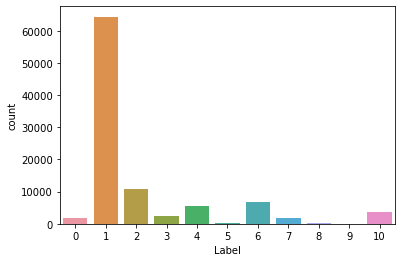

In [57]:
# Visualize the label distribution
ax = sns.countplot(x="Label", data=df, order=['0', '1', '2','3', '4', '5', '6', '7', '8', '9', '10'])

## Feature Engineering
Combine all green traffic light labels into 4 , red into 5, yellow into 6, update truck label to 7

In [72]:
df['Label'].replace('5','4',inplace=True)
df['Label'].replace(['6','7'],'5',inplace=True)
df['Label'].replace(['8','9'],'6',inplace=True)
df['Label'].replace('10','7',inplace=True)

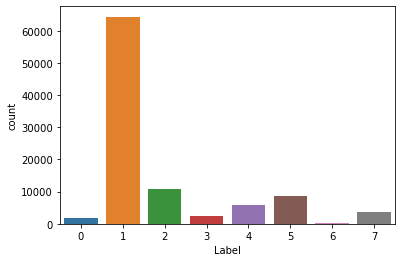

In [74]:
# Re-visualize the label distribution
new = sns.countplot(x="Label", data=df, order=['0', '1', '2','3', '4', '5', '6', '7'])

In [92]:
# Resize images to 512 x 512 resolution in place
def resize(data):
    for filename in data:
        img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
        res = cv2.resize(img, (512, 512), interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(filename, res) 

resize(load_images(image_path))

## Remove duplicated bounding boxes

In [99]:
# Convert labels from YOLO format to xmin, xmax, ymin, ymax
def to_bounding_box(row):
    im = cv2.imread("export/images/" + row['Image_ID'] +".jpg")
    h, w, c = im.shape
    x1, y1, w_size, h_size = float(row['x']), float(row['y']), float(row['width']), float(row['height'])
    abs_x = x1 * w
    abs_y = y1 * h 
    abs_width = w_size * w 
    abs_height = h_size * h
    x_start = round(abs_x - (abs_width/2))
    y_start = round(abs_y - (abs_height/2))
    x_end = round(x_start + abs_width)
    y_end = round(y_start + abs_height)
    return x_start, y_start, x_end, y_end

# Calculate IOU
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

### For traffic light 

In [100]:
img_list  = list(df['Image_ID'].unique())  # get all image IDs
removed_r = []

for img in img_list:
    temp_df = df[df['Image_ID'] == img][(df['Label'] != 0) & (df['Label'] != 1) & (df['Label'] != 2) & (df['Label'] != 7)]
    temp_index = list(temp_df.index)
    iou_list = []
    for index, row in temp_df.iterrows():
        x_start, y_start, x_end, y_end = to_bounding_box(row)
        iou_list.append([x_start, y_start, x_end, y_end])
    for i in range(len(iou_list) - 1):
        for j in range(i + 1, len(iou_list)):
            iou = bb_intersection_over_union(iou_list[i], iou_list[j])
            if iou == 1:
                removed_r.append(temp_index[j])

df.drop(index=removed_r, inplace=True)
print("Removed dataframe indices:", removed_r)

/Users/weichen/opt/anaconda3/envs/yolov5/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Removed dataframe indices: [39917, 61328, 67629, 74275, 92724]


In [103]:
df.describe()

,Image_ID,Label,x,y,width,height
count,97934,97934,97934,97934,97934,97934
unique,13239,8,3229,1267,883,834
top,1478020420204575229_jpg.rf.a66d494d18e0199b910...,1,0.6526041666666667,0.5291666666666667,0.01875,0.05
freq,32,64395,198,955,2288,2469


Note that the label count is reduced from 97,939 to 97,934!

### For car

In [104]:
img_list  = list(df['Image_ID'].unique())  # get all image IDs
removed_r = []

for img in img_list:
    temp_df = df[df['Image_ID'] == img][df['Label'] == 1]
    temp_index = list(temp_df.index)
    iou_list = []
    for index, row in temp_df.iterrows():
        x_start, y_start, x_end, y_end = to_bounding_box(row)
        iou_list.append([x_start, y_start, x_end, y_end])
    for i in range(len(iou_list) - 1):
        for j in range(i + 1, len(iou_list)):
            iou = bb_intersection_over_union(iou_list[i], iou_list[j])
            if iou == 1:
                removed_r.append(temp_index[j])
                
df.drop(index=removed_r, inplace=True)
print("Removed dataframe indices:", removed_r)

/Users/weichen/opt/anaconda3/envs/yolov5/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Removed dataframe indices: []


In [105]:
df.describe()

,Image_ID,Label,x,y,width,height
count,97934,97934,97934,97934,97934,97934
unique,13239,8,3229,1267,883,834
top,1478020420204575229_jpg.rf.a66d494d18e0199b910...,1,0.6526041666666667,0.5291666666666667,0.01875,0.05
freq,32,64395,198,955,2288,2469


Note that the label count is not reduced!

## Save dataframe to CSV

In [106]:
os.mkdir('data')
df.to_csv('data/labels.csv', index=False)

## Split into train/test/val dataset

In [109]:
# setup data directory structure
for folder  in ['train', 'test', 'val']:
    os.mkdir('data/%s' % folder)
    for type_ in ['images', 'labels']:
        os.mkdir('data/%s/%s' % (folder, type_))
        
# split dataset
img_len = len(img_list)
train_len = round(img_len * 0.7)
val_len = round(img_len * 0.2)
test_len = img_len - train_len - val_len

random.shuffle(img_list)
train_img = img_list[:train_len]
val_img = img_list[train_len:train_len + val_len]
test_img = img_list[-test_len:]

In [172]:
# convert dataframe labels to individual txt files
def write_label(filename, folder):
    filepath = 'data/%s/labels/%s.txt' % (folder, filename)
    label_df = df[df['Image_ID'] == filename]
    with open(filepath, 'w') as file:
        for _, row in label_df.iterrows():
            file.write('%s %s %s %s %s\n' % (row[1], row[2], row[3], row[4], row[5]))

for img in train_img:
    os.rename('export/images/%s.jpg' % img, 'data/train/images/%s.jpg' % img)
    write_label(img, 'train')

for img in val_img:
    os.rename('export/images/%s.jpg' % img, 'data/val/images/%s.jpg' % img)
    write_label(img, 'val')   
    
for img in test_img:
    os.rename('export/images/%s.jpg' % img, 'data/test/images/%s.jpg' % img)
    write_label(img, 'test')   
    
print("Train dataset:", len(load_images('data/train/images')), len(load_label('data/train/labels')))
print("Val dataset:", len(load_images('data/val/images')), len(load_label('data/val/labels')))
print("Test dataset:", len(load_images('data/test/images')), len(load_label('data/test/labels')))

Train dataset: 9267 9267
Val dataset: 2648 2648
Test dataset: 1324 1324


In [173]:
!rm -rf export  # remove the remnants of the downloaded dataset in export directory